In [87]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#Read data
mobile_br_commercial = pd.read_csv('/kaggle/input/mobile-br-commercial/commerical-before-update-mobile.csv')
desktop_br_commercial = pd.read_csv('/kaggle/input/desktop-br-commercial/commercial-before-update-desktop.csv')
mobile_ar_commercial = pd.read_csv('/kaggle/input/mobile-ar-commercial-data/commercial-after-update-mobile.csv')
desktop_ar_commercial = pd.read_csv('/kaggle/input/desktop-ar-commercial/commercial-after-update-desktop.csv')



# Cleaning Up Results Dataframes (Before and After Refactoring)

In [88]:
#Display (raw) table
desktop_br_commercial.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Unnamed: 0 Largest Contentful Paint (LCP)  \
0                Start                           1.2s   
1  Contact Information                           3.8s   
2      Truck Selection                           4.4s   
3    Pick Up Locations                           3.3s   
4   Drop Off Locations                           4.0s   

   Interaction to Next Paint (INP)  Cumulative Layout Shift (CLS)  \
0                              NaN                          0.006   
1                              NaN                          0.012   
2                              NaN                          0.013   
3                              NaN                          0.015   
4                              NaN                          0.014   

  First Contentful Paint (FCP)  Time to First Byte (TTFB)  \
0                         0.6s                        NaN   
1                         0.5s                        NaN   
2                         0.5s                        NaN   
3                         0.5s                        NaN   
4                         0.5s                        NaN   

   Performance Score (Lighthouse)  Accessibility Score (Lighthouse)  \
0                              67                                89   
1                              55                                96   
2                              42                                99   
3                              54                                96   
4                              52                                92   

   Best Practices Score (Lighthouse)  SEO Score (Lighthouse) Speed Index (ms)  \
0                                100                      85             1.1s   
1                                 89                      58             2.3s   
2                                 89                      58             3.0s   
3                                 89                      58             2.5s   
4                                 89                      58             2.9s   

  Total Blocking Time (TBT) Page Transfer Size (KB)  Image Optimization (Y/N)  \
0                    4140ms                   228KB                       NaN   
1                     460ms                  29.5KB                       NaN   
2                    1200ms                   434KB                       NaN   
3                     530ms                   552KB                       NaN   
4                     470ms                   182KB                       NaN   

   Lazy Loading Implemented (Y/N)  Number of Requests  \
0                             NaN                 150   
1                             NaN                 105   
2                             NaN                 166   
3                             NaN                 191   
4                             NaN                 168   

   Time to Interactive (TTI)  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4                        NaN   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...  
1  https://pagespeed.web.dev/analysis/https-www-p...  
2  https://pagespeed.web.dev/analysis/https-www-p...  
3  https://pagespeed.web.dev/analysis/https-www-p...  
4  https://pagespeed.web.dev/analysis/https-www-p...

In [89]:
desktop_ar_commercial.head(1)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Unnamed: 0 Largest Contentful Paint (LCP)  Interaction to Next Paint (INP)  \
0      Start                           1.2s                              NaN   

   Cumulative Layout Shift (CLS) First Contentful Paint (FCP)  \
0                          0.005                         0.7s   

   Time to First Byte (TTFB)  Performance Score (Lighthouse)  \
0                        NaN                              66   

   Accessibility Score (Lighthouse)  Best Practices Score (Lighthouse)  \
0                                89                                 96   

   SEO Score (Lighthouse) Speed Index (ms) Total Blocking Time (TBT)  \
0                      85             1.3s                    4110ms   

  Page Transfer Size (KB)  Image Optimization (Y/N)  \
0                   228kb                       NaN   

   Lazy Loading Implemented (Y/N)  Number of Requests  \
0                             NaN                 147   

   Time to Interactive (TTI)  \
0                        NaN   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...

In [90]:
mobile_br_commercial.head(1)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Unnamed: 0 Largest Contentful Paint (LCP)  Interaction to Next Paint (INP)  \
0      Start                           4.9s                              NaN   

   Cumulative Layout Shift (CLS) First Contentful Paint (FCP)  \
0                          0.028                         2.4s   

   Time to First Byte (TTFB)  Performance Score (Lighthouse)  \
0                        NaN                              53   

   Accessibility Score (Lighthouse)  Best Practices Score (Lighthouse)  \
0                                92                                100   

   SEO Score (Lighthouse) Speed Index (ms) Total Blocking Time (TBT)  \
0                      85             5.4s                    1030ms   

  Page Transfer Size (KB)  Image Optimization (Y/N)  \
0                   227KB                       NaN   

   Lazy Loading Implemented (Y/N)  Number of Requests  \
0                             NaN                 149   

   Time to Interactive (TTI)  \
0                        NaN   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...

In [91]:
mobile_ar_commercial.head(1)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Unnamed: 0 Largest Contentful Paint (LCP)  Interaction to Next Paint (INP)  \
0      Start                           4.0s                              NaN   

   Cumulative Layout Shift (CLS) First Contentful Paint (FCP)  \
0                          0.032                         2.4s   

   Time to First Byte (TTFB)  Performance Score (Lighthouse)  \
0                        NaN                              56   

   Accessibility Score (Lighthouse)  Best Practices Score (Lighthouse)  \
0                                92                                 96   

   SEO Score (Lighthouse) Speed Index (ms) Total Blocking Time (TBT)  \
0                      85             5.5s                    1180ms   

  Page Transfer Size (KB)  Image Optimization (Y/N)  \
0                   291kb                       NaN   

   Lazy Loading Implemented (Y/N)  Number of Requests  \
0                             NaN                 155   

   Time to Interactive (TTI)  \
0                        NaN   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...

In [92]:
# Created a copy of the table to prepare for data cleaning and processing (so as not to corrupt the original data).
commercial_dbr_copy = desktop_br_commercial.copy()
commercial_dbr_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         9 non-null      object 
 1   Largest Contentful Paint (LCP)     9 non-null      object 
 2   Interaction to Next Paint (INP)    0 non-null      float64
 3   Cumulative Layout Shift (CLS)      9 non-null      float64
 4   First Contentful Paint (FCP)       9 non-null      object 
 5   Time to First Byte (TTFB)          0 non-null      float64
 6   Performance Score (Lighthouse)     9 non-null      int64  
 7   Accessibility Score (Lighthouse)   9 non-null      int64  
 8   Best Practices Score (Lighthouse)  9 non-null      int64  
 9   SEO Score (Lighthouse)             9 non-null      int64  
 10  Speed Index (ms)                   9 non-null      object 
 11  Total Blocking Time (TBT)          9 non-null      object 
 12

In [93]:
# Created a copy of the table to prepare for data cleaning and processing (so as not to corrupt the original data).
commercial_dar_copy = desktop_ar_commercial.copy()
commercial_dar_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         9 non-null      object 
 1   Largest Contentful Paint (LCP)     9 non-null      object 
 2   Interaction to Next Paint (INP)    0 non-null      float64
 3   Cumulative Layout Shift (CLS)      9 non-null      float64
 4   First Contentful Paint (FCP)       9 non-null      object 
 5   Time to First Byte (TTFB)          0 non-null      float64
 6   Performance Score (Lighthouse)     9 non-null      int64  
 7   Accessibility Score (Lighthouse)   9 non-null      int64  
 8   Best Practices Score (Lighthouse)  9 non-null      int64  
 9   SEO Score (Lighthouse)             9 non-null      int64  
 10  Speed Index (ms)                   9 non-null      object 
 11  Total Blocking Time (TBT)          9 non-null      object 
 12

In [94]:
commercial_mbr_copy = mobile_br_commercial.copy()
commercial_mbr_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         9 non-null      object 
 1   Largest Contentful Paint (LCP)     9 non-null      object 
 2   Interaction to Next Paint (INP)    0 non-null      float64
 3   Cumulative Layout Shift (CLS)      9 non-null      float64
 4   First Contentful Paint (FCP)       9 non-null      object 
 5   Time to First Byte (TTFB)          0 non-null      float64
 6   Performance Score (Lighthouse)     9 non-null      int64  
 7   Accessibility Score (Lighthouse)   9 non-null      int64  
 8   Best Practices Score (Lighthouse)  9 non-null      int64  
 9   SEO Score (Lighthouse)             9 non-null      int64  
 10  Speed Index (ms)                   9 non-null      object 
 11  Total Blocking Time (TBT)          9 non-null      object 
 12

In [95]:
commercial_mar_copy = mobile_ar_commercial.copy()
commercial_mar_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         9 non-null      object 
 1   Largest Contentful Paint (LCP)     9 non-null      object 
 2   Interaction to Next Paint (INP)    0 non-null      float64
 3   Cumulative Layout Shift (CLS)      9 non-null      float64
 4   First Contentful Paint (FCP)       9 non-null      object 
 5   Time to First Byte (TTFB)          0 non-null      float64
 6   Performance Score (Lighthouse)     9 non-null      int64  
 7   Accessibility Score (Lighthouse)   9 non-null      int64  
 8   Best Practices Score (Lighthouse)  9 non-null      int64  
 9   SEO Score (Lighthouse)             9 non-null      int64  
 10  Speed Index (ms)                   9 non-null      object 
 11  Total Blocking Time (TBT)          9 non-null      object 
 12

In [96]:
# For the next 2 table cells, I inspected the number of 
# NaN and Null values in dataset for each column.
dbr_copy_isna = commercial_dbr_copy.isna().sum()
dbr_copy_isna

dbr_copy_isnull = commercial_dbr_copy.isnull().sum()
dbr_copy_isnull

Unnamed: 0                           0
Largest Contentful Paint (LCP)       0
Interaction to Next Paint (INP)      9
Cumulative Layout Shift (CLS)        0
First Contentful Paint (FCP)         0
Time to First Byte (TTFB)            9
Performance Score (Lighthouse)       0
Accessibility Score (Lighthouse)     0
Best Practices Score (Lighthouse)    0
SEO Score (Lighthouse)               0
Speed Index (ms)                     0
Total Blocking Time (TBT)            0
Page Transfer Size (KB)              0
Image Optimization (Y/N)             9
Lazy Loading Implemented (Y/N)       9
Number of Requests                   0
Time to Interactive (TTI)            9
Performance Report Link              0
dtype: int64

In [97]:
# For the next 2 table cells, I inspected the number of 
# NaN and Null values in dataset for each column.
dar_copy_isna = commercial_dar_copy.isna().sum()
dar_copy_isna

dar_copy_isnull = commercial_dar_copy.isnull().sum()
dar_copy_isnull

Unnamed: 0                           0
Largest Contentful Paint (LCP)       0
Interaction to Next Paint (INP)      9
Cumulative Layout Shift (CLS)        0
First Contentful Paint (FCP)         0
Time to First Byte (TTFB)            9
Performance Score (Lighthouse)       0
Accessibility Score (Lighthouse)     0
Best Practices Score (Lighthouse)    0
SEO Score (Lighthouse)               0
Speed Index (ms)                     0
Total Blocking Time (TBT)            0
Page Transfer Size (KB)              0
Image Optimization (Y/N)             9
Lazy Loading Implemented (Y/N)       9
Number of Requests                   0
Time to Interactive (TTI)            9
Performance Report Link              0
dtype: int64

In [98]:
# For the next 2 table cells, I inspected the number of 
# NaN and Null values in dataset for each column.
mbr_copy_isna = commercial_mbr_copy.isna().sum()
mbr_copy_isna

mbr_copy_isnull = commercial_mbr_copy.isnull().sum()
mbr_copy_isnull

Unnamed: 0                           0
Largest Contentful Paint (LCP)       0
Interaction to Next Paint (INP)      9
Cumulative Layout Shift (CLS)        0
First Contentful Paint (FCP)         0
Time to First Byte (TTFB)            9
Performance Score (Lighthouse)       0
Accessibility Score (Lighthouse)     0
Best Practices Score (Lighthouse)    0
SEO Score (Lighthouse)               0
Speed Index (ms)                     0
Total Blocking Time (TBT)            0
Page Transfer Size (KB)              0
Image Optimization (Y/N)             9
Lazy Loading Implemented (Y/N)       9
Number of Requests                   0
Time to Interactive (TTI)            9
Performance Report Link              0
dtype: int64

In [99]:
# For the next 2 table cells, I inspected the number of 
# NaN and Null values in dataset for each column.
mar_copy_isna = commercial_mar_copy.isna().sum()
mar_copy_isna

mar_copy_isnull = commercial_mar_copy.isnull().sum()
mar_copy_isnull

Unnamed: 0                           0
Largest Contentful Paint (LCP)       0
Interaction to Next Paint (INP)      9
Cumulative Layout Shift (CLS)        0
First Contentful Paint (FCP)         0
Time to First Byte (TTFB)            9
Performance Score (Lighthouse)       0
Accessibility Score (Lighthouse)     0
Best Practices Score (Lighthouse)    0
SEO Score (Lighthouse)               0
Speed Index (ms)                     0
Total Blocking Time (TBT)            0
Page Transfer Size (KB)              0
Image Optimization (Y/N)             9
Lazy Loading Implemented (Y/N)       9
Number of Requests                   0
Time to Interactive (TTI)            9
Performance Report Link              0
dtype: int64

In [100]:
# Dropped the columns with the NaN or Null values, then reinspected the table
# to make sure that those values don't exist anymore.

dbr_new = commercial_dbr_copy.dropna(axis='columns')
dbr_new.head(1)

Unnamed: 0 Largest Contentful Paint (LCP)  Cumulative Layout Shift (CLS)  \
0      Start                           1.2s                          0.006   

  First Contentful Paint (FCP)  Performance Score (Lighthouse)  \
0                         0.6s                              67   

   Accessibility Score (Lighthouse)  Best Practices Score (Lighthouse)  \
0                                89                                100   

   SEO Score (Lighthouse) Speed Index (ms) Total Blocking Time (TBT)  \
0                      85             1.1s                    4140ms   

  Page Transfer Size (KB)  Number of Requests  \
0                   228KB                 150   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...

In [101]:
# Dropped the columns with the NaN or Null values, then reinspected the table
# to make sure that those values don't exist anymore.

dar_new = commercial_dar_copy.dropna(axis='columns')
dar_new.head(1)

Unnamed: 0 Largest Contentful Paint (LCP)  Cumulative Layout Shift (CLS)  \
0      Start                           1.2s                          0.005   

  First Contentful Paint (FCP)  Performance Score (Lighthouse)  \
0                         0.7s                              66   

   Accessibility Score (Lighthouse)  Best Practices Score (Lighthouse)  \
0                                89                                 96   

   SEO Score (Lighthouse) Speed Index (ms) Total Blocking Time (TBT)  \
0                      85             1.3s                    4110ms   

  Page Transfer Size (KB)  Number of Requests  \
0                   228kb                 147   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...

In [102]:
# Dropped the columns with the NaN or Null values, then reinspected the table
# to make sure that those values don't exist anymore.

mbr_new = commercial_mbr_copy.dropna(axis='columns')
mbr_new.head(1)

Unnamed: 0 Largest Contentful Paint (LCP)  Cumulative Layout Shift (CLS)  \
0      Start                           4.9s                          0.028   

  First Contentful Paint (FCP)  Performance Score (Lighthouse)  \
0                         2.4s                              53   

   Accessibility Score (Lighthouse)  Best Practices Score (Lighthouse)  \
0                                92                                100   

   SEO Score (Lighthouse) Speed Index (ms) Total Blocking Time (TBT)  \
0                      85             5.4s                    1030ms   

  Page Transfer Size (KB)  Number of Requests  \
0                   227KB                 149   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...

In [103]:
# Dropped the columns with the NaN or Null values, then reinspected the table
# to make sure that those values don't exist anymore.

mar_new = commercial_mar_copy.dropna(axis='columns')
mar_new.head(1)

Unnamed: 0 Largest Contentful Paint (LCP)  Cumulative Layout Shift (CLS)  \
0      Start                           4.0s                          0.032   

  First Contentful Paint (FCP)  Performance Score (Lighthouse)  \
0                         2.4s                              56   

   Accessibility Score (Lighthouse)  Best Practices Score (Lighthouse)  \
0                                92                                 96   

   SEO Score (Lighthouse) Speed Index (ms) Total Blocking Time (TBT)  \
0                      85             5.5s                    1180ms   

  Page Transfer Size (KB)  Number of Requests  \
0                   291kb                 155   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...

In [104]:
#Renamed the columns Desktop - Before Report
dbr_renamed = dbr_new.copy()
dbr_renamed.rename(columns={'Unnamed: 0':'Webpage',
                            'Largest Contentful Paint (LCP)':'LCP',
                            'Cumulative Layout Shift (CLS)':'CLS',
                            'First Contentful Paint (FCP)':'FCP',
                            'Performance Score (Lighthouse)':'Performance',
                            'Accessibility Score (Lighthouse)':'Accessibility',
                            'Best Practices Score (Lighthouse)':'Best Practices',
                            'SEO Score (Lighthouse)':'SEO',
                            'Speed Index (ms)':'Speed Index',
                            'Total Blocking Time (TBT)': 'TBT',
                            'Page Transfer Size (KB)':'Transfer Size',
                            'Number of Requests':'# of Requests'
                           }, inplace=True )
dbr_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Webpage                  9 non-null      object 
 1   LCP                      9 non-null      object 
 2   CLS                      9 non-null      float64
 3   FCP                      9 non-null      object 
 4   Performance              9 non-null      int64  
 5   Accessibility            9 non-null      int64  
 6   Best Practices           9 non-null      int64  
 7   SEO                      9 non-null      int64  
 8   Speed Index              9 non-null      object 
 9   TBT                      9 non-null      object 
 10  Transfer Size            9 non-null      object 
 11  # of Requests            9 non-null      int64  
 12  Performance Report Link  9 non-null      object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.0+ KB


In [105]:
#Renamed the columns Desktop - Before Report
dar_renamed = dar_new.copy()
dar_renamed.rename(columns={'Unnamed: 0':'Webpage',
                            'Largest Contentful Paint (LCP)':'LCP',
                            'Cumulative Layout Shift (CLS)':'CLS',
                            'First Contentful Paint (FCP)':'FCP',
                            'Performance Score (Lighthouse)':'Performance',
                            'Accessibility Score (Lighthouse)':'Accessibility',
                            'Best Practices Score (Lighthouse)':'Best Practices',
                            'SEO Score (Lighthouse)':'SEO',
                            'Speed Index (ms)':'Speed Index',
                            'Total Blocking Time (TBT)': 'TBT',
                            'Page Transfer Size (KB)':'Transfer Size',
                            'Number of Requests':'# of Requests'
                           }, inplace=True )
dar_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Webpage                  9 non-null      object 
 1   LCP                      9 non-null      object 
 2   CLS                      9 non-null      float64
 3   FCP                      9 non-null      object 
 4   Performance              9 non-null      int64  
 5   Accessibility            9 non-null      int64  
 6   Best Practices           9 non-null      int64  
 7   SEO                      9 non-null      int64  
 8   Speed Index              9 non-null      object 
 9   TBT                      9 non-null      object 
 10  Transfer Size            9 non-null      object 
 11  # of Requests            9 non-null      int64  
 12  Performance Report Link  9 non-null      object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.0+ KB


In [106]:
#Renamed the columns Desktop - Before Report
mbr_renamed = mbr_new.copy()
mbr_renamed.rename(columns={'Unnamed: 0':'Webpage',
                            'Largest Contentful Paint (LCP)':'LCP',
                            'Cumulative Layout Shift (CLS)':'CLS',
                            'First Contentful Paint (FCP)':'FCP',
                            'Performance Score (Lighthouse)':'Performance',
                            'Accessibility Score (Lighthouse)':'Accessibility',
                            'Best Practices Score (Lighthouse)':'Best Practices',
                            'SEO Score (Lighthouse)':'SEO',
                            'Speed Index (ms)':'Speed Index',
                            'Total Blocking Time (TBT)': 'TBT',
                            'Page Transfer Size (KB)':'Transfer Size',
                            'Number of Requests':'# of Requests'
                           }, inplace=True )
mbr_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Webpage                  9 non-null      object 
 1   LCP                      9 non-null      object 
 2   CLS                      9 non-null      float64
 3   FCP                      9 non-null      object 
 4   Performance              9 non-null      int64  
 5   Accessibility            9 non-null      int64  
 6   Best Practices           9 non-null      int64  
 7   SEO                      9 non-null      int64  
 8   Speed Index              9 non-null      object 
 9   TBT                      9 non-null      object 
 10  Transfer Size            9 non-null      object 
 11  # of Requests            9 non-null      int64  
 12  Performance Report Link  9 non-null      object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.0+ KB


In [107]:
#Renamed the columns Desktop - Before Report
mar_renamed = mar_new.copy()
mar_renamed.rename(columns={'Unnamed: 0':'Webpage',
                            'Largest Contentful Paint (LCP)':'LCP',
                            'Cumulative Layout Shift (CLS)':'CLS',
                            'First Contentful Paint (FCP)':'FCP',
                            'Performance Score (Lighthouse)':'Performance',
                            'Accessibility Score (Lighthouse)':'Accessibility',
                            'Best Practices Score (Lighthouse)':'Best Practices',
                            'SEO Score (Lighthouse)':'SEO',
                            'Speed Index (ms)':'Speed Index',
                            'Total Blocking Time (TBT)': 'TBT',
                            'Page Transfer Size (KB)':'Transfer Size',
                            'Number of Requests':'# of Requests'
                           }, inplace=True )
mar_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Webpage                  9 non-null      object 
 1   LCP                      9 non-null      object 
 2   CLS                      9 non-null      float64
 3   FCP                      9 non-null      object 
 4   Performance              9 non-null      int64  
 5   Accessibility            9 non-null      int64  
 6   Best Practices           9 non-null      int64  
 7   SEO                      9 non-null      int64  
 8   Speed Index              9 non-null      object 
 9   TBT                      9 non-null      object 
 10  Transfer Size            9 non-null      object 
 11  # of Requests            9 non-null      int64  
 12  Performance Report Link  9 non-null      object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.0+ KB


In [108]:
#Desktop - Before Refactor
#For all columns with the datatype "Object", I removed non-numerical str except for "."

import re

def remove_non_numeric_chars(col):
    dbr_renamed.loc[:, col] = dbr_renamed.loc[:, col].astype(str).apply(lambda x: re.sub(r"[^0-9.]", "", str(x)))
    
dbr_columns = ['LCP','FCP','Speed Index','TBT','Transfer Size']
for col in dbr_columns:
    remove_non_numeric_chars(col)

dbr_renamed.head()


Webpage  LCP    CLS  FCP  Performance  Accessibility  \
0                Start  1.2  0.006  0.6           67             89   
1  Contact Information  3.8  0.012  0.5           55             96   
2      Truck Selection  4.4  0.013  0.5           42             99   
3    Pick Up Locations  3.3  0.015  0.5           54             96   
4   Drop Off Locations  4.0  0.014  0.5           52             92   

   Best Practices  SEO Speed Index   TBT Transfer Size  # of Requests  \
0             100   85         1.1  4140           228            150   
1              89   58         2.3   460          29.5            105   
2              89   58         3.0  1200           434            166   
3              89   58         2.5   530           552            191   
4              89   58         2.9   470           182            168   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...  
1  https://pagespeed.web.dev/analysis/https-www-p...  
2  https://pagespeed.web.dev/analysis/https-www-p...  
3  https://pagespeed.web.dev/analysis/https-www-p...  
4  https://pagespeed.web.dev/analysis/https-www-p...

In [109]:
#Desktop - Before Refactor
#For all columns with the datatype "Object", I removed non-numerical str except for "."

import re

def remove_non_numeric_chars(col):
    dar_renamed.loc[:, col] = dar_renamed.loc[:, col].astype(str).apply(lambda x: re.sub(r"[^0-9.]", "", str(x)))
    
dar_columns = ['LCP','FCP','Speed Index','TBT','Transfer Size']
for col in dar_columns:
    remove_non_numeric_chars(col)

dar_renamed.head()

Webpage  LCP    CLS  FCP  Performance  Accessibility  \
0                Start  1.2  0.005  0.7           66             89   
1  Contact Information  4.1  0.024  0.5           42             96   
2      Truck Selection  4.2  0.011  0.5           48             96   
3    Pick Up Locations  3.7  0.009  0.5           47             96   
4   Drop Off Locations  3.1  0.016  0.5           52             96   

   Best Practices  SEO Speed Index   TBT Transfer Size  # of Requests  \
0              96   85         1.3  4110           228            147   
1              89   58         3.2  1120          33.3            106   
2              89   58         2.6   660          36.5            121   
3              89   58         3.2   670          53.4            188   
4              89   58         2.7   630          42.7            176   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...  
1  https://pagespeed.web.dev/analysis/https-www-p...  
2  https://pagespeed.web.dev/analysis/https-www-p...  
3  https://pagespeed.web.dev/analysis/https-www-p...  
4  https://pagespeed.web.dev/analysis/https-www-p...

In [110]:
#Mobile - Before Refactor
#For all columns with the datatype "Object", I removed non-numerical str except for "."

import re

def remove_non_numeric_chars(col):
    mbr_renamed.loc[:, col] = mbr_renamed.loc[:, col].astype(str).apply(lambda x: re.sub(r"[^0-9.]", "", str(x)))
    
mbr_columns = ['LCP','FCP','Speed Index','TBT','Transfer Size']
for col in mbr_columns:
    remove_non_numeric_chars(col)

mbr_renamed.head()


Webpage   LCP    CLS   FCP  Performance  Accessibility  \
0                Start   4.9  0.028   2.4           53             92   
1  Contact Information  11.9  0.038   4.7           47             96   
2      Truck Selection  18.4  0.042  11.5           46             99   
3    Pick Up Locations  17.9  0.481   4.9           14             96   
4   Drop Off Locations  17.1  0.524   4.9           24             96   

   Best Practices  SEO Speed Index   TBT Transfer Size  # of Requests  \
0             100   85         5.4  1030           227            149   
1              89   58         7.3   500          34.6            108   
2              89   58        11.5   380          46.2            178   
3              89   58        10.2  1010          69.8            191   
4              89   58        10.0   460          39.8            175   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...  
1  https://pagespeed.web.dev/analysis/https-www-p...  
2  https://pagespeed.web.dev/analysis/https-www-p...  
3  https://pagespeed.web.dev/analysis/https-www-p...  
4  https://pagespeed.web.dev/analysis/https-www-p...

In [111]:
#Mobile - Before Refactor
#For all columns with the datatype "Object", I removed non-numerical str except for "."

import re

def remove_non_numeric_chars(col):
    mar_renamed.loc[:, col] = mar_renamed.loc[:, col].astype(str).apply(lambda x: re.sub(r"[^0-9.]", "", str(x)))
    
mar_columns = ['LCP','FCP','Speed Index','TBT','Transfer Size']
for col in mar_columns:
    remove_non_numeric_chars(col)

mar_renamed.head()


Webpage   LCP    CLS  FCP  Performance  Accessibility  \
0                Start   4.0  0.032  2.4           56             92   
1  Contact Information  17.6  0.050  8.8           44             96   
2      Truck Selection  18.1  0.045  6.6           48             99   
3    Pick Up Locations  15.7  0.481  4.8           15             96   
4   Drop Off Locations  13.3  0.517  5.1           28             96   

   Best Practices  SEO Speed Index   TBT Transfer Size  # of Requests  \
0              96   85         5.5  1180           291            155   
1              89   58         8.9   480          30.5            107   
2              89   58         9.2   370          34.1            123   
3              89   58         9.4   990          51.7            187   
4              89   58         9.0   350          39.7            181   

                             Performance Report Link  
0  https://pagespeed.web.dev/analysis/https-www-p...  
1  https://pagespeed.web.dev/analysis/https-www-p...  
2  https://pagespeed.web.dev/analysis/https-www-p...  
3  https://pagespeed.web.dev/analysis/https-www-p...  
4  https://pagespeed.web.dev/analysis/https-www-p...

In [112]:
dbr_new_copy = dbr_renamed.copy()

def convert_to_nums(col):
    dbr_new_copy[col] = dbr_new_copy[col].astype(float)

dbr_columns = ['LCP','FCP','Speed Index','TBT','Transfer Size']
for col in dbr_columns:
    convert_to_nums(col)

dbr_new_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Webpage                  9 non-null      object 
 1   LCP                      9 non-null      float64
 2   CLS                      9 non-null      float64
 3   FCP                      9 non-null      float64
 4   Performance              9 non-null      int64  
 5   Accessibility            9 non-null      int64  
 6   Best Practices           9 non-null      int64  
 7   SEO                      9 non-null      int64  
 8   Speed Index              9 non-null      float64
 9   TBT                      9 non-null      float64
 10  Transfer Size            9 non-null      float64
 11  # of Requests            9 non-null      int64  
 12  Performance Report Link  9 non-null      object 
dtypes: float64(6), int64(5), object(2)
memory usage: 1.0+ KB


In [113]:
dar_new_copy = dar_renamed.copy()

def convert_to_nums(col):
    dar_new_copy[col] = dar_new_copy[col].astype(float)

dar_columns = ['LCP','FCP','Speed Index','TBT','Transfer Size']
for col in dar_columns:
    convert_to_nums(col)

dar_new_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Webpage                  9 non-null      object 
 1   LCP                      9 non-null      float64
 2   CLS                      9 non-null      float64
 3   FCP                      9 non-null      float64
 4   Performance              9 non-null      int64  
 5   Accessibility            9 non-null      int64  
 6   Best Practices           9 non-null      int64  
 7   SEO                      9 non-null      int64  
 8   Speed Index              9 non-null      float64
 9   TBT                      9 non-null      float64
 10  Transfer Size            9 non-null      float64
 11  # of Requests            9 non-null      int64  
 12  Performance Report Link  9 non-null      object 
dtypes: float64(6), int64(5), object(2)
memory usage: 1.0+ KB


In [114]:
mbr_new_copy = mbr_renamed.copy()

def convert_to_nums(col):
    mbr_new_copy[col] = mbr_new_copy[col].astype(float)

mbr_columns = ['LCP','FCP','Speed Index','TBT','Transfer Size']
for col in mbr_columns:
    convert_to_nums(col)

mbr_new_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Webpage                  9 non-null      object 
 1   LCP                      9 non-null      float64
 2   CLS                      9 non-null      float64
 3   FCP                      9 non-null      float64
 4   Performance              9 non-null      int64  
 5   Accessibility            9 non-null      int64  
 6   Best Practices           9 non-null      int64  
 7   SEO                      9 non-null      int64  
 8   Speed Index              9 non-null      float64
 9   TBT                      9 non-null      float64
 10  Transfer Size            9 non-null      float64
 11  # of Requests            9 non-null      int64  
 12  Performance Report Link  9 non-null      object 
dtypes: float64(6), int64(5), object(2)
memory usage: 1.0+ KB


In [115]:
mar_new_copy = mar_renamed.copy()

def convert_to_nums(col):
    mar_new_copy[col] = mar_new_copy[col].astype(float)

mar_columns = ['LCP','FCP','Speed Index','TBT','Transfer Size']
for col in mar_columns:
    convert_to_nums(col)

mar_new_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Webpage                  9 non-null      object 
 1   LCP                      9 non-null      float64
 2   CLS                      9 non-null      float64
 3   FCP                      9 non-null      float64
 4   Performance              9 non-null      int64  
 5   Accessibility            9 non-null      int64  
 6   Best Practices           9 non-null      int64  
 7   SEO                      9 non-null      int64  
 8   Speed Index              9 non-null      float64
 9   TBT                      9 non-null      float64
 10  Transfer Size            9 non-null      float64
 11  # of Requests            9 non-null      int64  
 12  Performance Report Link  9 non-null      object 
dtypes: float64(6), int64(5), object(2)
memory usage: 1.0+ KB


In [116]:
#Add a column to mark the Before and After data for each row in Desktop - Before Refactoring
for index, row in dbr_new_copy.iterrows():
    dbr_new_copy.loc[index,'Refactor Type'] = 'Before'

dbr_new_copy.head()

Webpage  LCP    CLS  FCP  Performance  Accessibility  \
0                Start  1.2  0.006  0.6           67             89   
1  Contact Information  3.8  0.012  0.5           55             96   
2      Truck Selection  4.4  0.013  0.5           42             99   
3    Pick Up Locations  3.3  0.015  0.5           54             96   
4   Drop Off Locations  4.0  0.014  0.5           52             92   

   Best Practices  SEO  Speed Index     TBT  Transfer Size  # of Requests  \
0             100   85          1.1  4140.0          228.0            150   
1              89   58          2.3   460.0           29.5            105   
2              89   58          3.0  1200.0          434.0            166   
3              89   58          2.5   530.0          552.0            191   
4              89   58          2.9   470.0          182.0            168   

                             Performance Report Link Refactor Type  
0  https://pagespeed.web.dev/analysis/https-www-p...        Before  
1  https://pagespeed.web.dev/analysis/https-www-p...        Before  
2  https://pagespeed.web.dev/analysis/https-www-p...        Before  
3  https://pagespeed.web.dev/analysis/https-www-p...        Before  
4  https://pagespeed.web.dev/analysis/https-www-p...        Before

In [117]:
#Add a column to mark the Before and After data for each row in Desktop - Before Refactoring
for index, row in dar_new_copy.iterrows():
    dar_new_copy.loc[index,'Refactor Type'] = 'After'

dar_new_copy.head()

Webpage  LCP    CLS  FCP  Performance  Accessibility  \
0                Start  1.2  0.005  0.7           66             89   
1  Contact Information  4.1  0.024  0.5           42             96   
2      Truck Selection  4.2  0.011  0.5           48             96   
3    Pick Up Locations  3.7  0.009  0.5           47             96   
4   Drop Off Locations  3.1  0.016  0.5           52             96   

   Best Practices  SEO  Speed Index     TBT  Transfer Size  # of Requests  \
0              96   85          1.3  4110.0          228.0            147   
1              89   58          3.2  1120.0           33.3            106   
2              89   58          2.6   660.0           36.5            121   
3              89   58          3.2   670.0           53.4            188   
4              89   58          2.7   630.0           42.7            176   

                             Performance Report Link Refactor Type  
0  https://pagespeed.web.dev/analysis/https-www-p...         After  
1  https://pagespeed.web.dev/analysis/https-www-p...         After  
2  https://pagespeed.web.dev/analysis/https-www-p...         After  
3  https://pagespeed.web.dev/analysis/https-www-p...         After  
4  https://pagespeed.web.dev/analysis/https-www-p...         After

In [118]:
#Add a column to mark the Before and After data for each row in Desktop - Before Refactoring
for index, row in mbr_new_copy.iterrows():
    mbr_new_copy.loc[index,'Refactor Type'] = 'Before'

mbr_new_copy.head()

Webpage   LCP    CLS   FCP  Performance  Accessibility  \
0                Start   4.9  0.028   2.4           53             92   
1  Contact Information  11.9  0.038   4.7           47             96   
2      Truck Selection  18.4  0.042  11.5           46             99   
3    Pick Up Locations  17.9  0.481   4.9           14             96   
4   Drop Off Locations  17.1  0.524   4.9           24             96   

   Best Practices  SEO  Speed Index     TBT  Transfer Size  # of Requests  \
0             100   85          5.4  1030.0          227.0            149   
1              89   58          7.3   500.0           34.6            108   
2              89   58         11.5   380.0           46.2            178   
3              89   58         10.2  1010.0           69.8            191   
4              89   58         10.0   460.0           39.8            175   

                             Performance Report Link Refactor Type  
0  https://pagespeed.web.dev/analysis/https-www-p...        Before  
1  https://pagespeed.web.dev/analysis/https-www-p...        Before  
2  https://pagespeed.web.dev/analysis/https-www-p...        Before  
3  https://pagespeed.web.dev/analysis/https-www-p...        Before  
4  https://pagespeed.web.dev/analysis/https-www-p...        Before

In [119]:
#Add a column to mark the Before and After data for each row in Desktop - Before Refactoring
for index, row in mar_new_copy.iterrows():
    mar_new_copy.loc[index,'Refactor Type'] = 'After'

mar_new_copy.head()

Webpage   LCP    CLS  FCP  Performance  Accessibility  \
0                Start   4.0  0.032  2.4           56             92   
1  Contact Information  17.6  0.050  8.8           44             96   
2      Truck Selection  18.1  0.045  6.6           48             99   
3    Pick Up Locations  15.7  0.481  4.8           15             96   
4   Drop Off Locations  13.3  0.517  5.1           28             96   

   Best Practices  SEO  Speed Index     TBT  Transfer Size  # of Requests  \
0              96   85          5.5  1180.0          291.0            155   
1              89   58          8.9   480.0           30.5            107   
2              89   58          9.2   370.0           34.1            123   
3              89   58          9.4   990.0           51.7            187   
4              89   58          9.0   350.0           39.7            181   

                             Performance Report Link Refactor Type  
0  https://pagespeed.web.dev/analysis/https-www-p...         After  
1  https://pagespeed.web.dev/analysis/https-www-p...         After  
2  https://pagespeed.web.dev/analysis/https-www-p...         After  
3  https://pagespeed.web.dev/analysis/https-www-p...         After  
4  https://pagespeed.web.dev/analysis/https-www-p...         After

# Merge the tables (Desktop and Mobile)

In [120]:
#Merge the tables together (Desktop - Before and After Refactor)

merged_results = dbr_new_copy.merge(dar_new_copy, how='outer', on=['Webpage',
                                                                   'LCP',
                                                                   'CLS',
                                                                   'FCP',
                                                                   'Performance',
                                                                   'Accessibility',
                                                                   'Best Practices',
                                                                   'SEO',
                                                                   'Speed Index',
                                                                   'TBT',
                                                                   'Transfer Size',
                                                                   '# of Requests',
                                                                   'Refactor Type'
                                                                  ])
merged_results.head(1)

Webpage  LCP   CLS  FCP  Performance  Accessibility  Best Practices  SEO  \
0  Billing  4.2  0.01  0.5           47             96              89   58   

   Speed Index    TBT  Transfer Size  # of Requests Performance Report Link_x  \
0          3.3  590.0           51.2            123                       NaN   

  Refactor Type                          Performance Report Link_y  
0         After  https://pagespeed.web.dev/analysis/https-www-p...

In [121]:
#Desktop - Renamed some rows (so it makes more sense)
curr_wp_names = ['Confirm Rental Dates', 'Contact Information', 'Drop Off Locations', 'Order Confirmation', 'Pick Up Locations', 'Truck Selection']
new_wp_names = ['Rental Dates', 'Contact','Drop Off','Order', 'Pick-up', 'Truck Select']

for x, y in zip(curr_wp_names, new_wp_names):
    merged_results['Webpage'] = merged_results['Webpage'].str.replace(x, y)

merged_results.head(1)

Webpage  LCP   CLS  FCP  Performance  Accessibility  Best Practices  SEO  \
0  Billing  4.2  0.01  0.5           47             96              89   58   

   Speed Index    TBT  Transfer Size  # of Requests Performance Report Link_x  \
0          3.3  590.0           51.2            123                       NaN   

  Refactor Type                          Performance Report Link_y  
0         After  https://pagespeed.web.dev/analysis/https-www-p...

In [122]:
#Merge the tables together (Mobile - Before and After Refactor) and removed performance report links
merged_results_mobile = mbr_new_copy.merge(mar_new_copy, how='outer', on=['Webpage',
                                                                   'LCP',
                                                                   'CLS',
                                                                   'FCP',
                                                                   'Performance',
                                                                   'Accessibility',
                                                                   'Best Practices',
                                                                   'SEO',
                                                                   'Speed Index',
                                                                   'TBT',
                                                                   'Transfer Size',
                                                                   '# of Requests',
                                                                   'Refactor Type'
                                                                  ])


merged_results_mobile.head(1)

Webpage   LCP    CLS  FCP  Performance  Accessibility  Best Practices  SEO  \
0  Billing  11.5  0.032  3.8           39             96              89   58   

   Speed Index    TBT  Transfer Size  # of Requests Performance Report Link_x  \
0          9.2  850.0           47.2            124                       NaN   

  Refactor Type                          Performance Report Link_y  
0         After  https://pagespeed.web.dev/analysis/https-www-p...

In [123]:
#Desktop - Renamed some rows (so it makes more sense)
curr_wp_names = ['Confirm Rental Dates', 'Contact Information', 'Drop Off Locations', 'Order Confirmation', 'Pick Up Locations', 'Truck Selection']
new_wp_names = ['Rental Dates', 'Contact','Drop Off','Order', 'Pick-up', 'Truck Select']

for x, y in zip(curr_wp_names, new_wp_names):
    merged_results_mobile['Webpage'] = merged_results_mobile['Webpage'].str.replace(x, y)

merged_results_mobile.head(1)

Webpage   LCP    CLS  FCP  Performance  Accessibility  Best Practices  SEO  \
0  Billing  11.5  0.032  3.8           39             96              89   58   

   Speed Index    TBT  Transfer Size  # of Requests Performance Report Link_x  \
0          9.2  850.0           47.2            124                       NaN   

  Refactor Type                          Performance Report Link_y  
0         After  https://pagespeed.web.dev/analysis/https-www-p...

# **Largest Contentful Paint (LCP)**
0-2.5 - Fast.
2.5-4 - Moderate.
Over 4 - Slow.

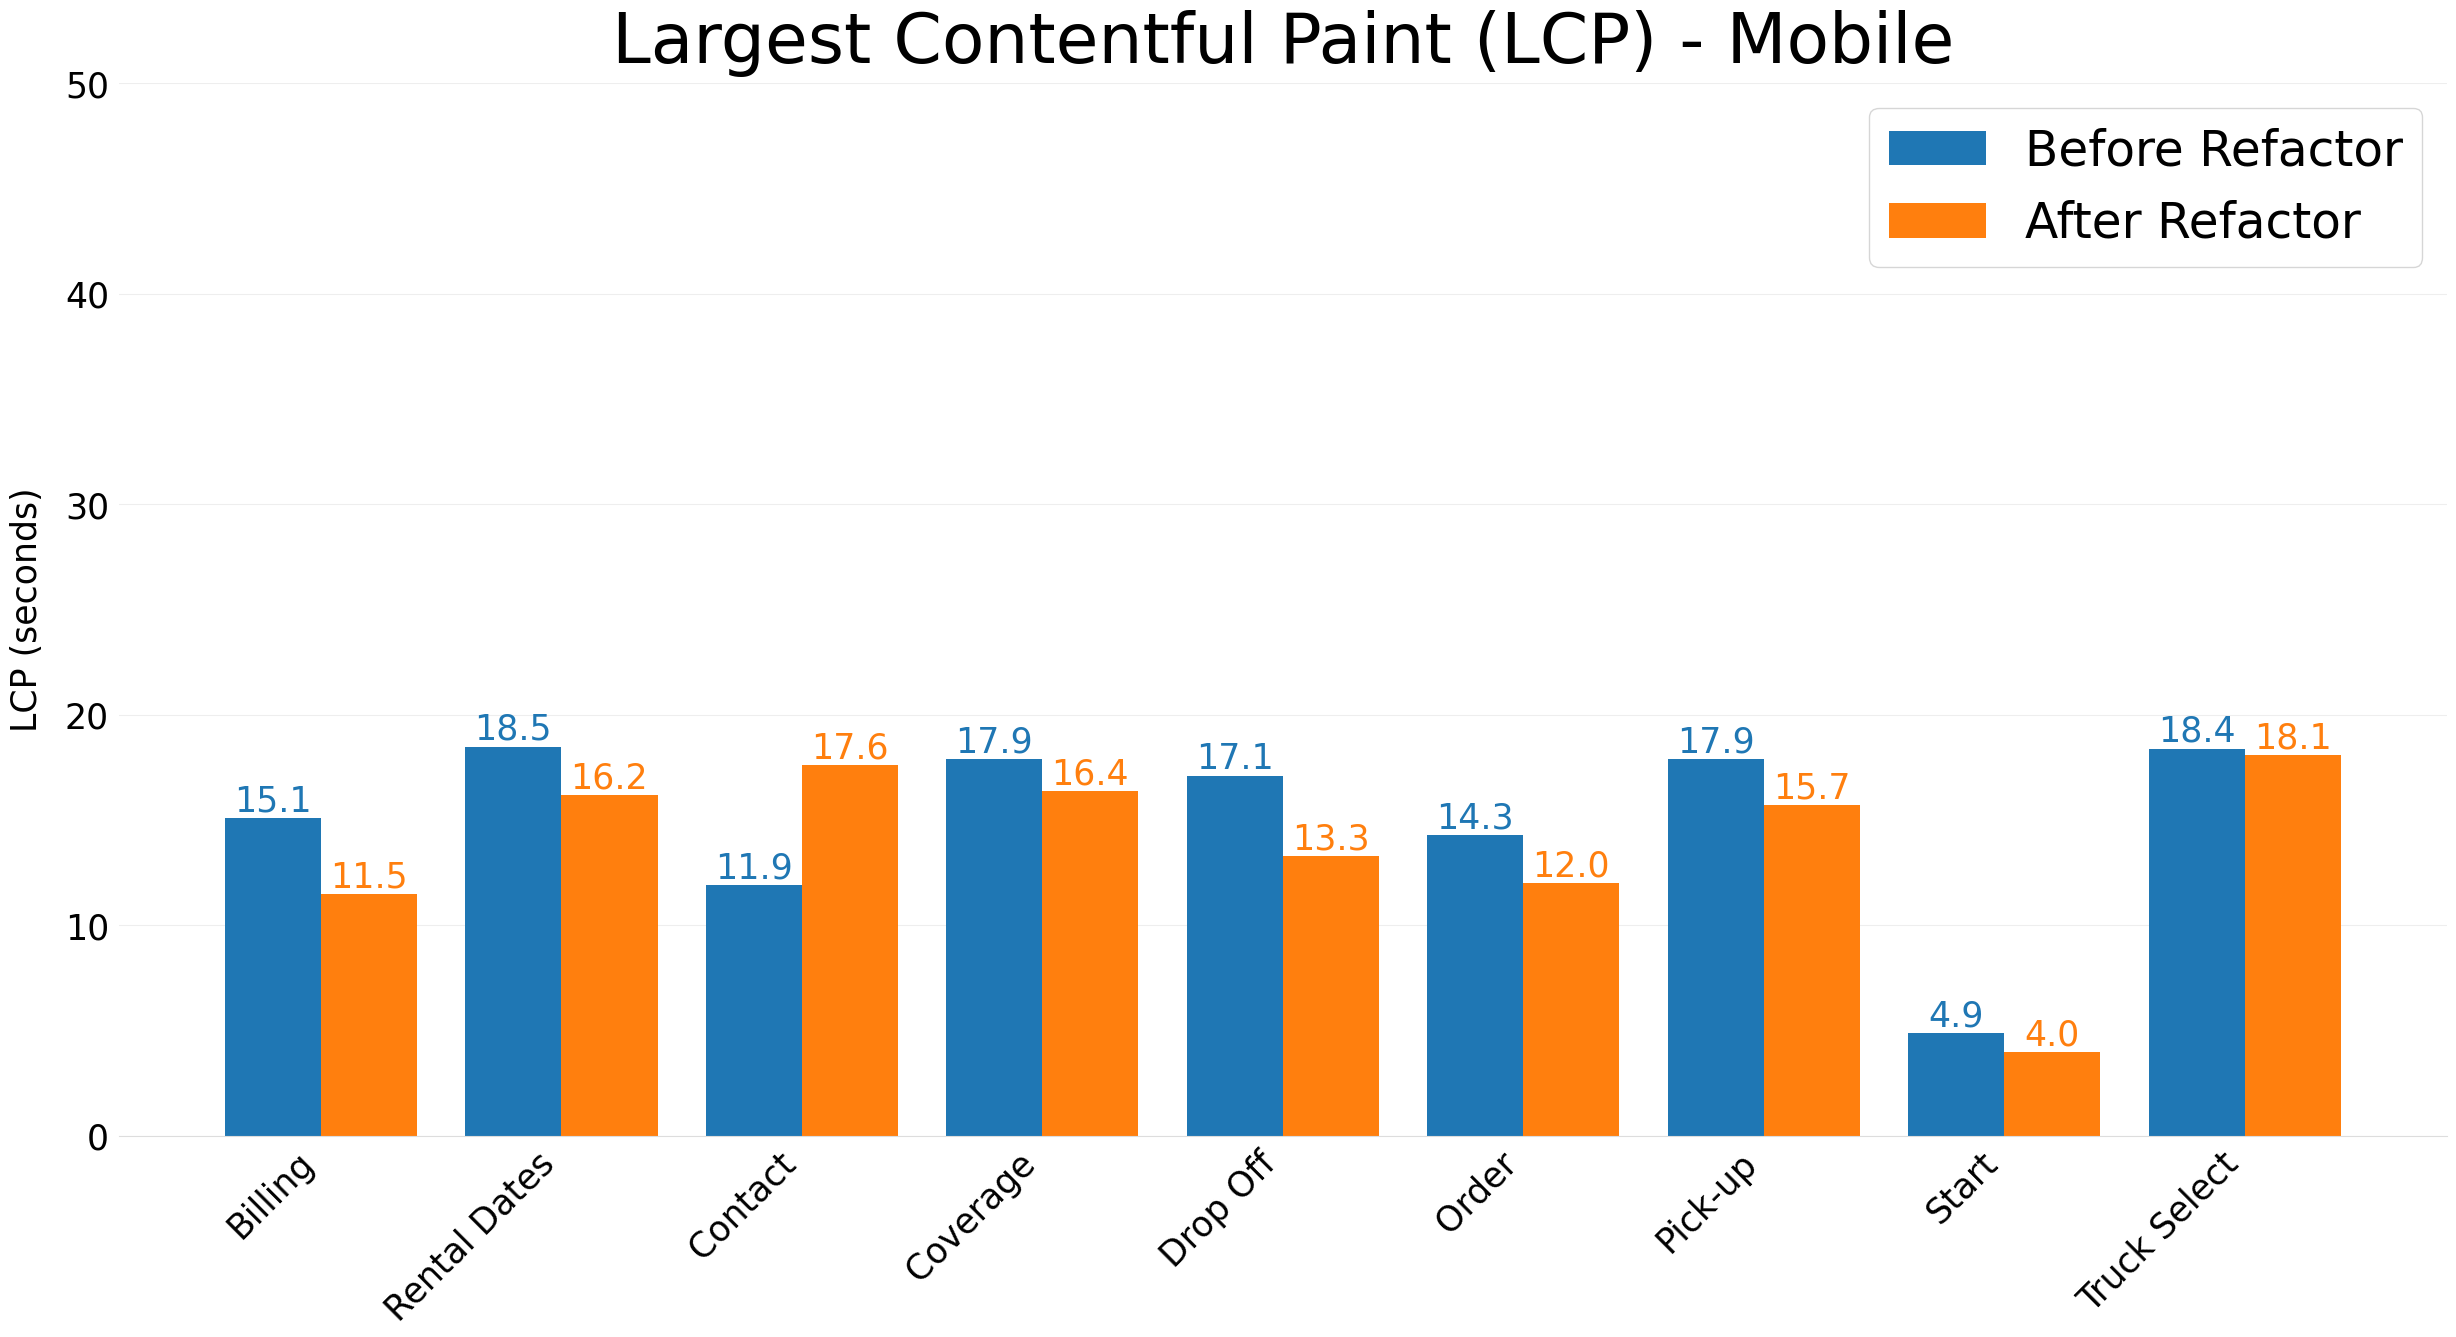

In [124]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results_mobile.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'Before', 'LCP'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'After', 'LCP'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results_mobile.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xlabel("", labelpad=15)
ax.set_ylabel("LCP (seconds)", labelpad=15, fontsize=25)
ax.set_title("Largest Contentful Paint (LCP) - Mobile", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 50) 
plt.savefig('lcp_mobile.png')
plt.show()

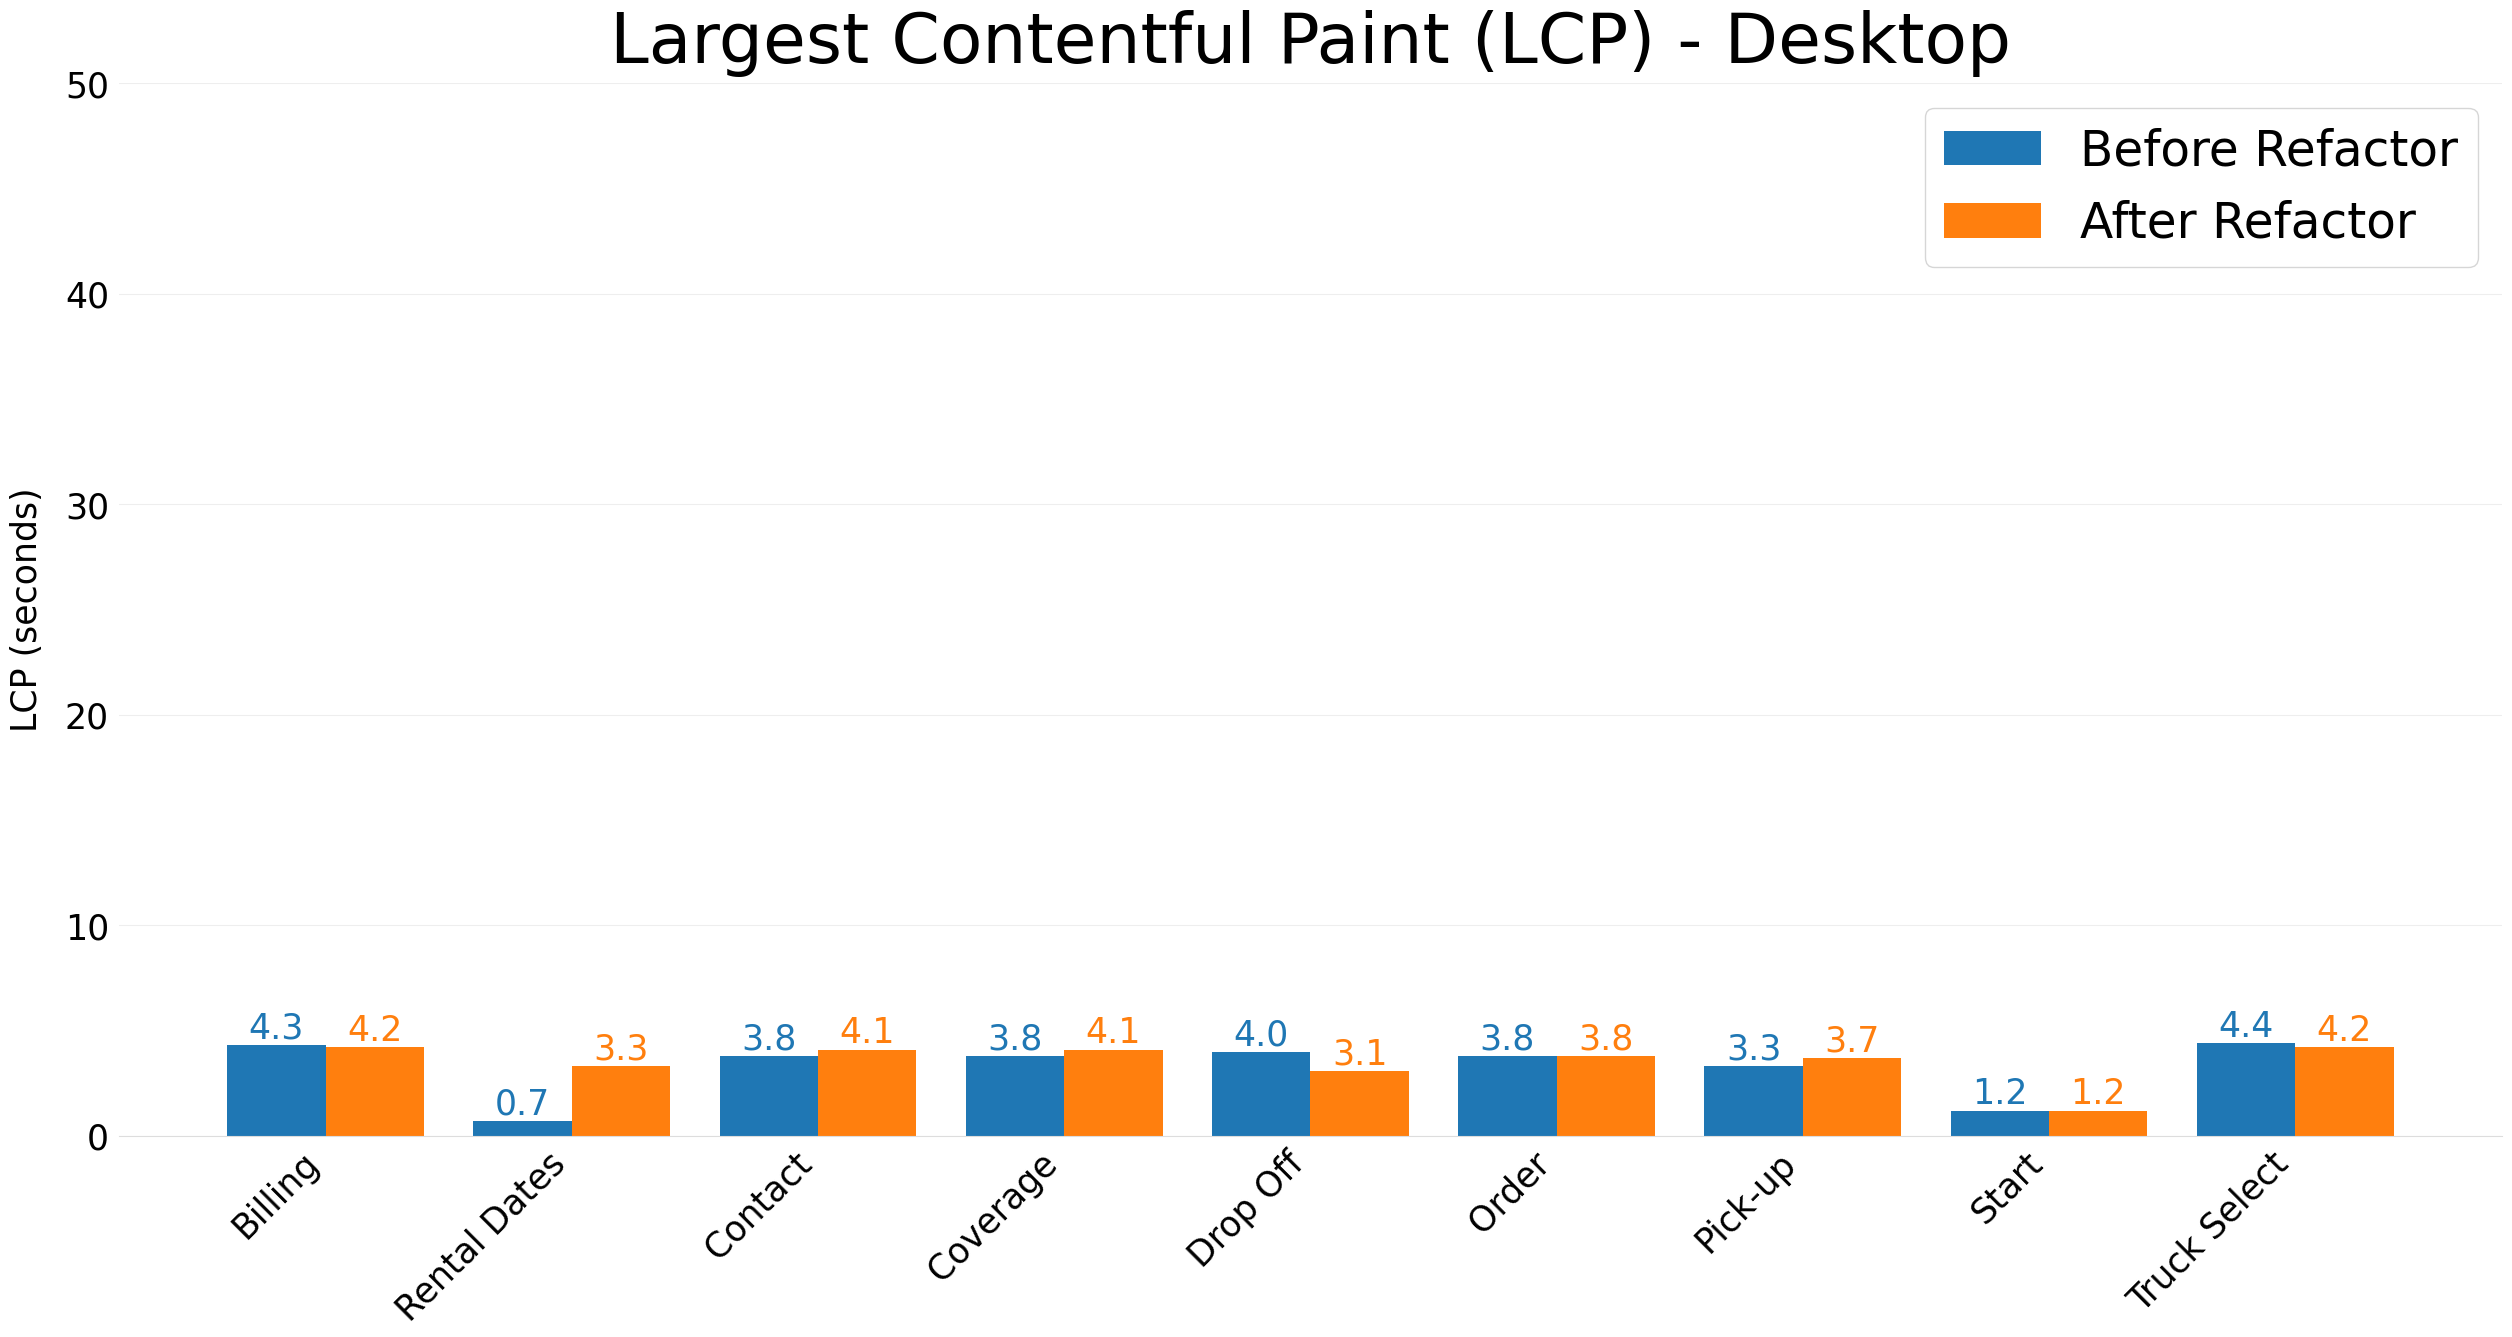

In [125]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results.loc[merged_results['Refactor Type'] == 'Before', 'LCP'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results.loc[merged_results['Refactor Type'] == 'After', 'LCP'],
            width=bar_width, label='After Refactor')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False,labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("LCP (seconds)", labelpad=15, fontsize=25)
ax.set_title("Largest Contentful Paint (LCP) - Desktop", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 50) 
plt.savefig('lcp_desktop.png')
plt.show()

# **First Contentful Paint (FCP)** 
0–1.8 - Fast. 1.8–3 - Moderate. Over 3 - Slow.

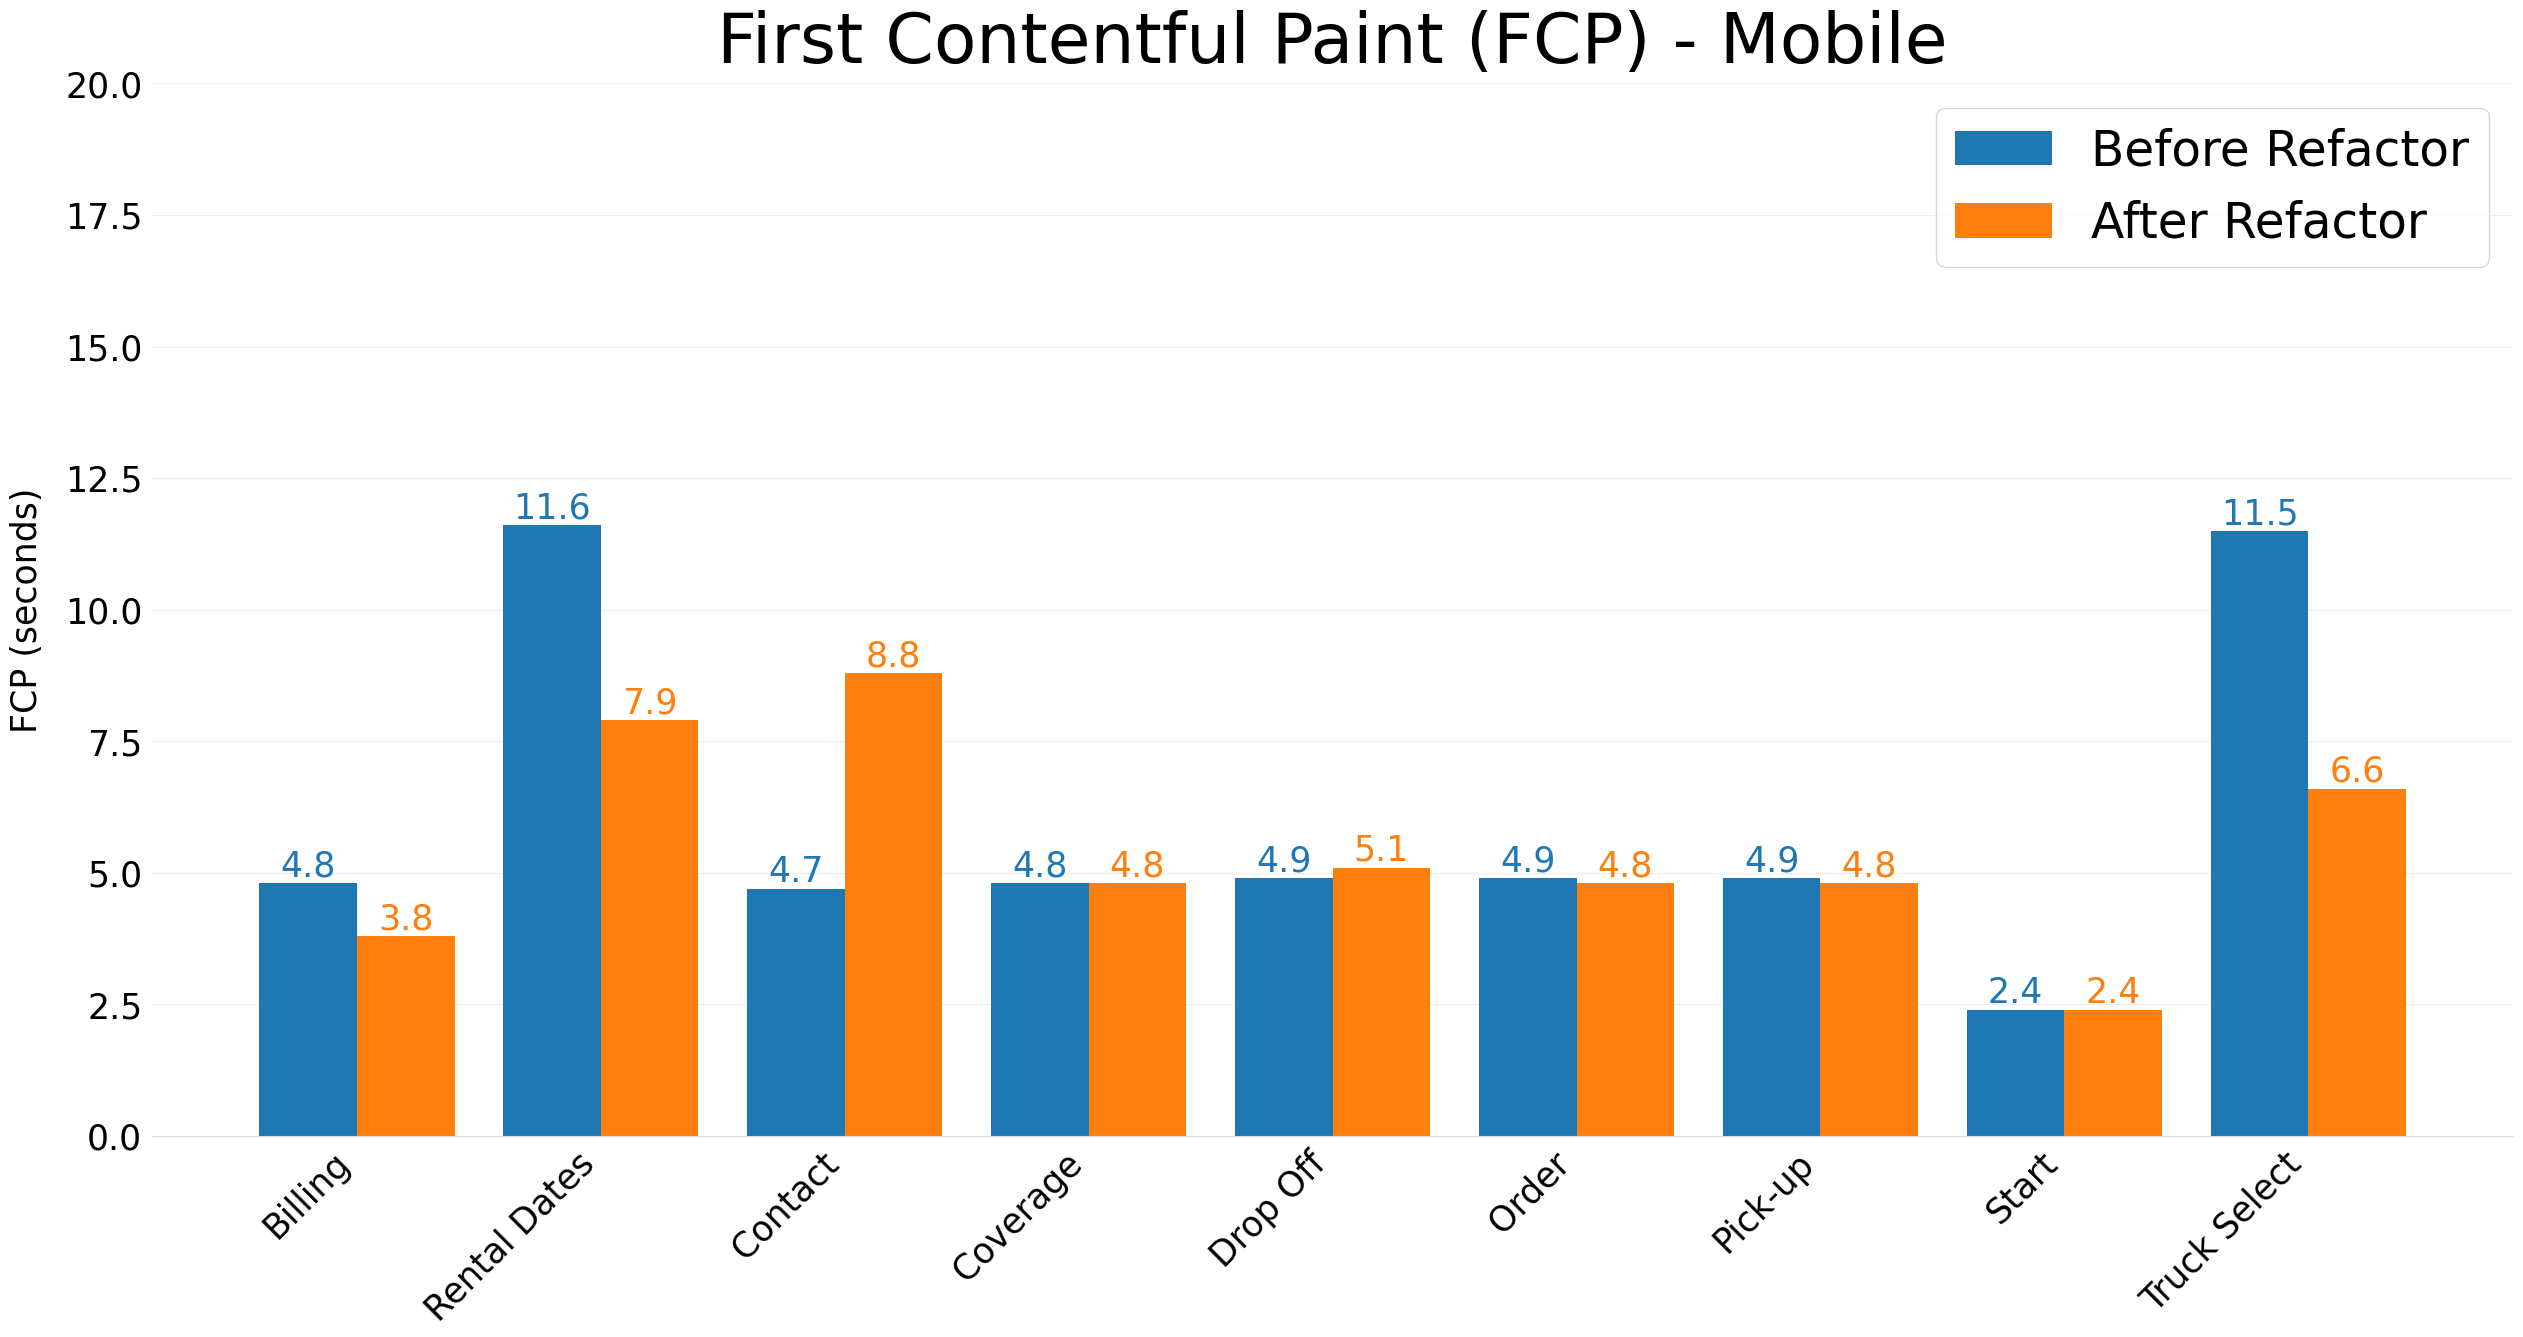

In [126]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results_mobile.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'Before', 'FCP'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'After', 'FCP'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results_mobile.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("FCP (seconds)", labelpad=15, fontsize=25)
ax.set_title("First Contentful Paint (FCP) - Mobile", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 20) 
plt.savefig('fcp_mobile.png')
plt.show()

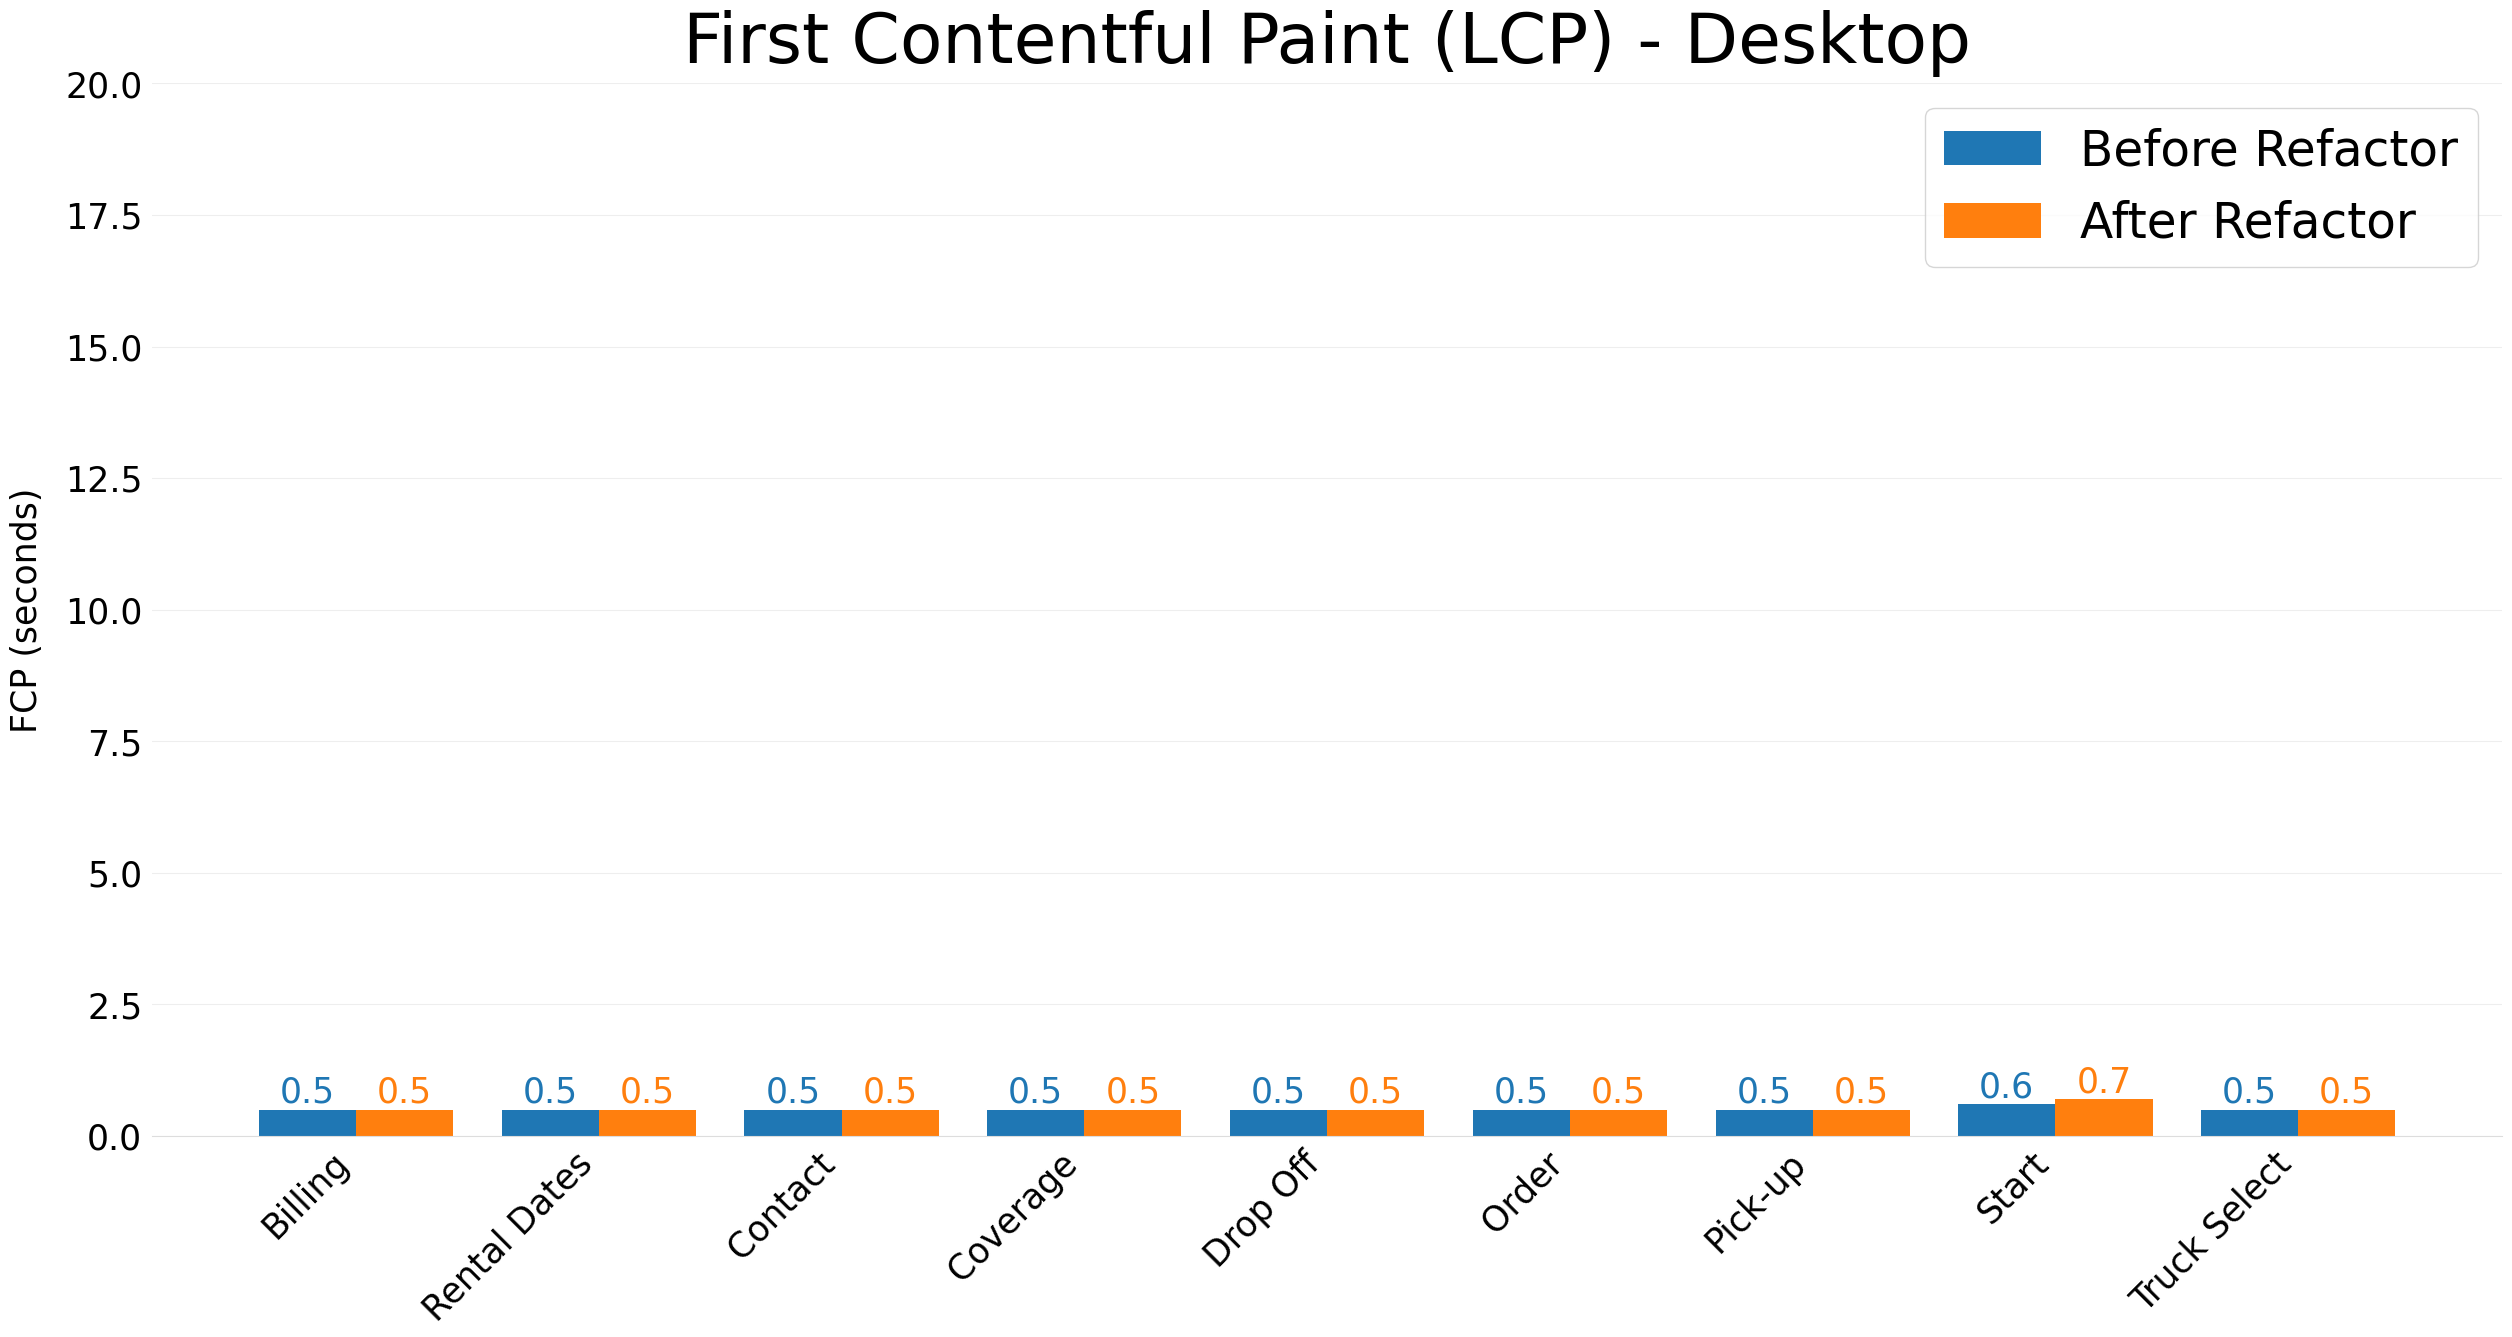

In [127]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results.loc[merged_results['Refactor Type'] == 'Before', 'FCP'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results.loc[merged_results['Refactor Type'] == 'After', 'FCP'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("FCP (seconds)", labelpad=15, fontsize=25)
ax.set_title("First Contentful Paint (LCP) - Desktop", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 20) 
plt.savefig('fcp_desktop.png')
plt.show()

# **Cumulative Layout Shift (CLS)** 
below 0.1 - good. Scores 0.1 to 0.25 - needs improvement. Scores above 0.25 - poor.

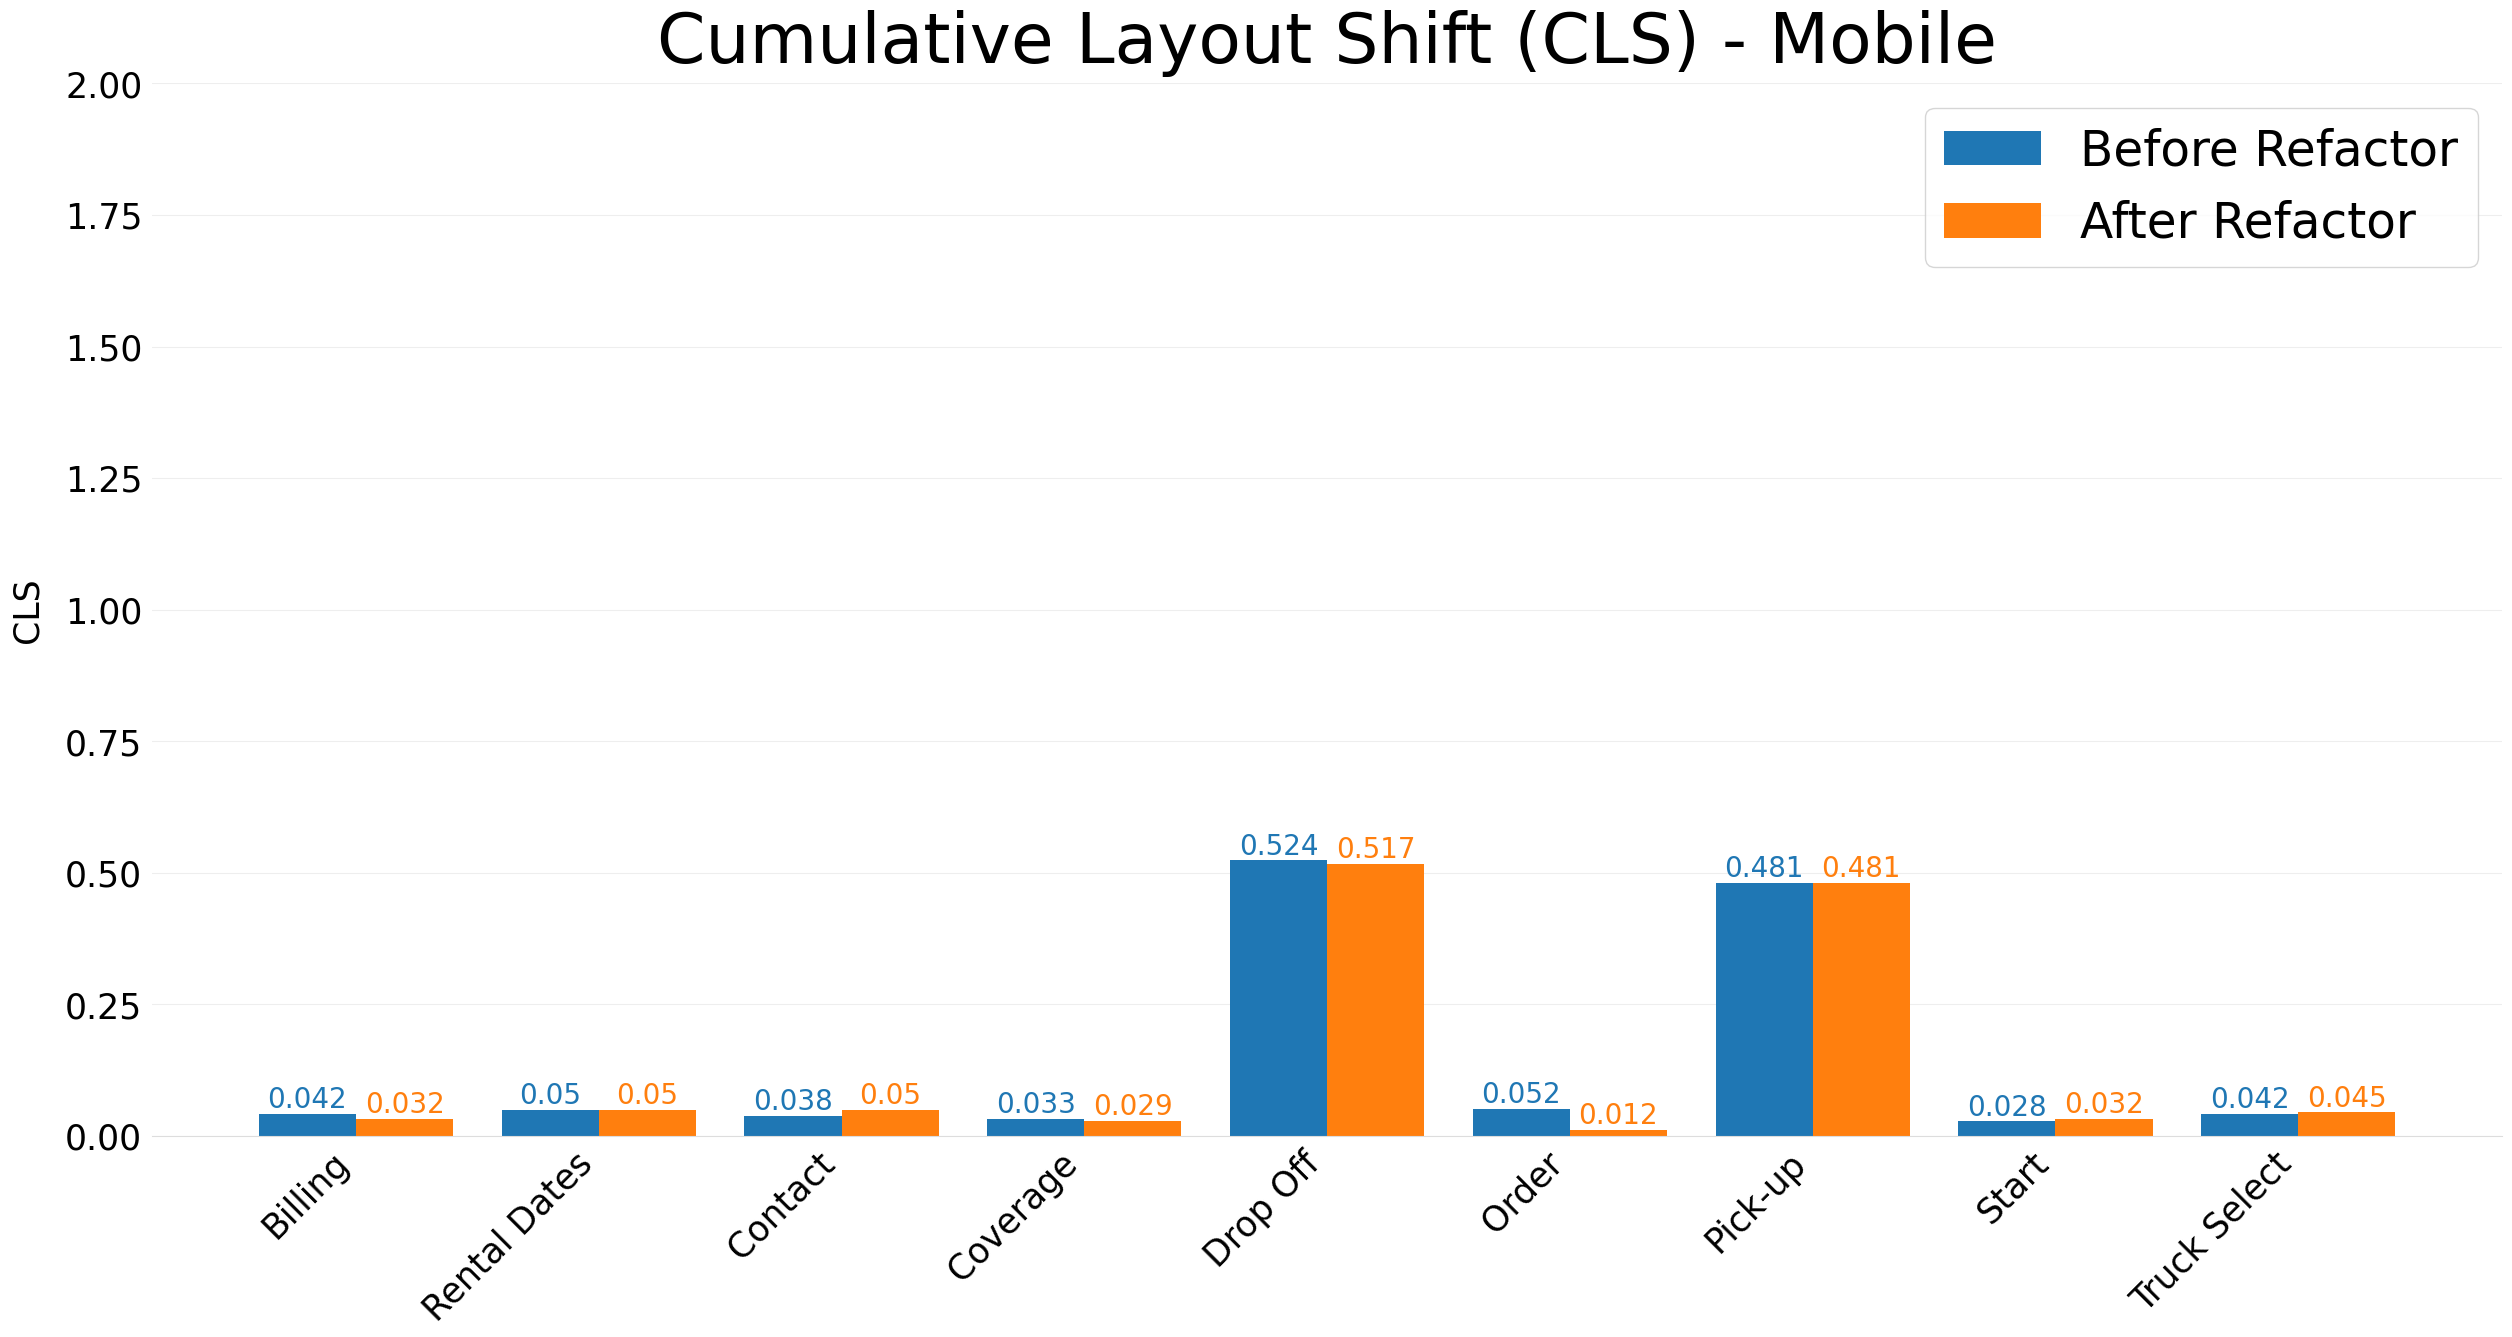

In [128]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results_mobile.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'Before', 'CLS'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'After', 'CLS'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results_mobile.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("CLS", labelpad=15, fontsize=25)
ax.set_title("Cumulative Layout Shift (CLS) - Mobile", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=20)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 2)
plt.savefig('cls_mobile.png')
plt.show()

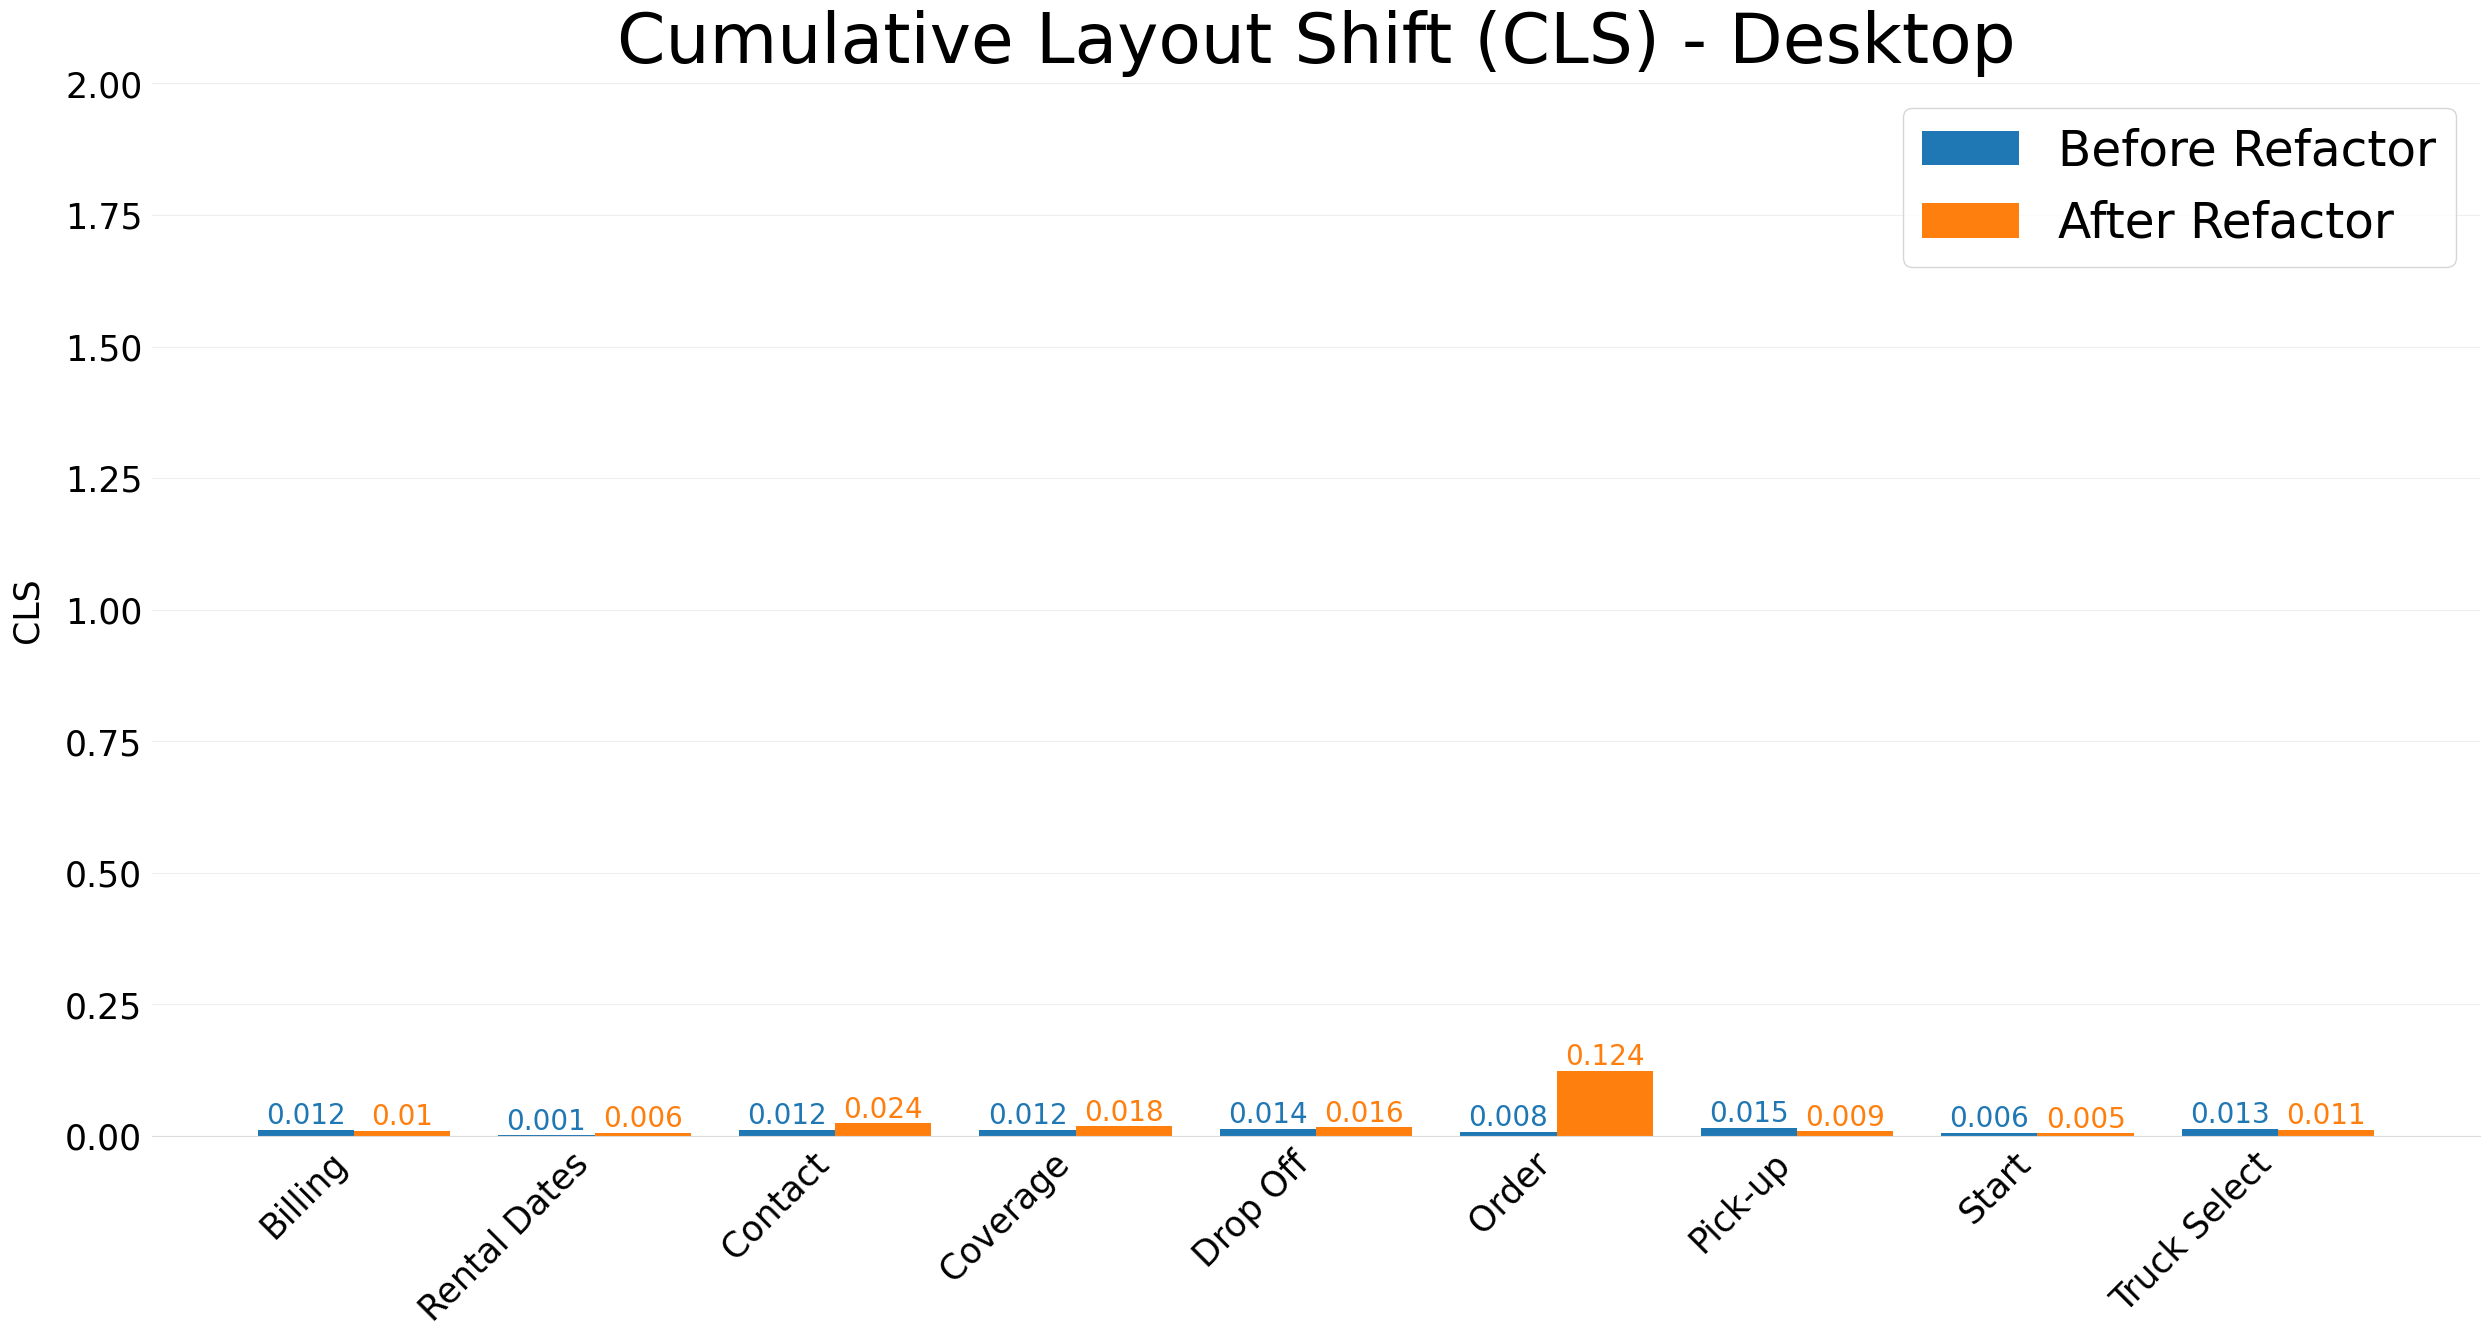

In [129]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results.loc[merged_results['Refactor Type'] == 'Before', 'CLS'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results.loc[merged_results['Refactor Type'] == 'After', 'CLS'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("CLS", labelpad=15, fontsize=25)
ax.set_title("Cumulative Layout Shift (CLS) - Desktop", pad=15,fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=20)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 2)
plt.savefig('cls_desktop.png')
plt.show()

# **Performance (Lighthouse)** 
90-100 - Good. 50-89 - Moderate. 0-49 - Bad.

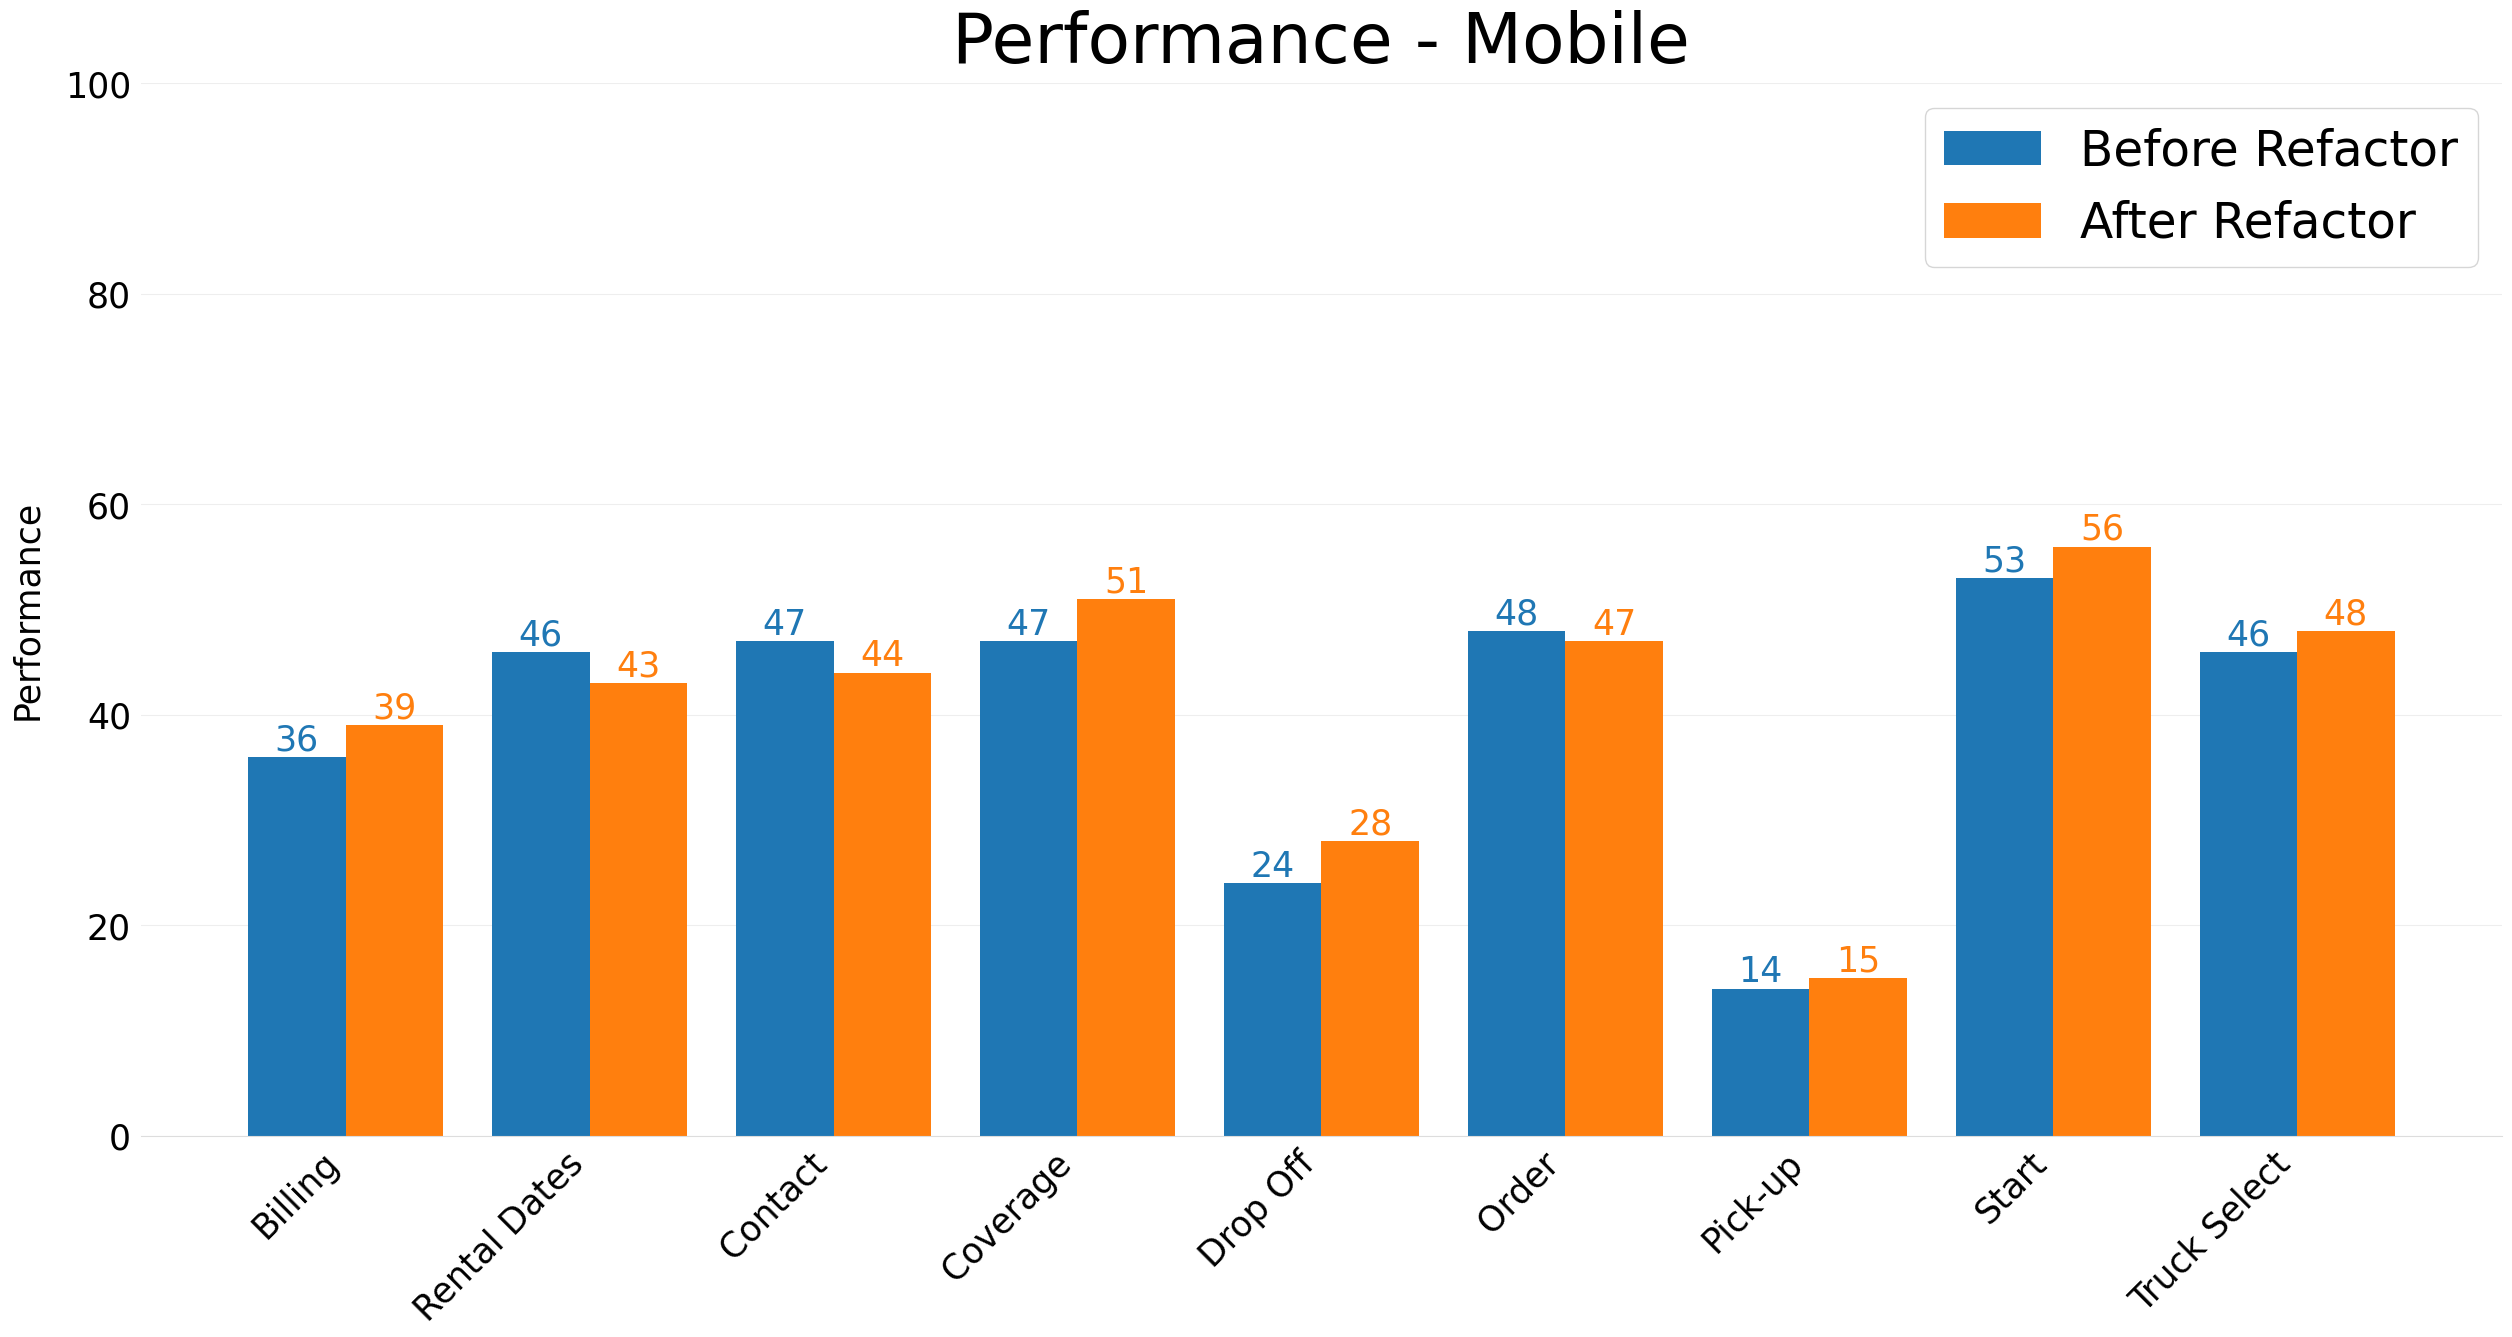

In [130]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results_mobile.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'Before', 'Performance'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'After', 'Performance'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results_mobile.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("Performance", labelpad=15, fontsize=25)
ax.set_title("Performance - Mobile", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) 
plt.savefig('performance_mobile.png')
plt.show()

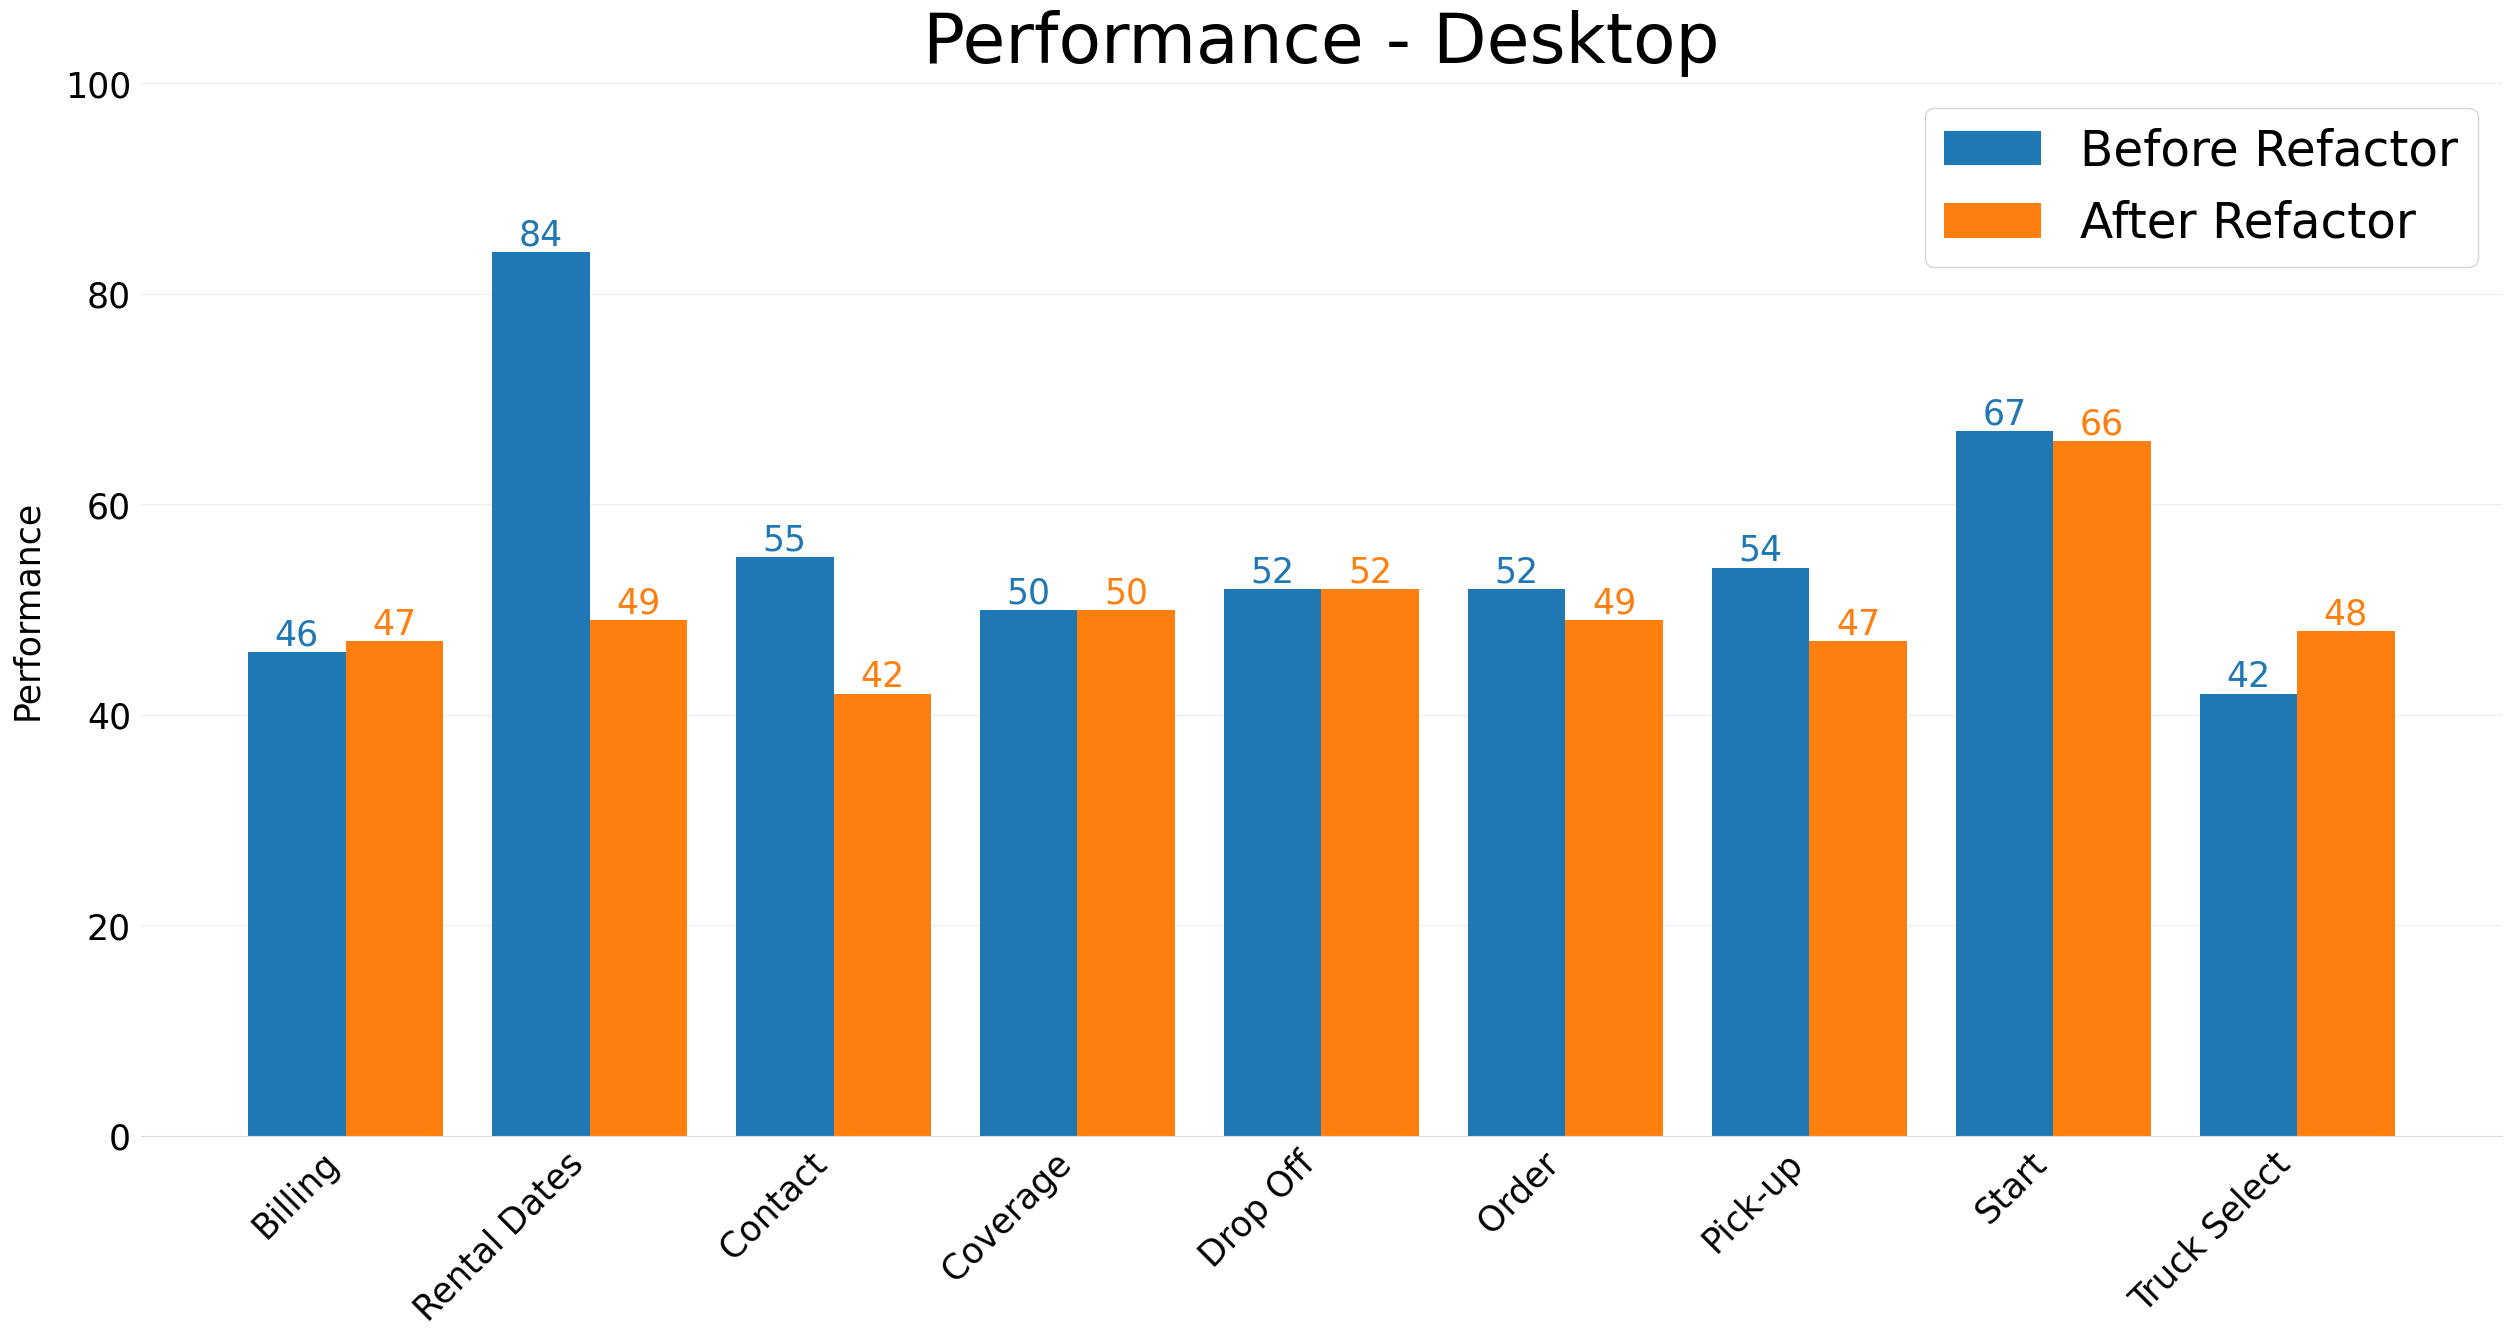

In [131]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results.loc[merged_results['Refactor Type'] == 'Before', 'Performance'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results.loc[merged_results['Refactor Type'] == 'After', 'Performance'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("Performance", labelpad=15,fontsize=25)
ax.set_title("Performance - Desktop", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.savefig('performance_desktop.png')
plt.show()

# **Accessibility**
90-100 - Good. 50-89 - Needs Improvement. Below 50 - Bad.

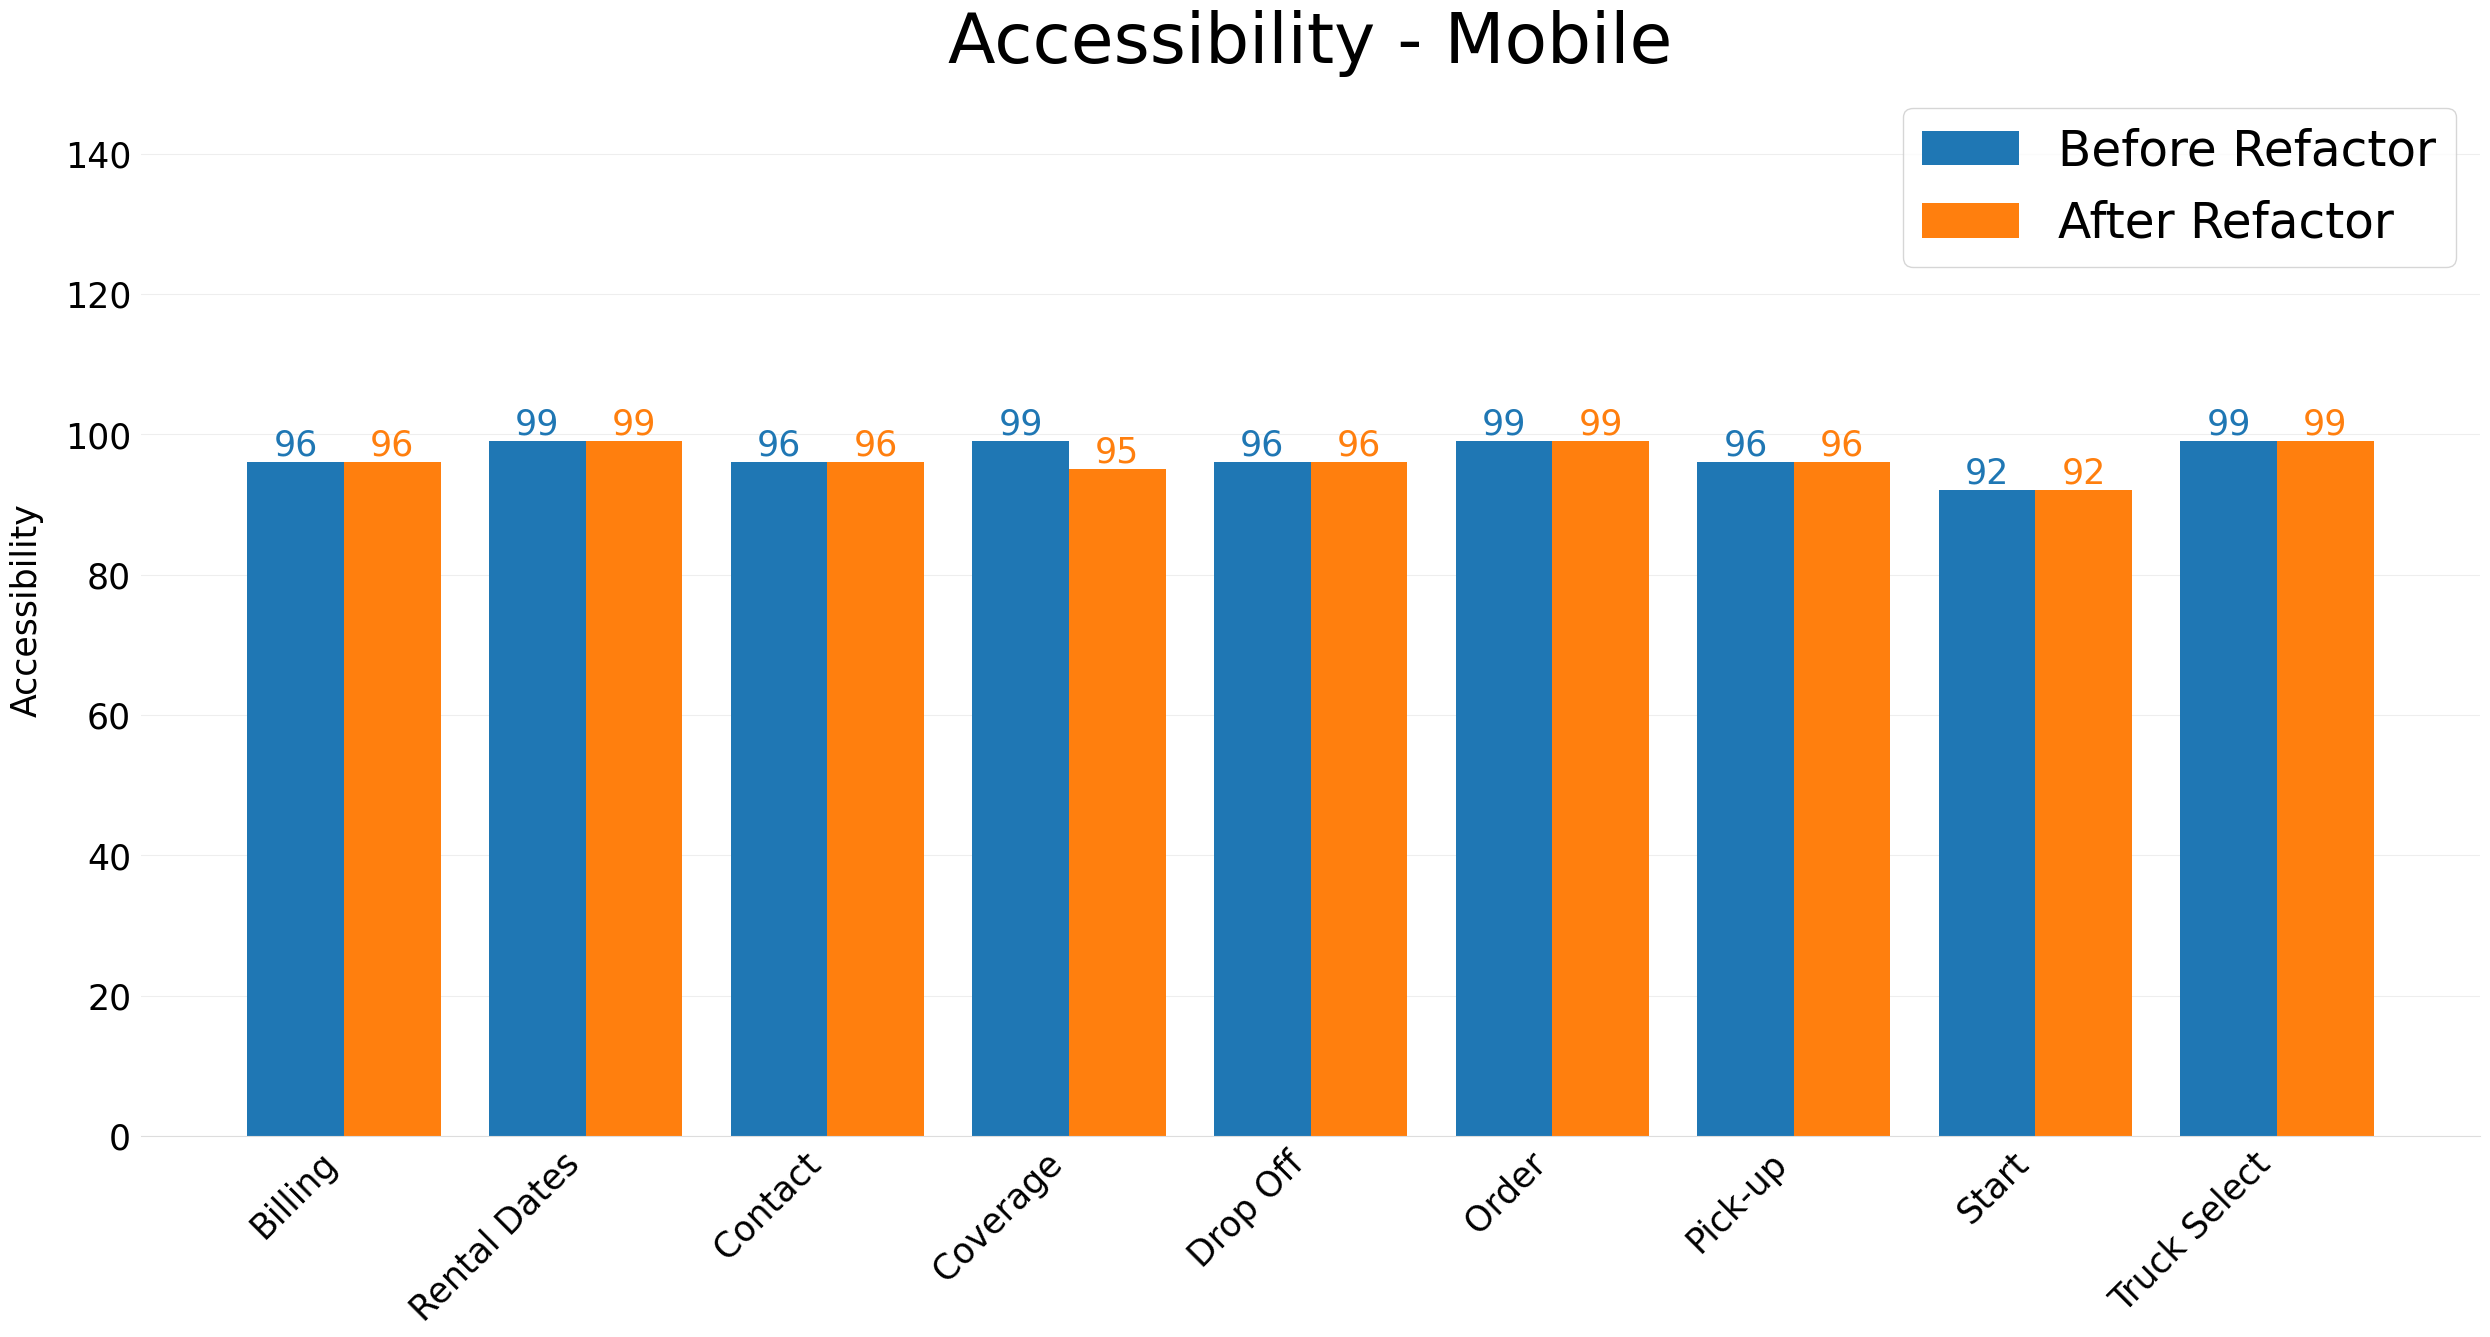

In [132]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results_mobile.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'Before', 'Accessibility'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'After', 'Accessibility'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results_mobile.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("Accessibility", labelpad=15, fontsize=25)
ax.set_title("Accessibility - Mobile", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 150) 
plt.savefig('accessibility_mobile.png')
plt.show()

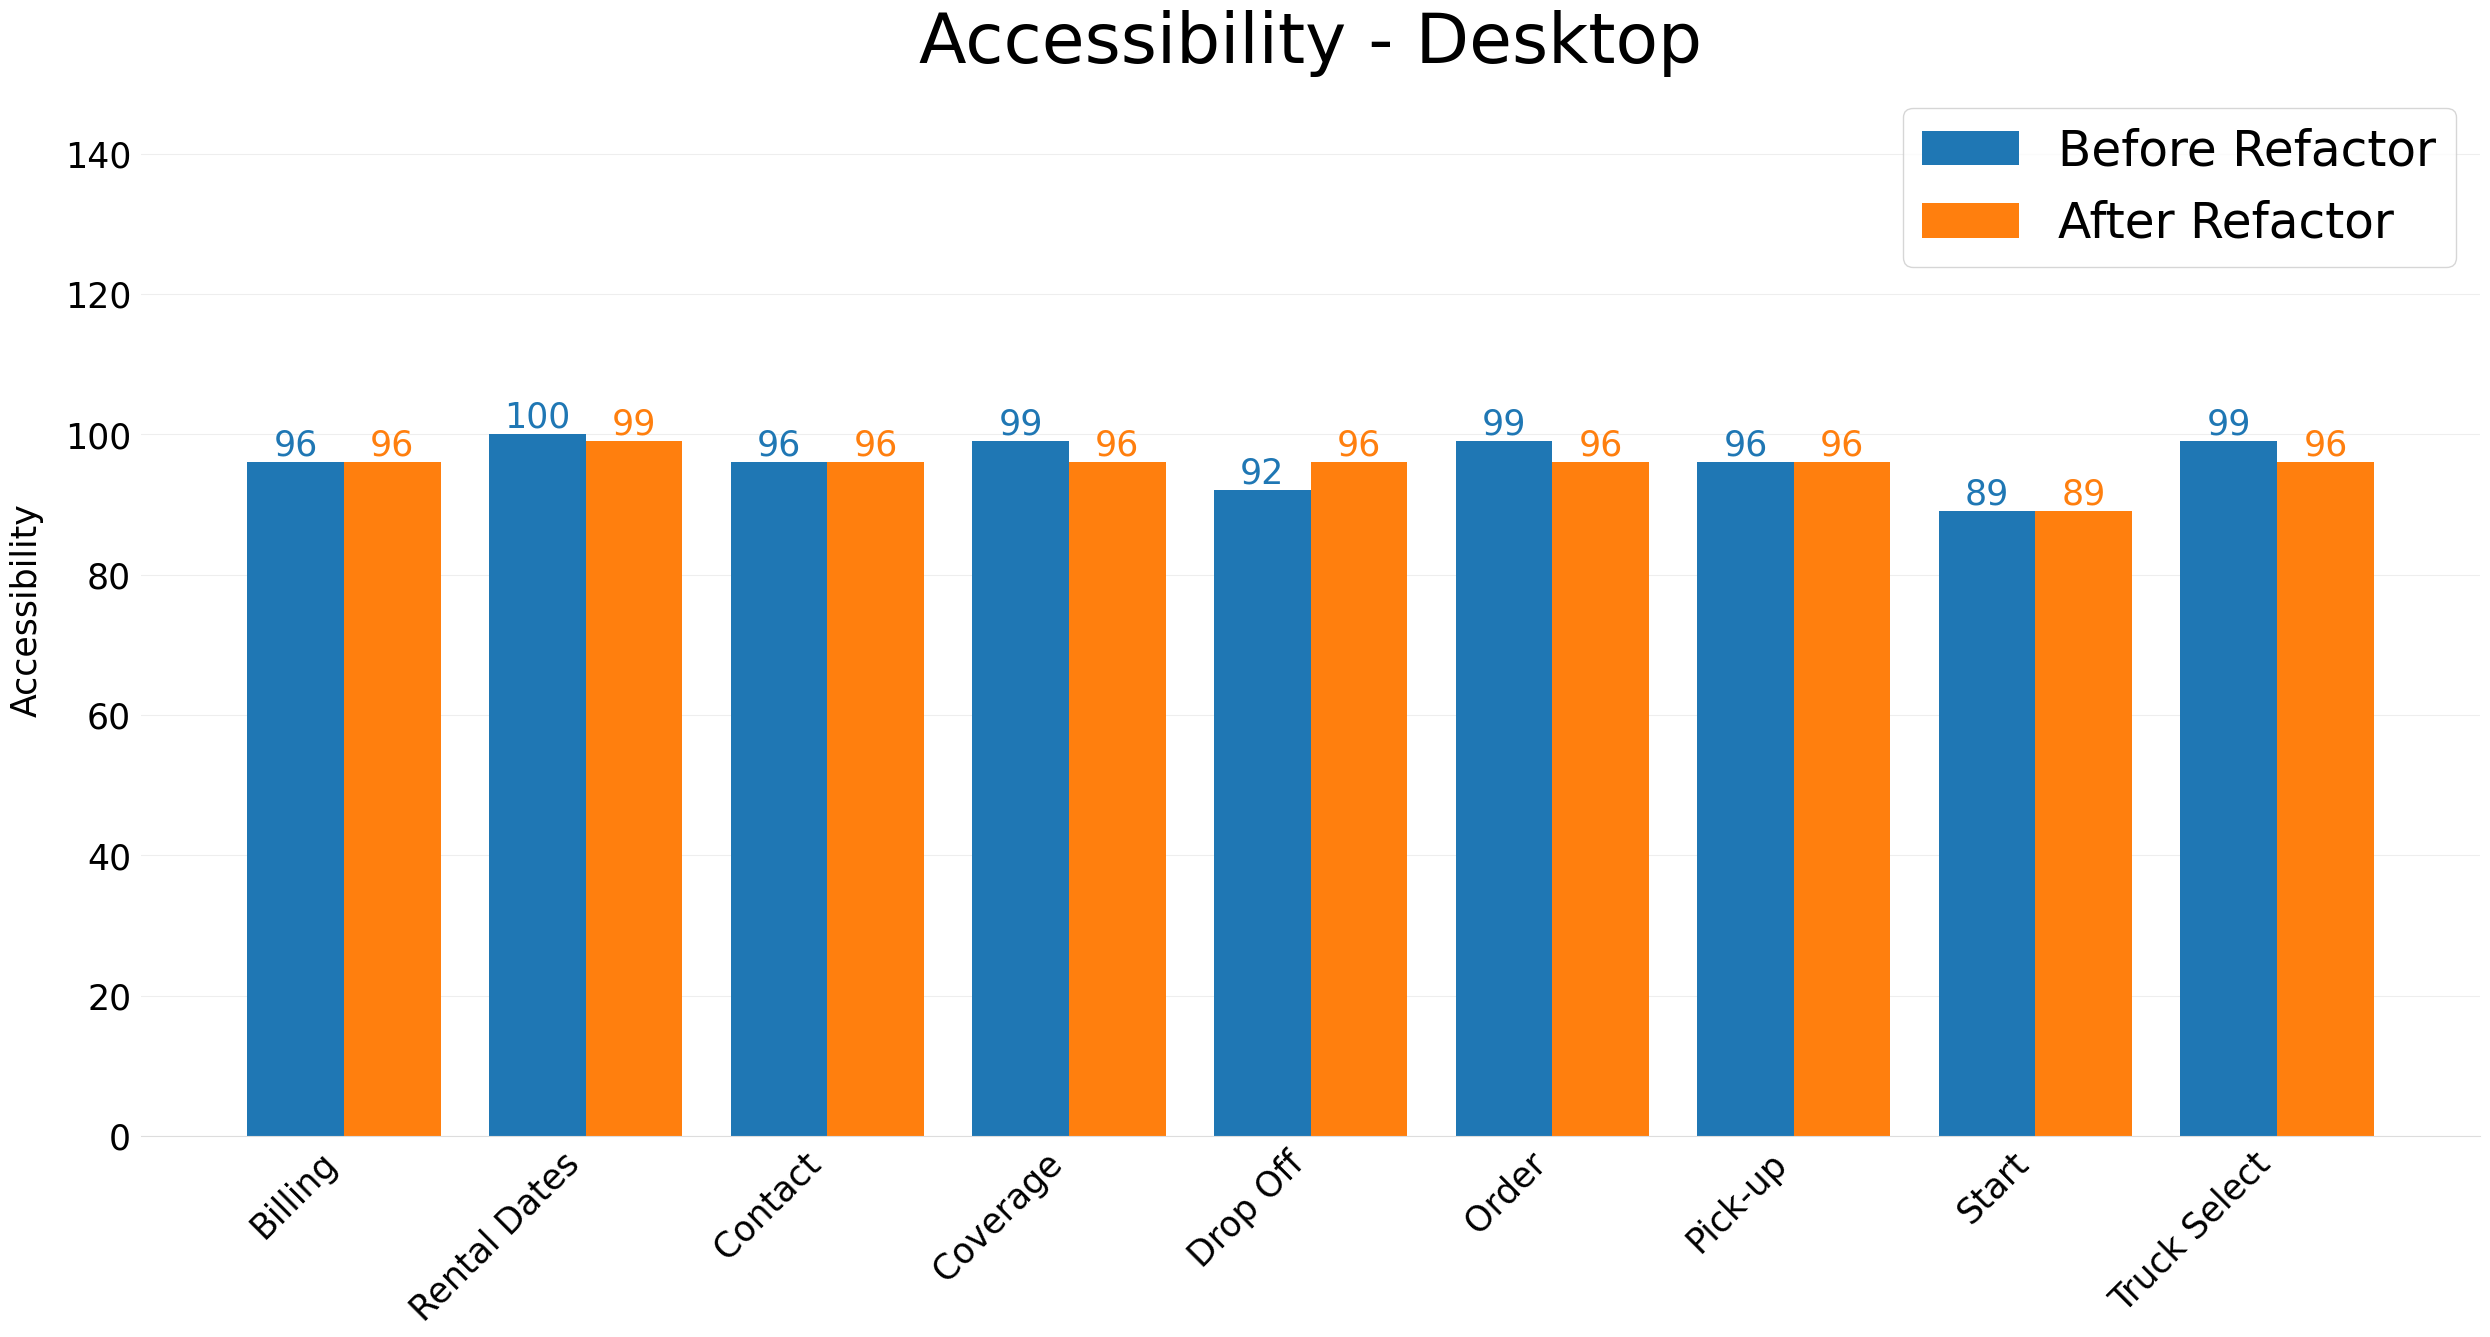

In [133]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results.loc[merged_results['Refactor Type'] == 'Before', 'Accessibility'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results.loc[merged_results['Refactor Type'] == 'After', 'Accessibility'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("Accessibility", labelpad=15, fontsize=25)
ax.set_title("Accessibility - Desktop", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 150) 
plt.savefig('accessibility_desktop.png')
plt.show()

# **Best Practices**
90-100 - Good. 50-89 - Needs Improvement. Below 50 - Bad.

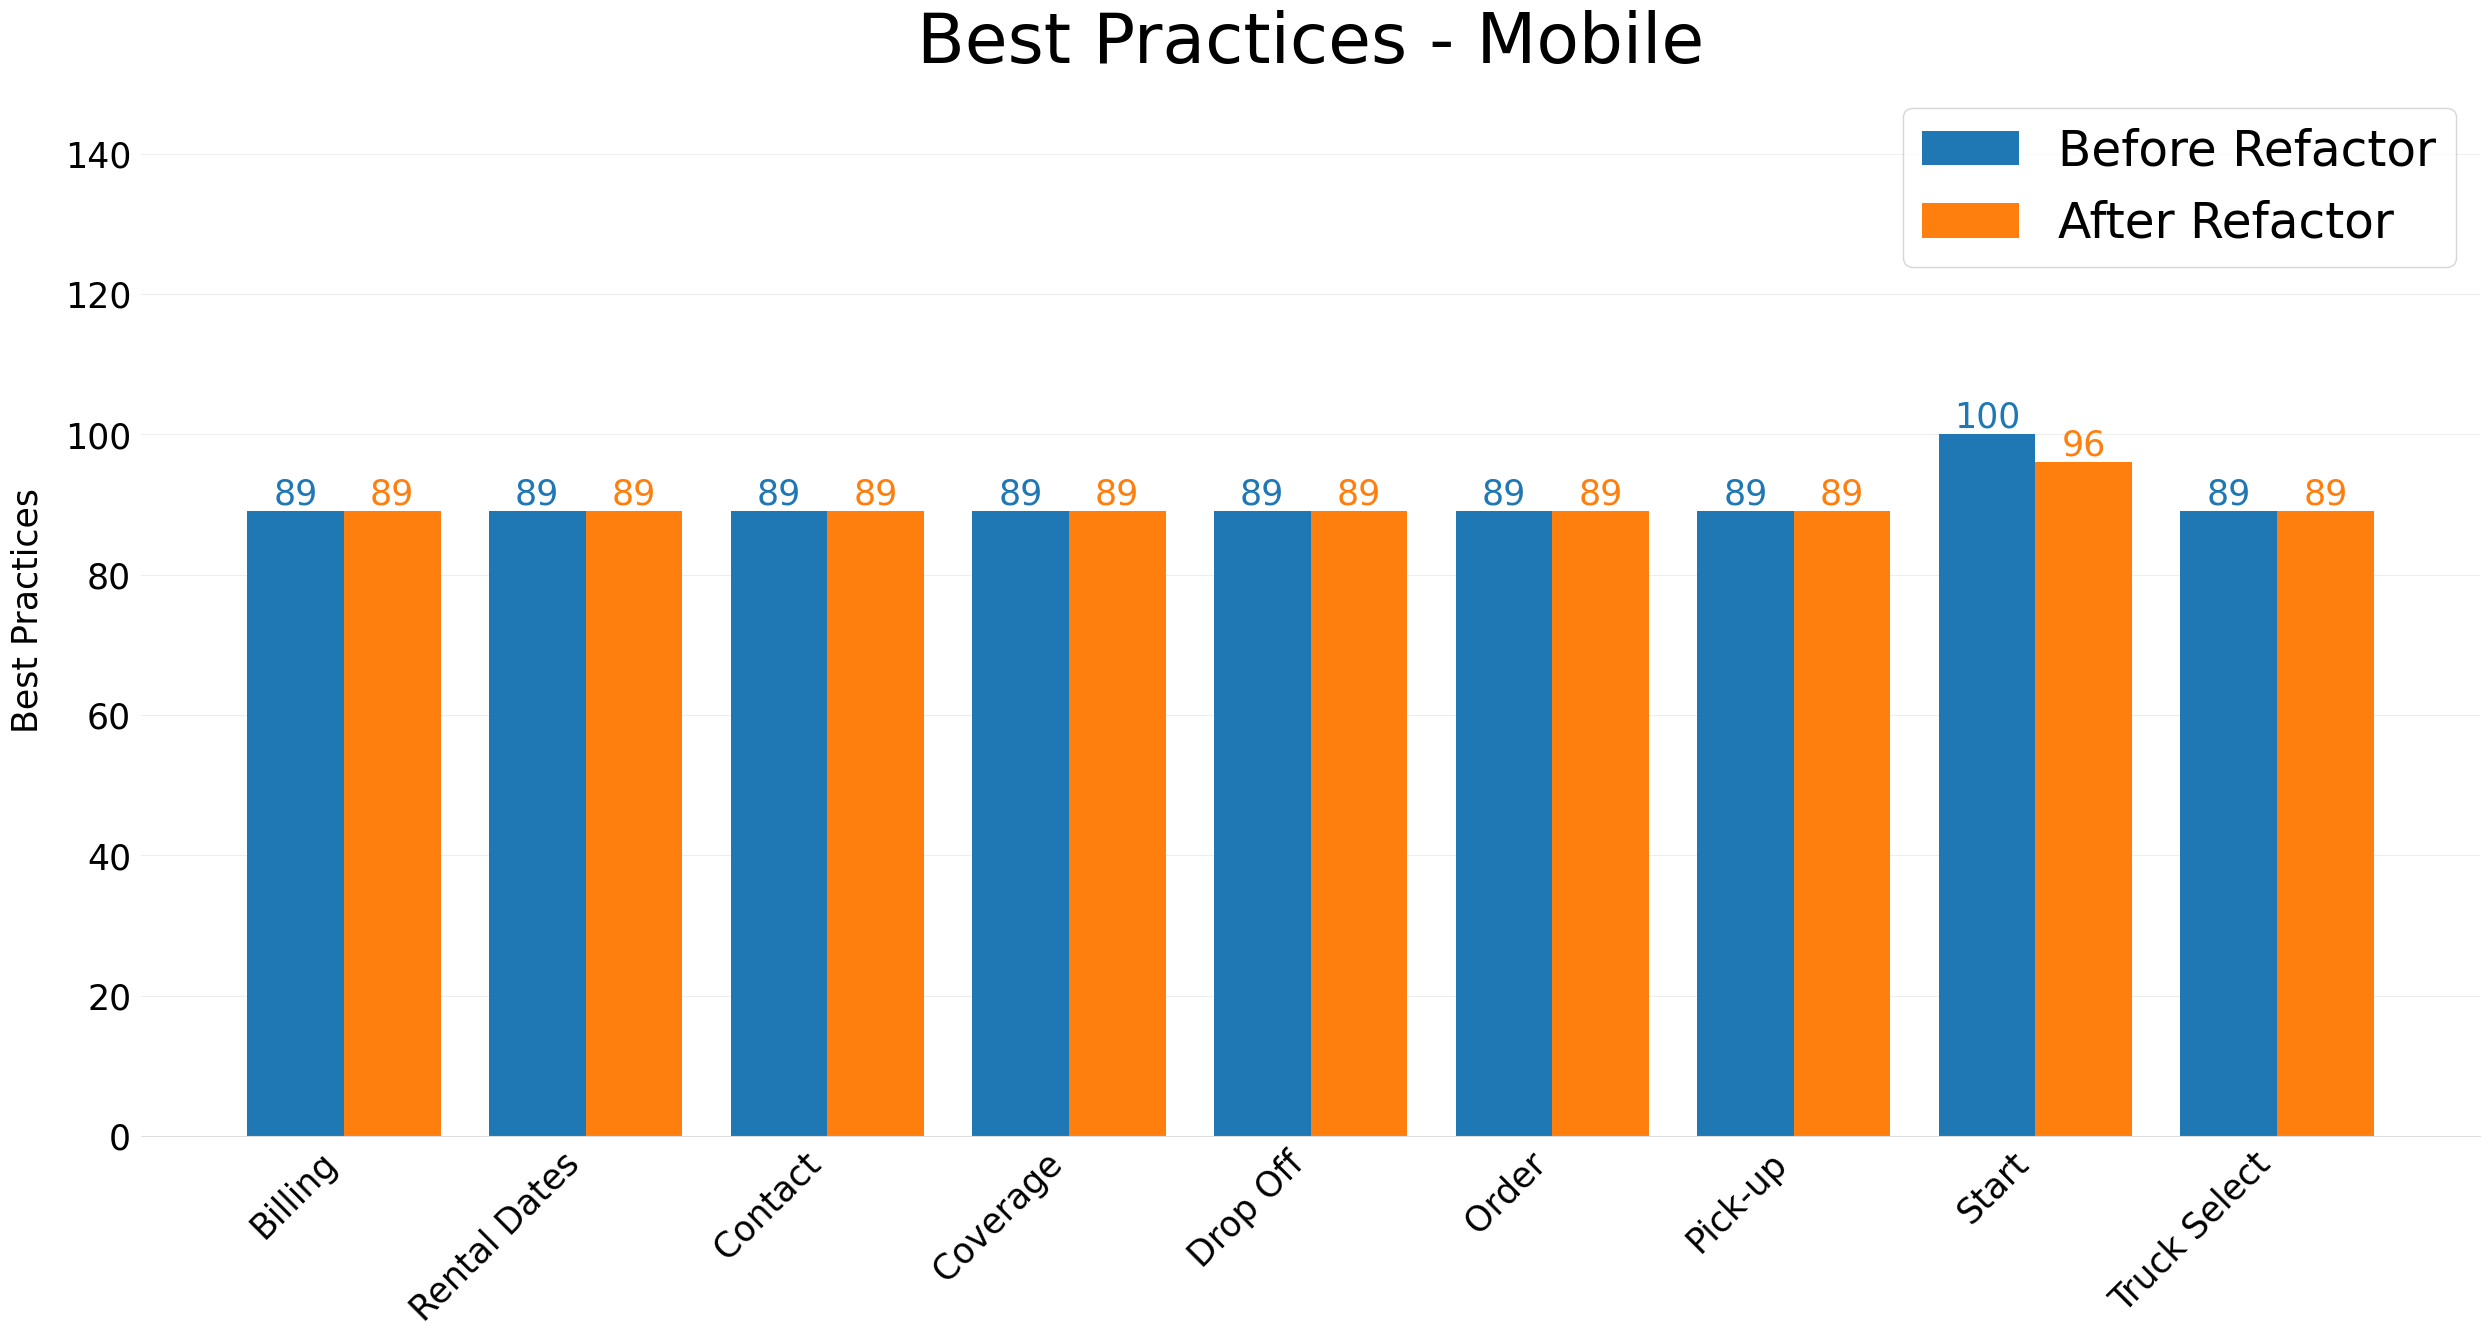

In [134]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results_mobile.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'Before', 'Best Practices'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'After', 'Best Practices'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results_mobile.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("Best Practices", labelpad=15, fontsize=25)
ax.set_title("Best Practices - Mobile", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 150) 
plt.savefig('best_practices_mobile.png')
plt.show()

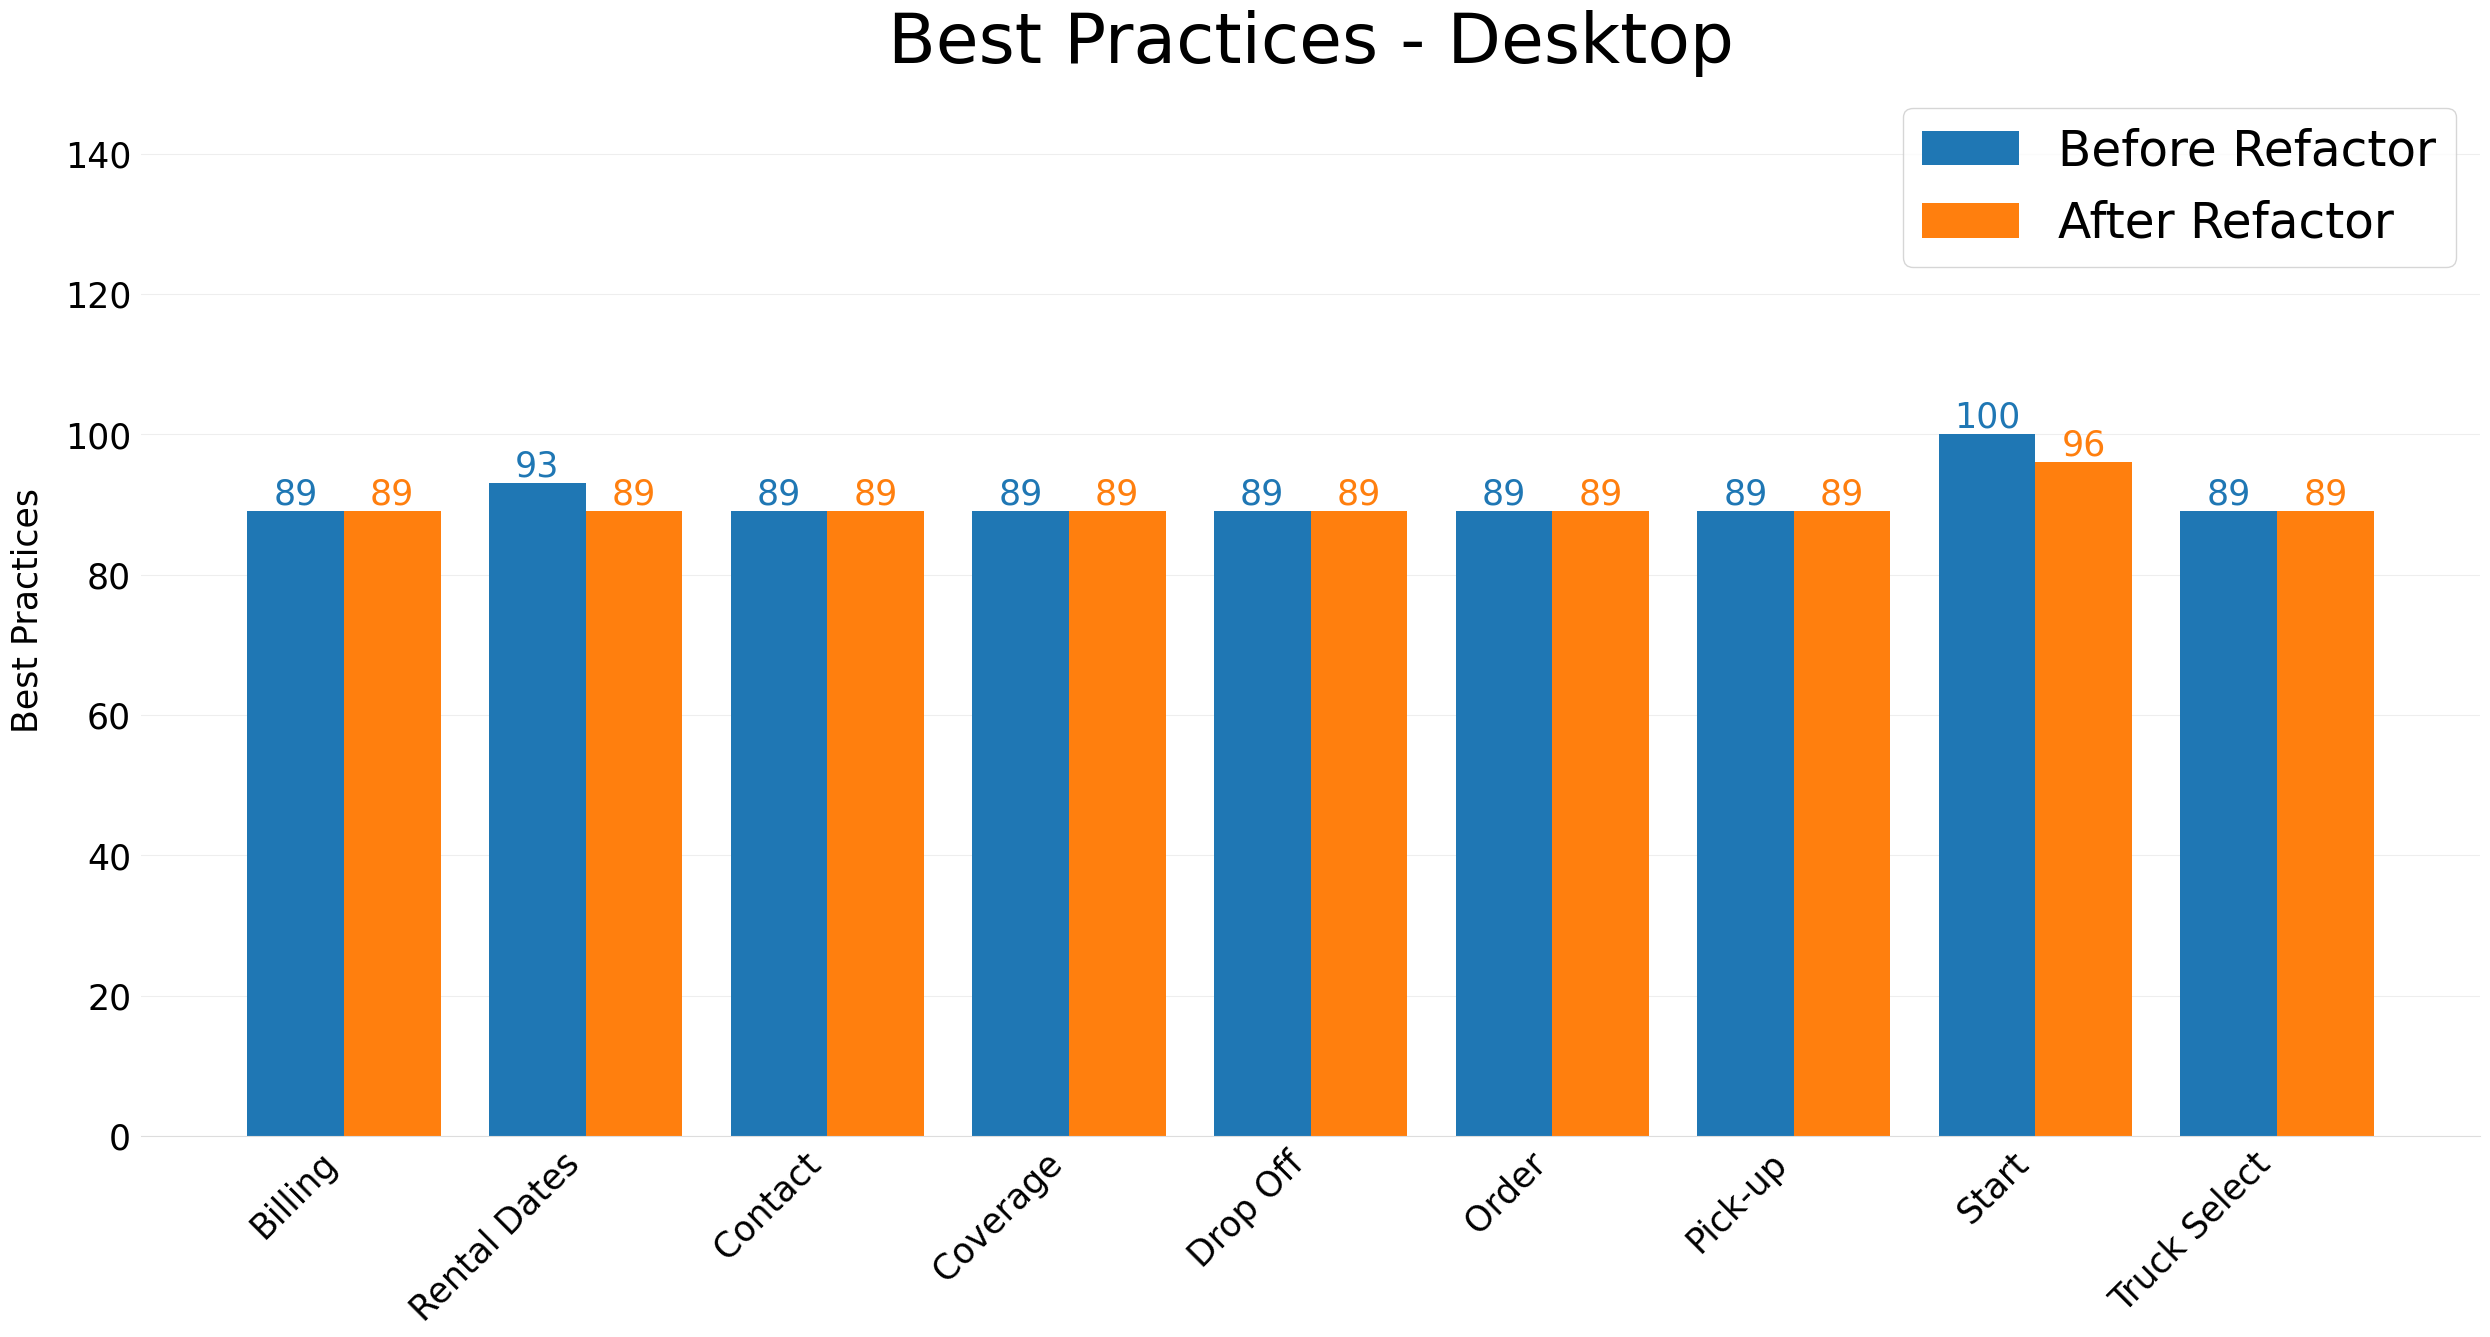

In [135]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results.loc[merged_results['Refactor Type'] == 'Before', 'Best Practices'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results.loc[merged_results['Refactor Type'] == 'After', 'Best Practices'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("Best Practices", labelpad=15, fontsize=25)
ax.set_title("Best Practices - Desktop", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 150) 
plt.savefig('best_practices_desktop.png')
plt.show()

# **SEO**
90-100 (Good). 50-89 (Average). 0-49 (Poor).

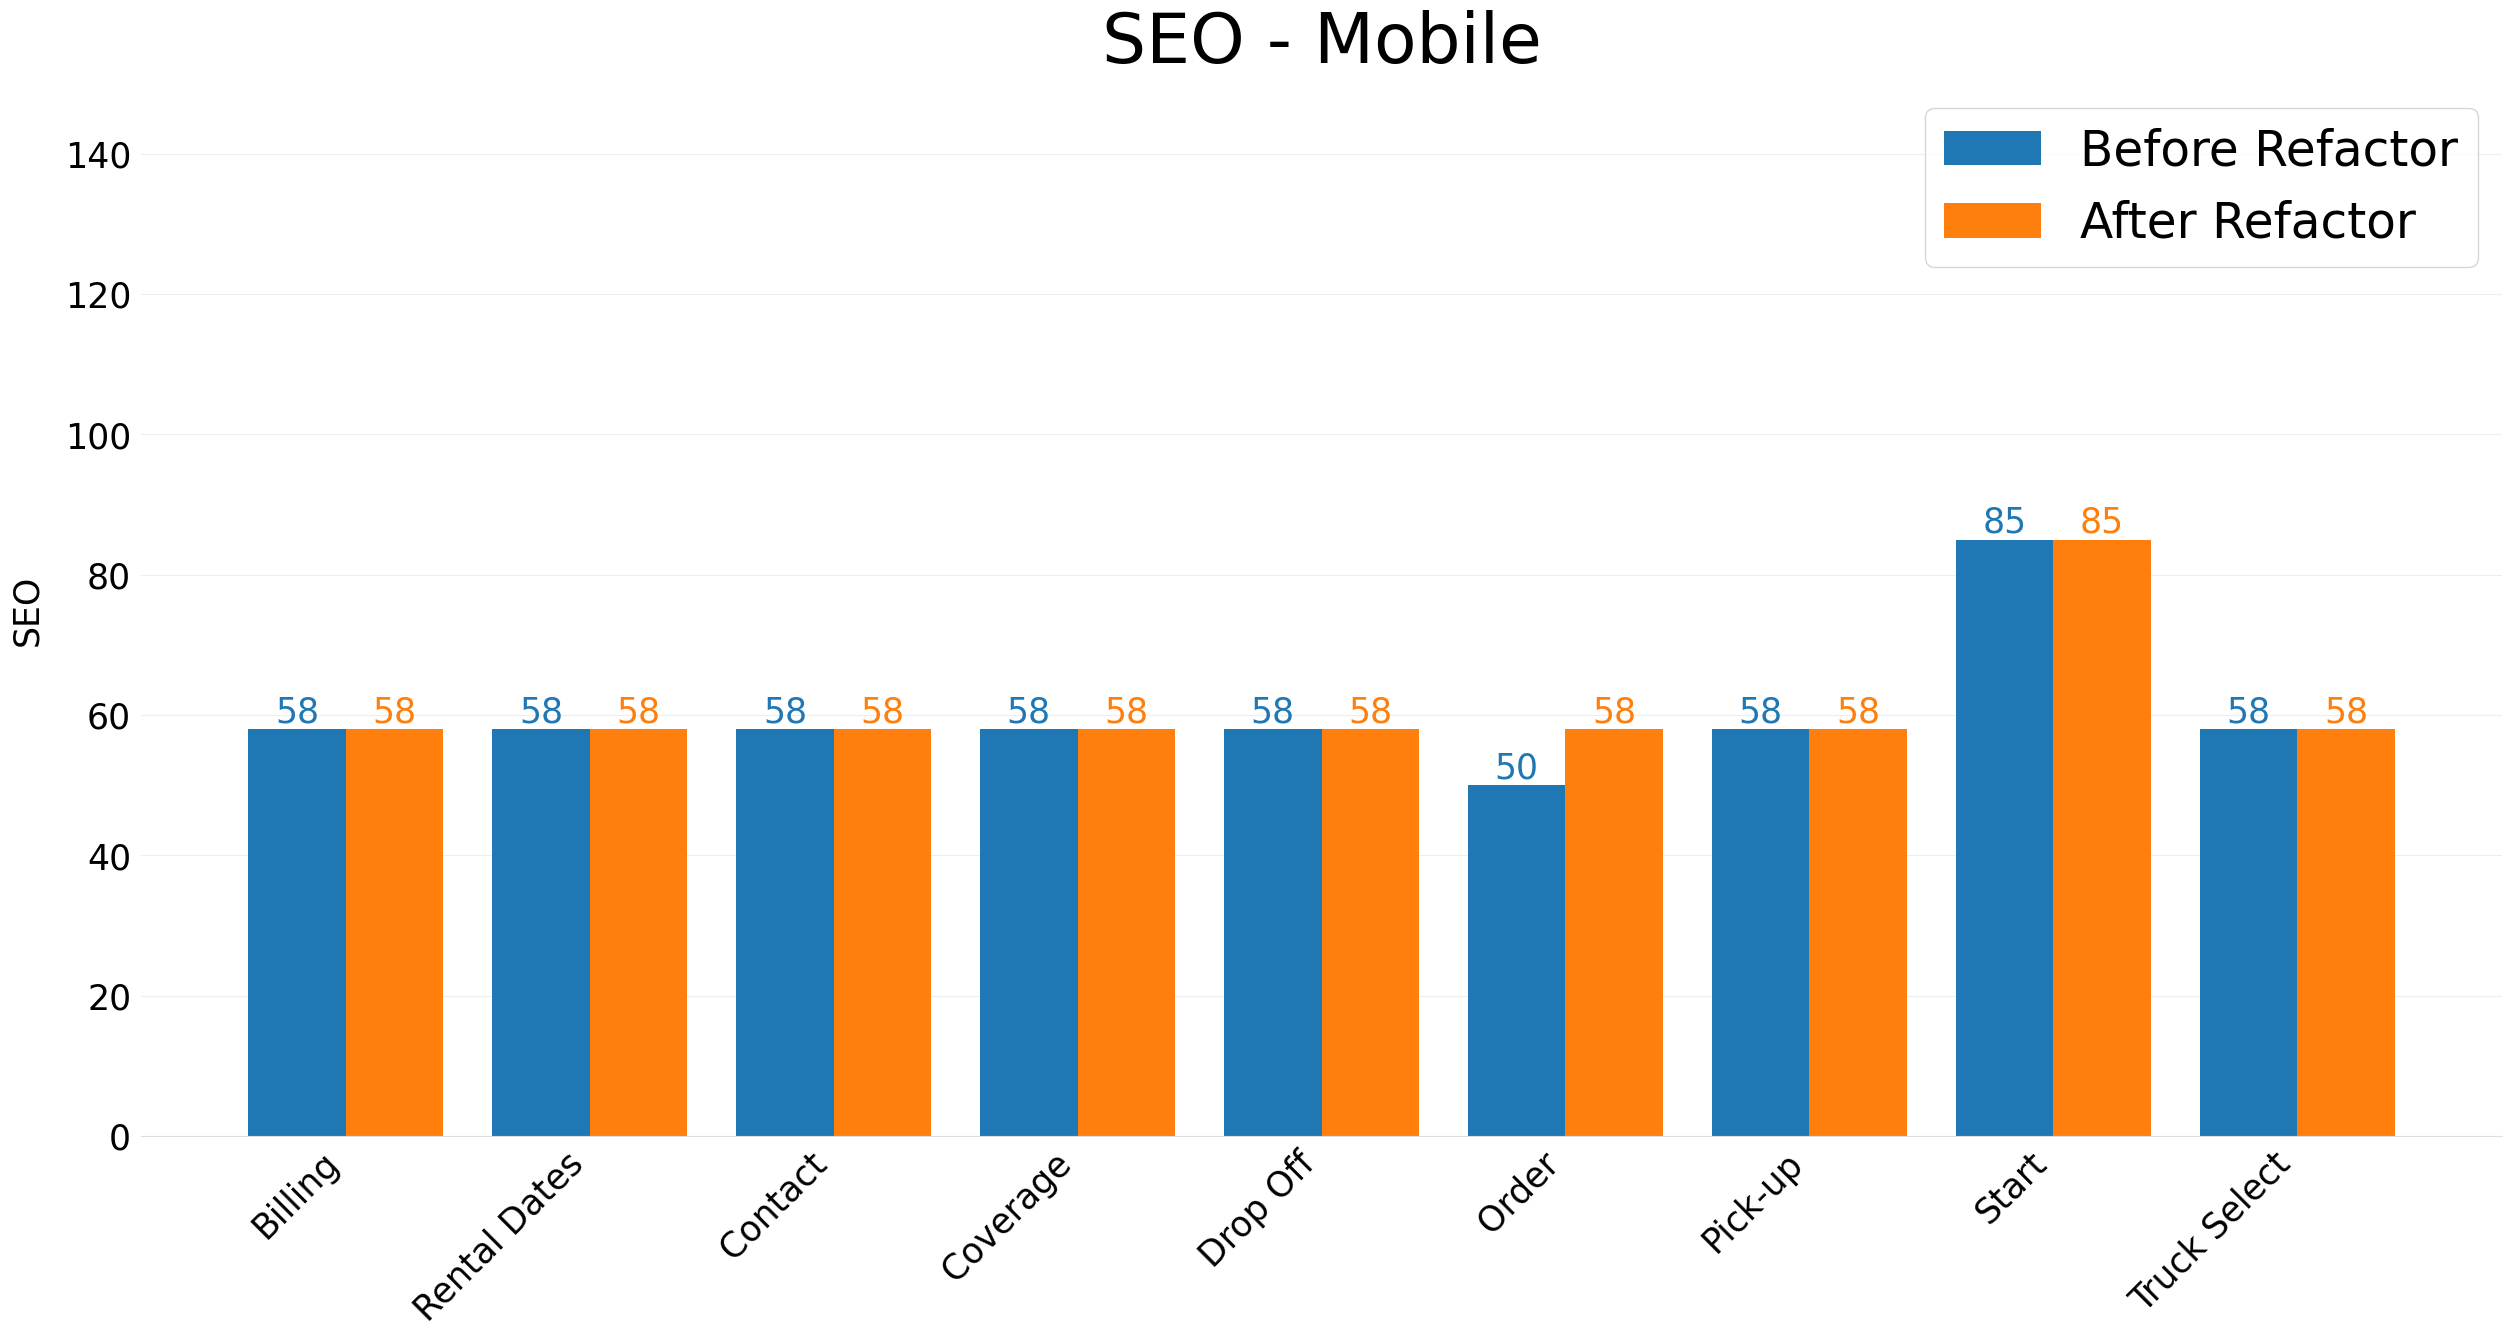

In [136]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results_mobile.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'Before', 'SEO'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'After', 'SEO'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results_mobile.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("SEO", labelpad=15, fontsize=25)
ax.set_title("SEO - Mobile", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 150) 
plt.savefig('SEO_mobile.png')
plt.show()

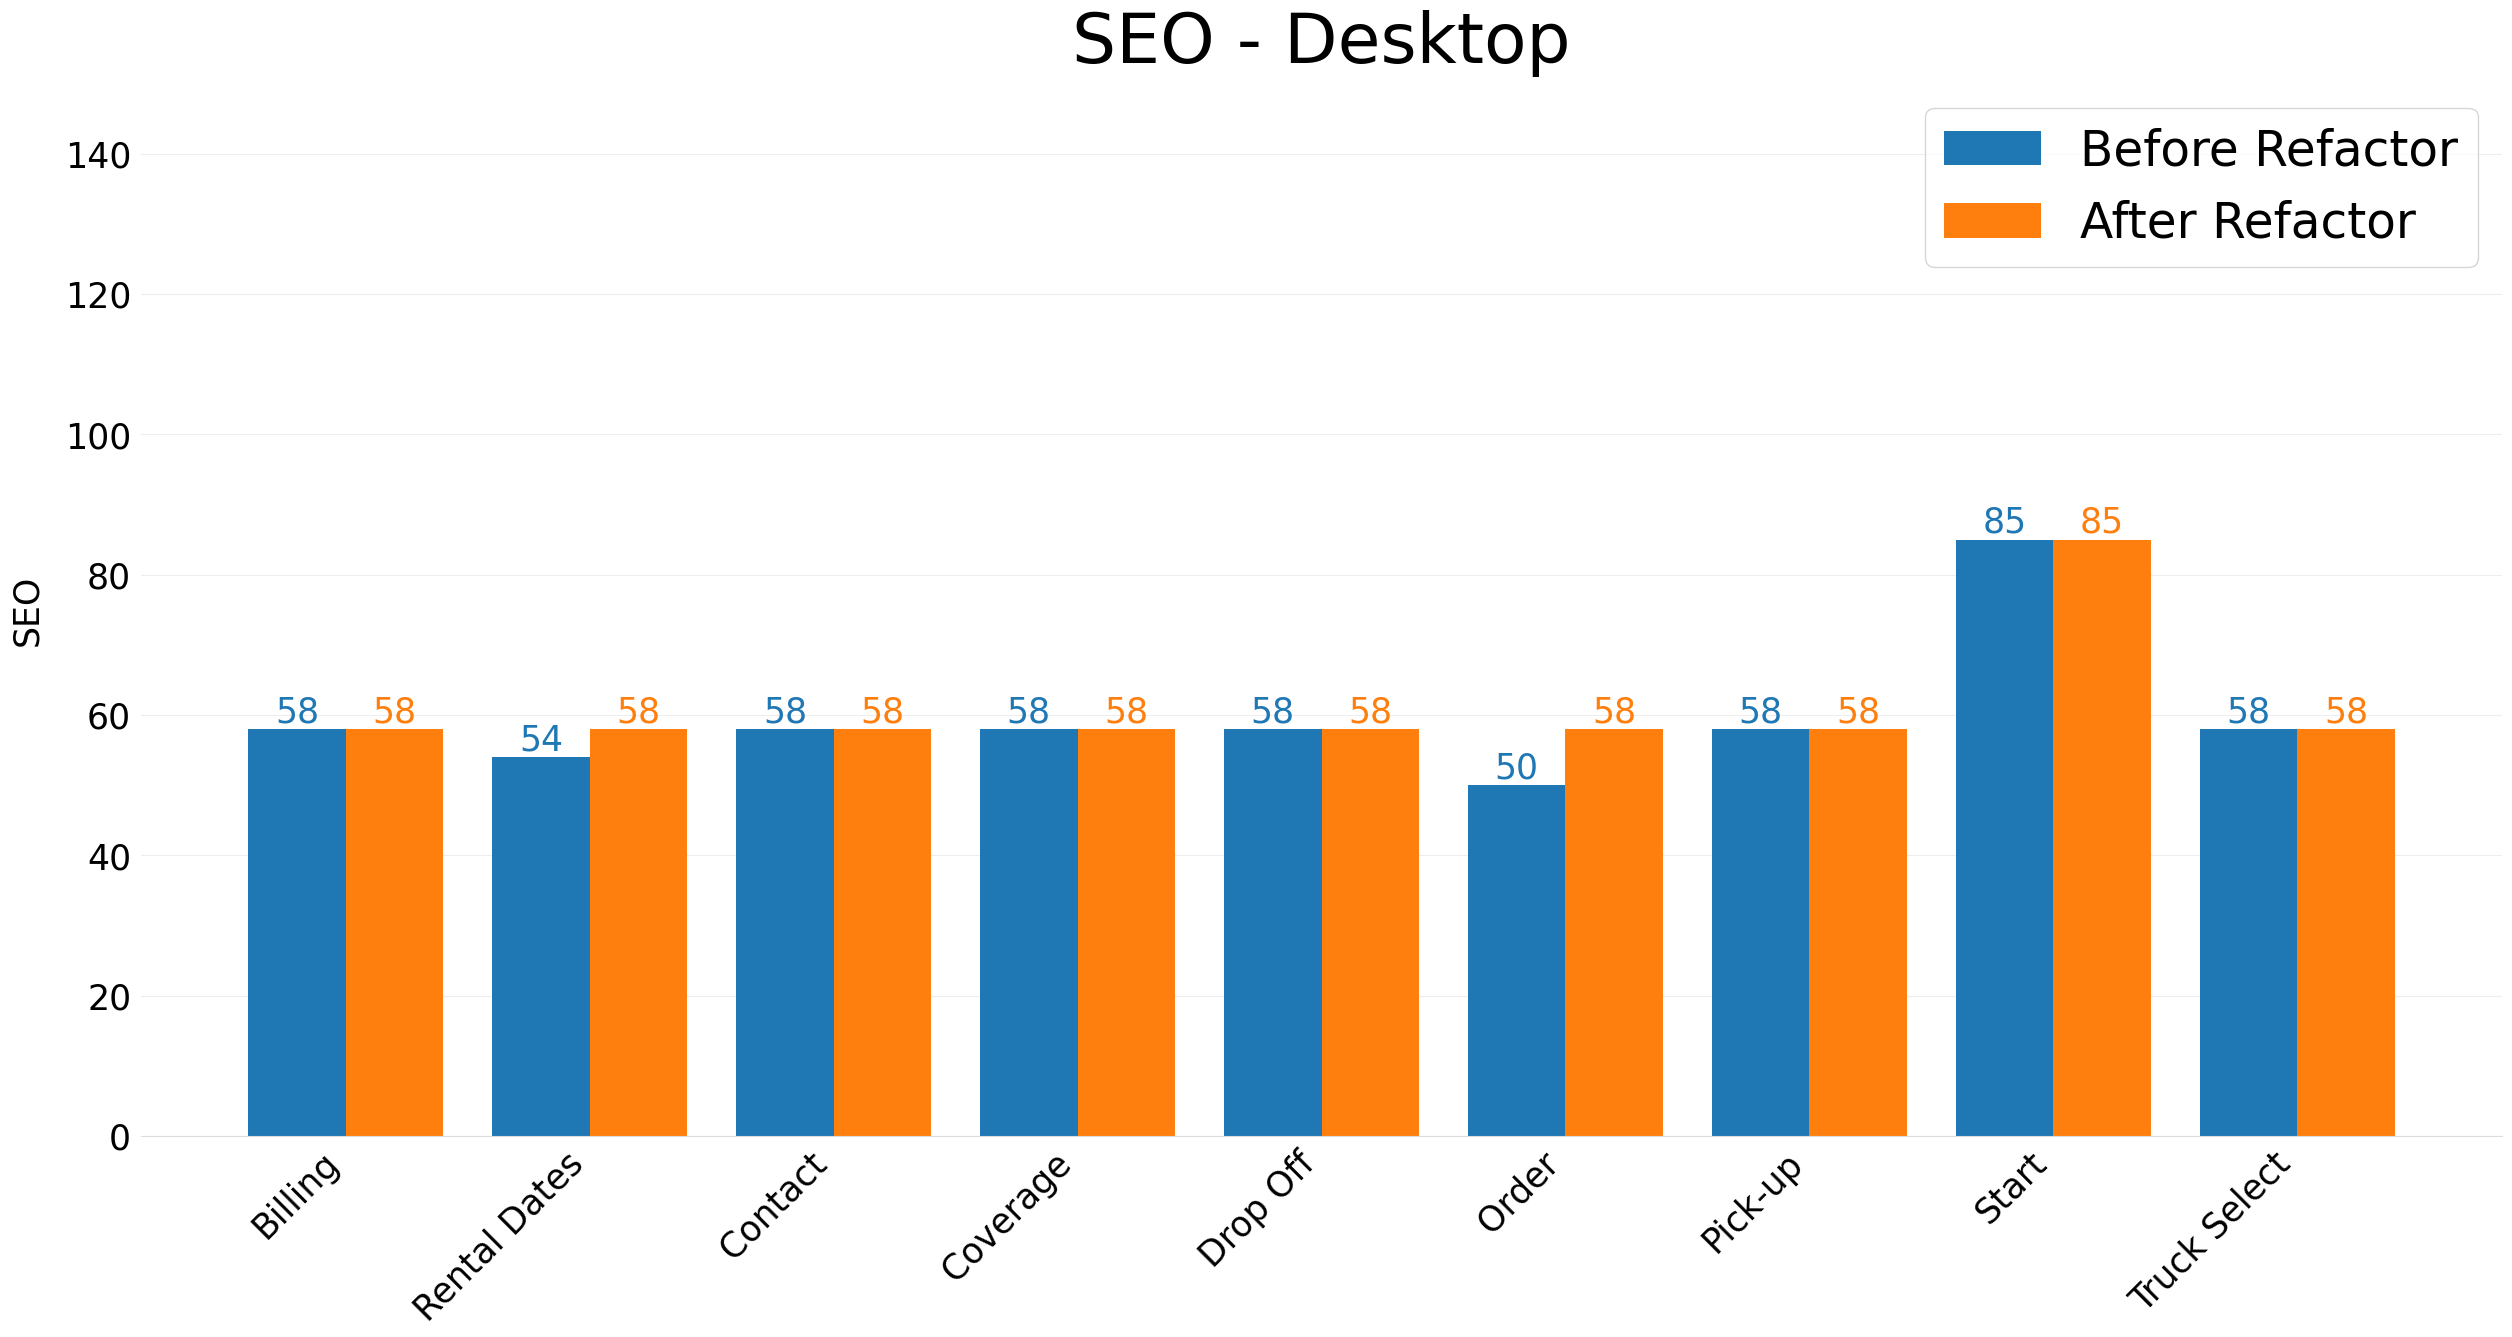

In [137]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results.loc[merged_results['Refactor Type'] == 'Before', 'SEO'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results.loc[merged_results['Refactor Type'] == 'After', 'SEO'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("SEO", labelpad=15, fontsize=25)
ax.set_title("SEO - Desktop", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 150) 
plt.savefig('SEO_desktop.png')
plt.show()

# **Speed Index (seconds)**
0-3.4 seconds (Fast).  3.4-5.8 seconds (Moderate). Over 5.8 seconds (Slow).

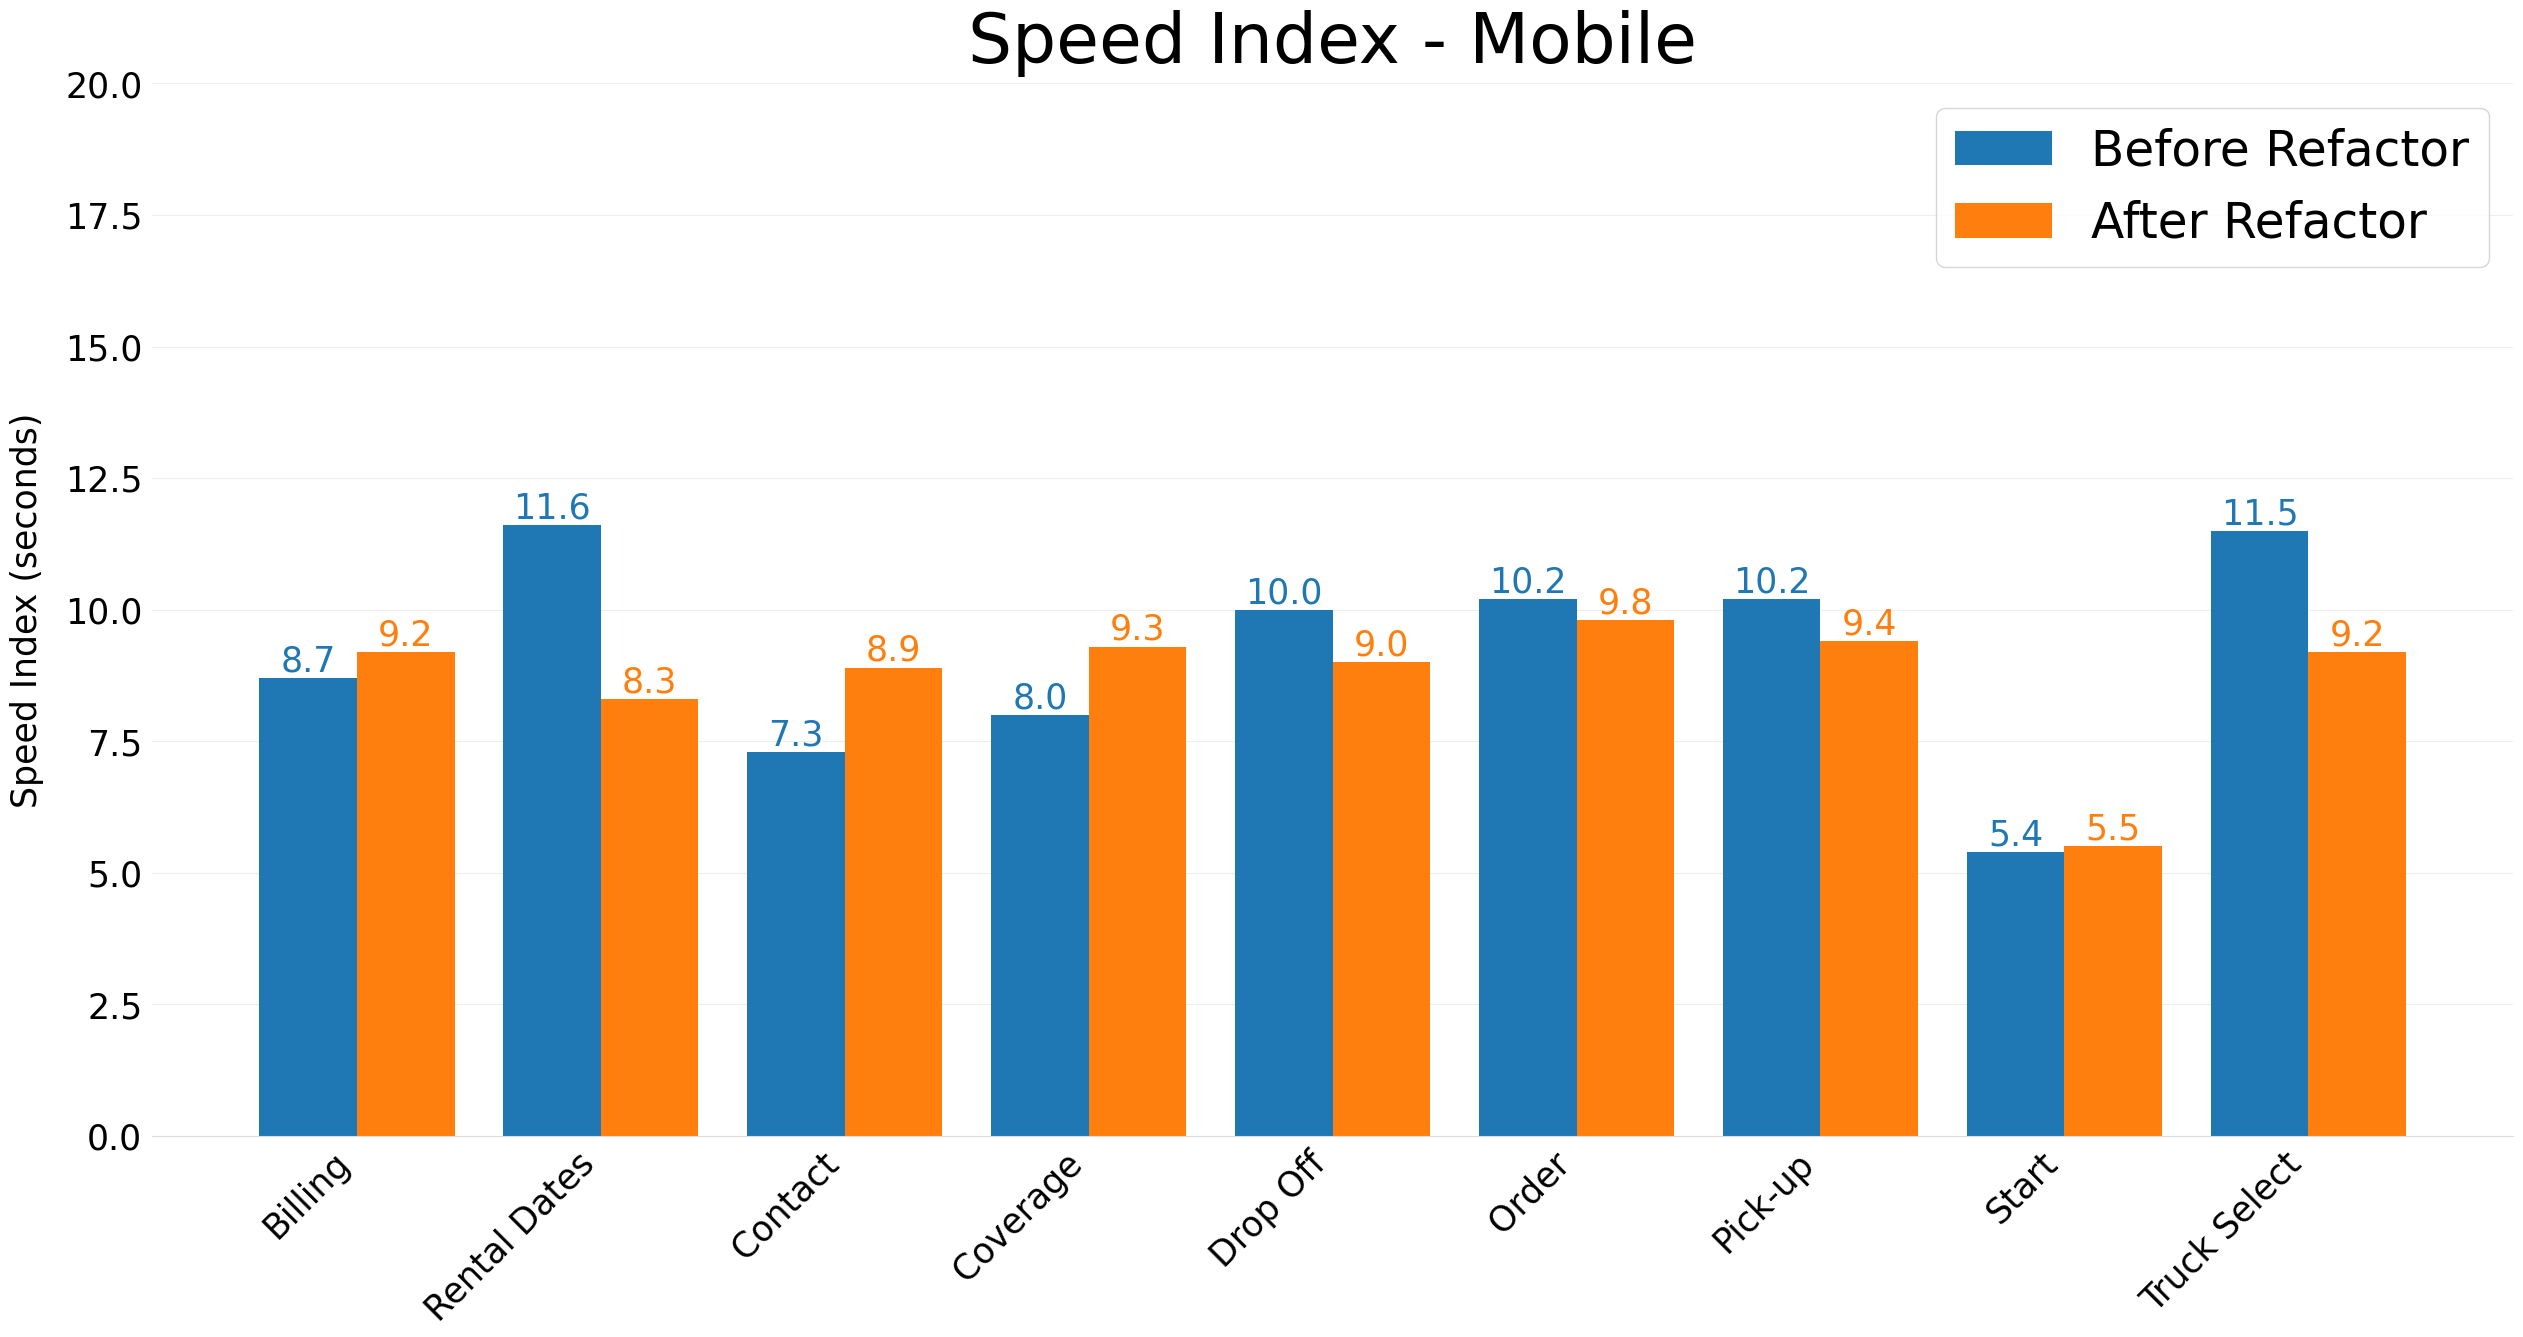

In [138]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results_mobile.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'Before', 'Speed Index'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'After', 'Speed Index'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results_mobile.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("Speed Index (seconds)", labelpad=15, fontsize=25)
ax.set_title("Speed Index - Mobile", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 20)
plt.savefig('speed_index_mobile.png')
plt.show()

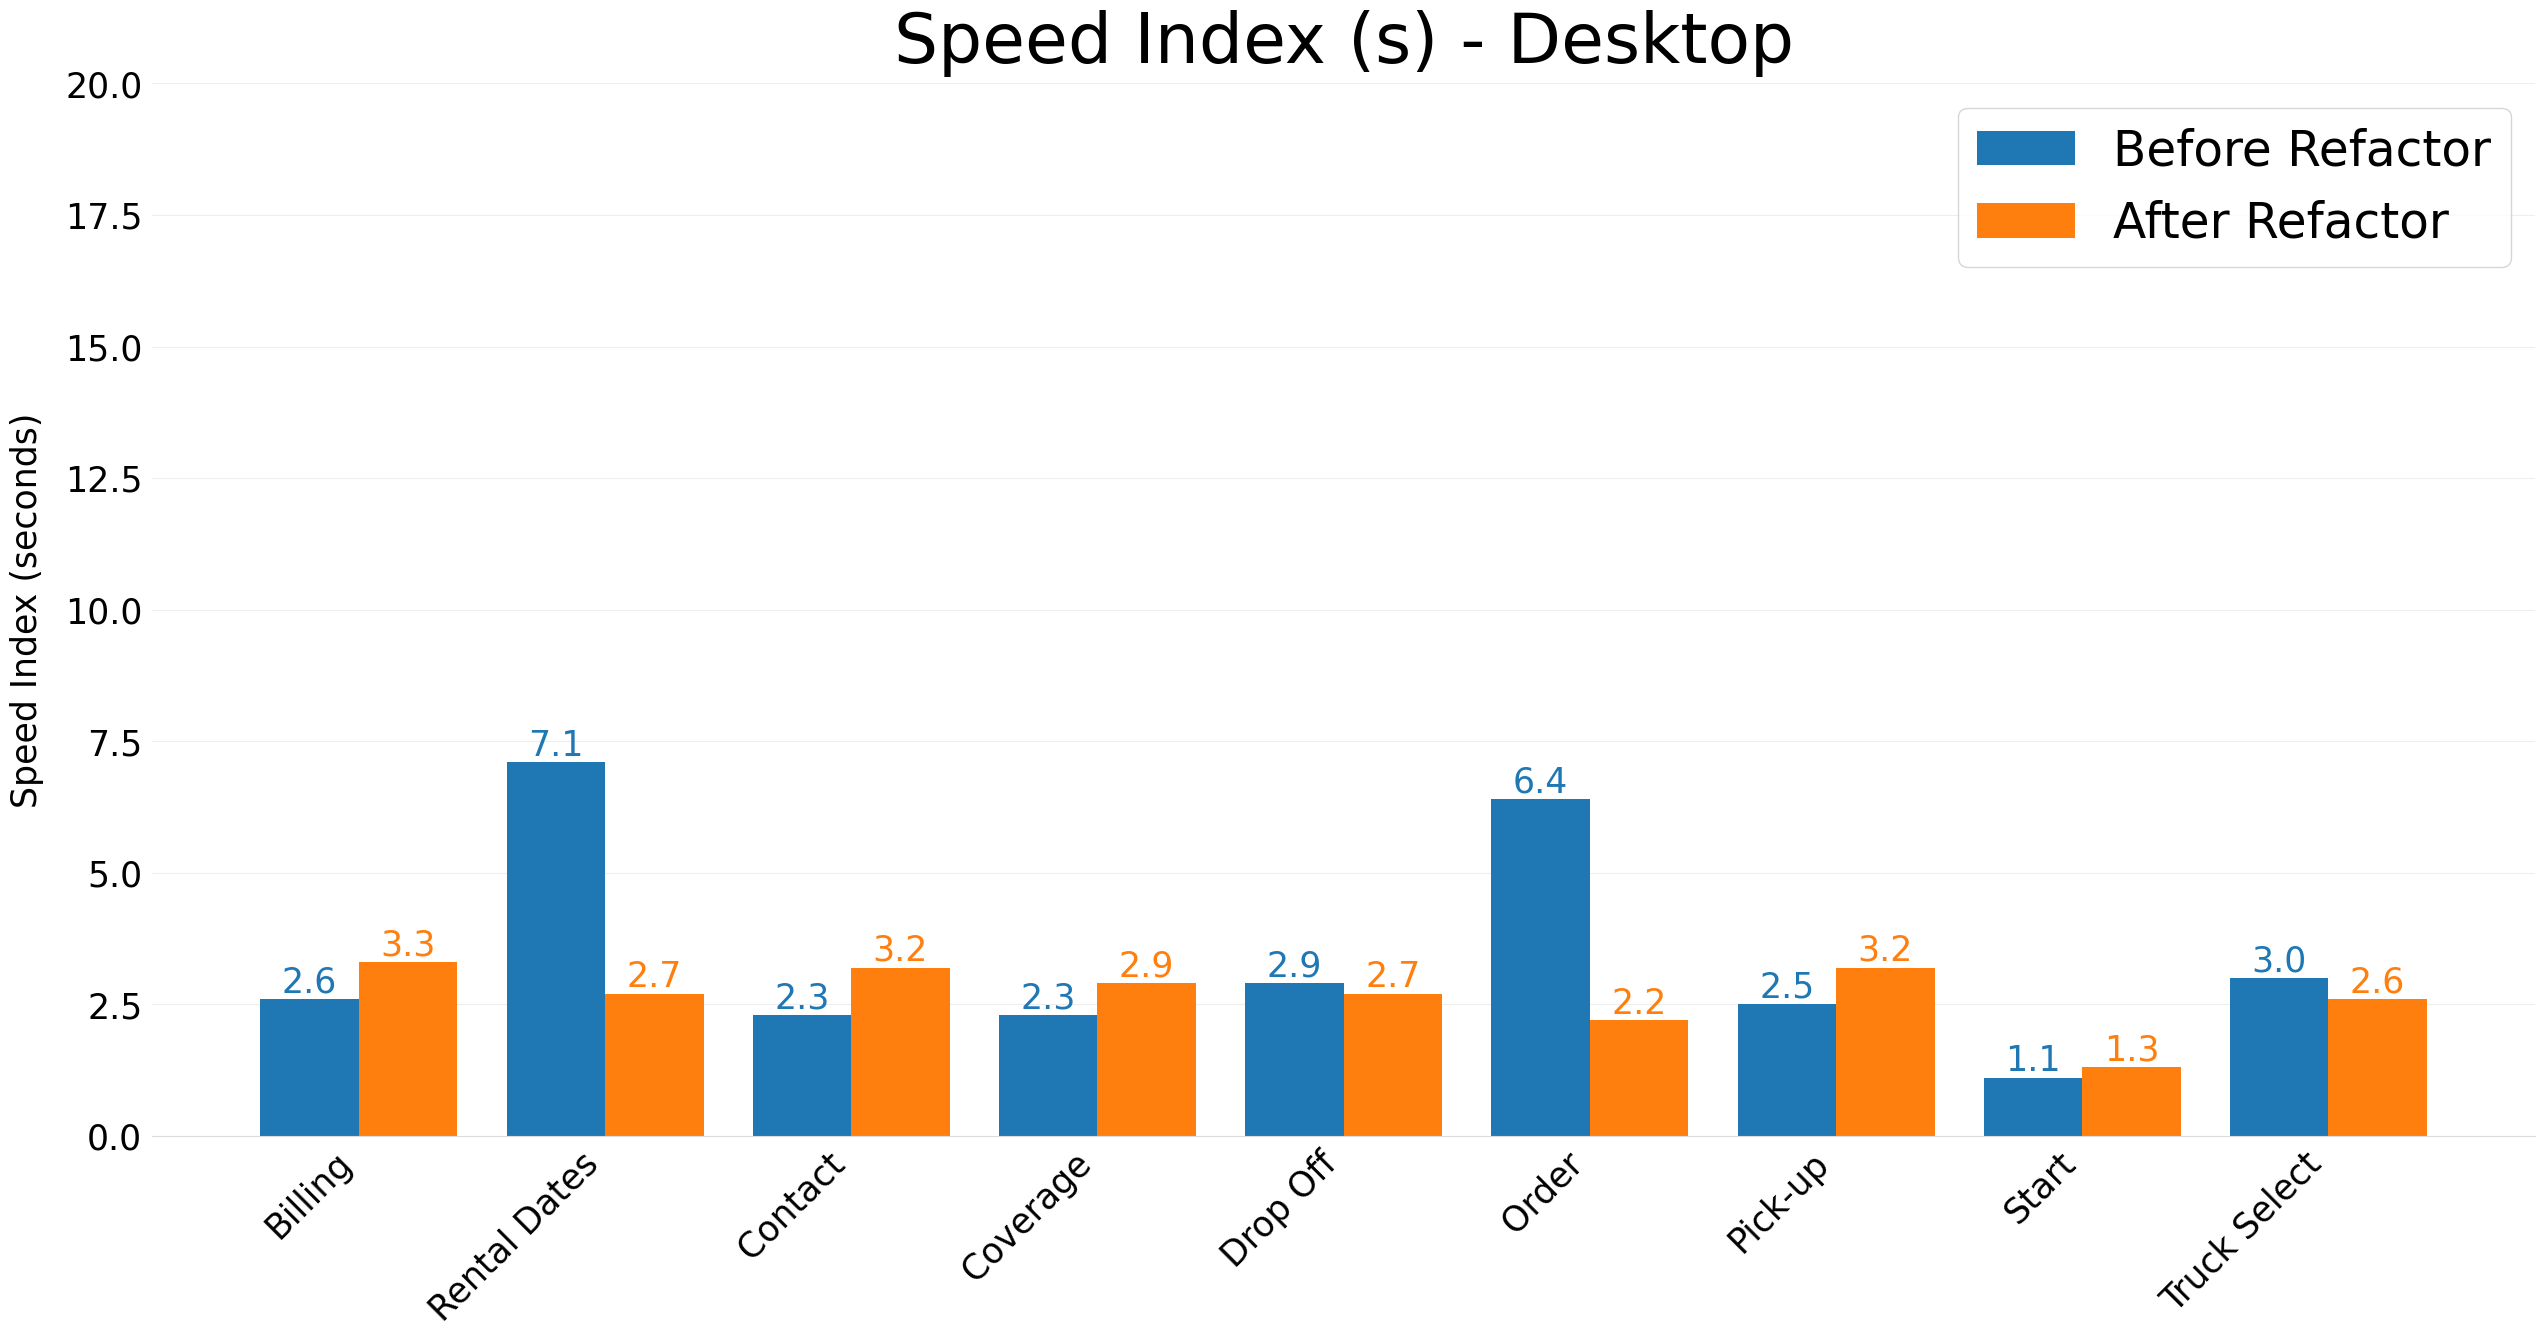

In [139]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results.loc[merged_results['Refactor Type'] == 'Before', 'Speed Index'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results.loc[merged_results['Refactor Type'] == 'After', 'Speed Index'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results.Webpage.unique(),fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("Speed Index (seconds)", labelpad=15, fontsize=25)
ax.set_title("Speed Index (s) - Desktop", pad=15, fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 20) 
plt.savefig('speed_index_desktop.png')
plt.show()

# **Total Blocking Time**
0–200 (Fast). 200-600 (Moderate). Over 600 (Slow).

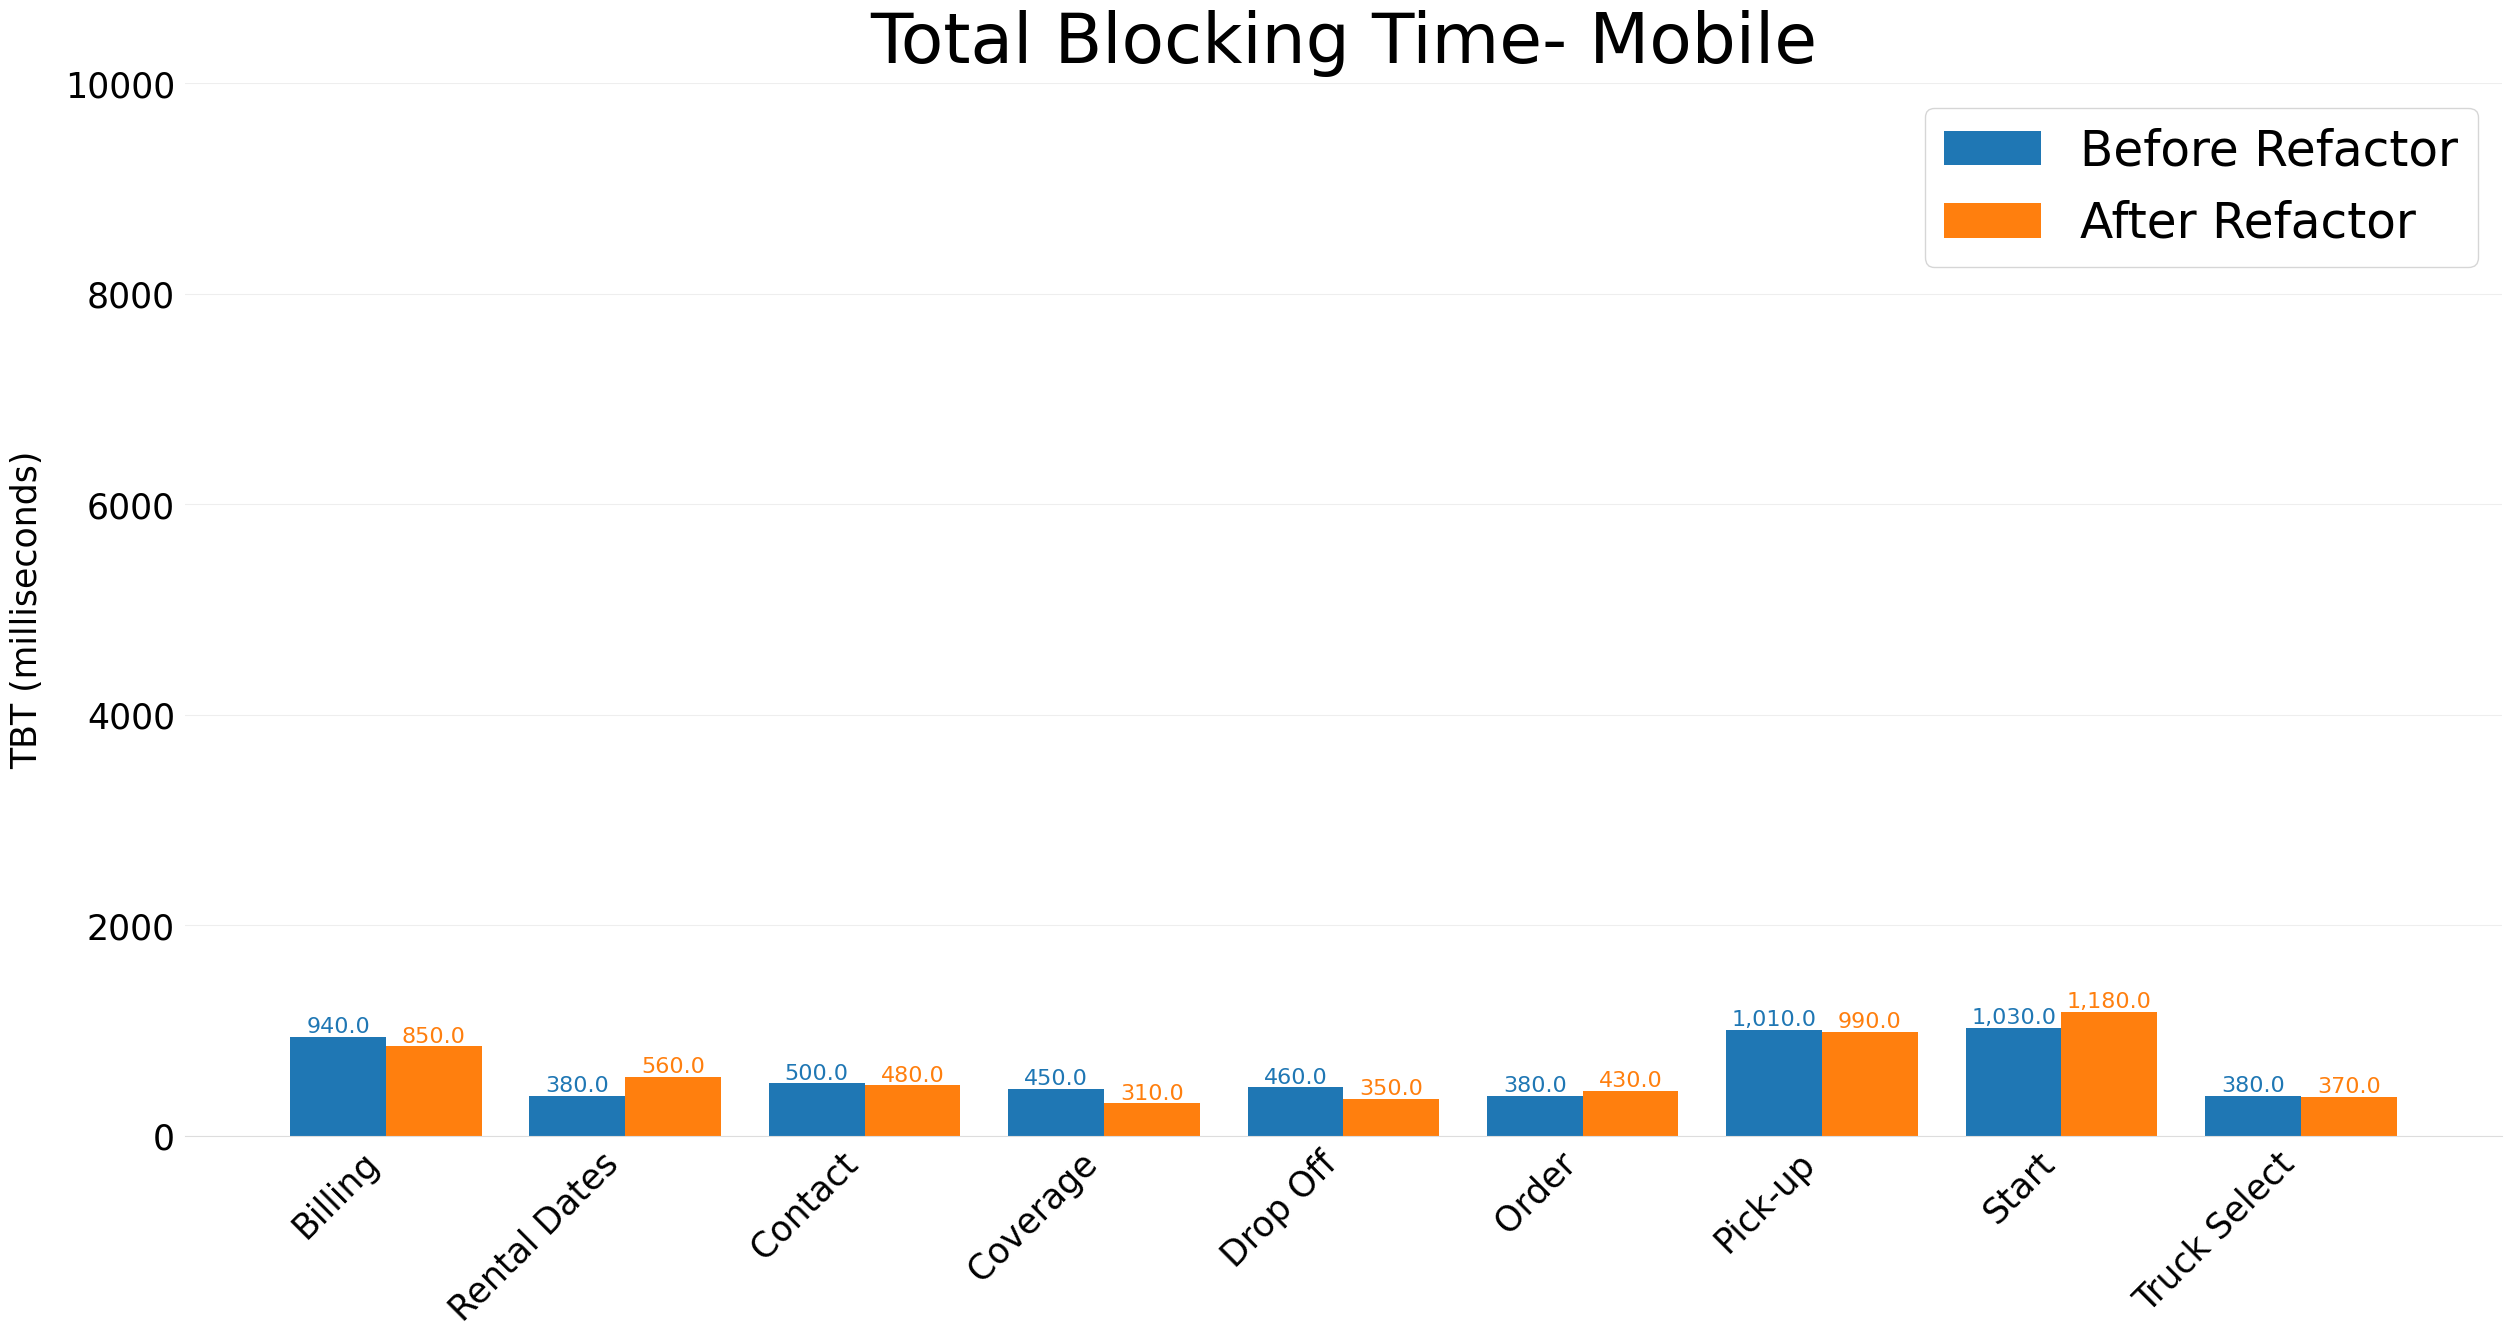

In [140]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results_mobile.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'Before', 'TBT'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'After', 'TBT'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results_mobile.Webpage.unique(),fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False,labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("TBT (milliseconds)", labelpad=15,fontsize=25)
ax.set_title("Total Blocking Time- Mobile", pad=15,fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=16)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10000) 
plt.savefig('tbt_mobile.png')
plt.show()

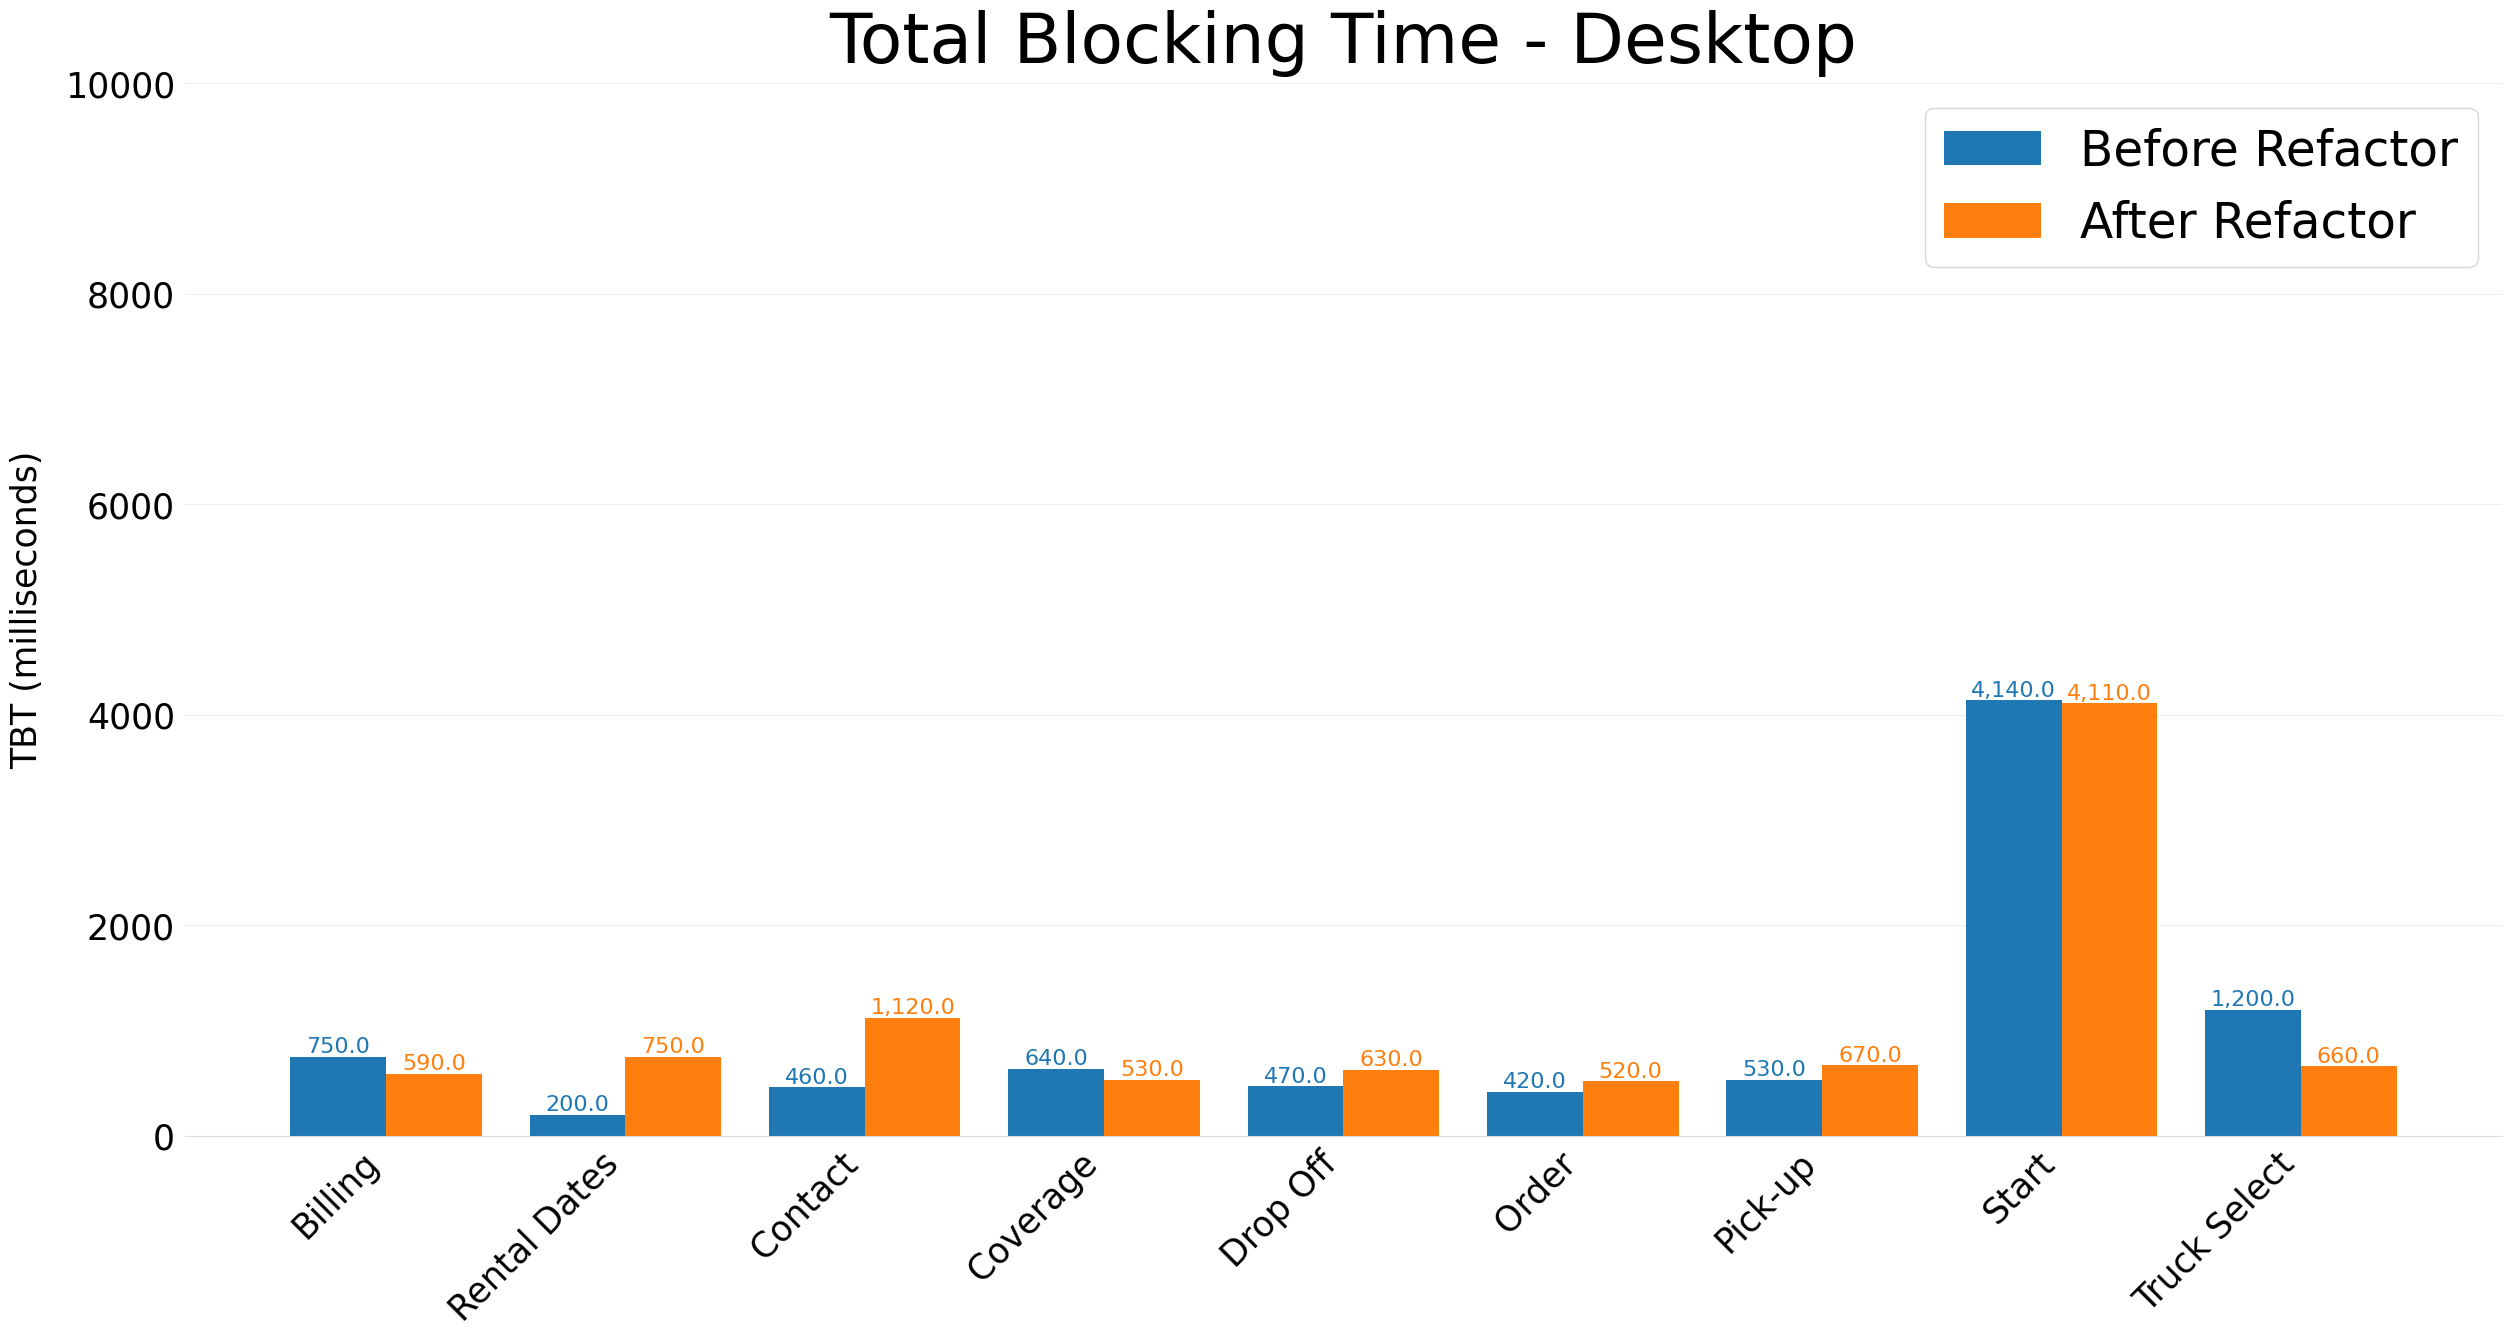

In [141]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results.loc[merged_results['Refactor Type'] == 'Before', 'TBT'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results.loc[merged_results['Refactor Type'] == 'After', 'TBT'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results.Webpage.unique(),fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False,labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("TBT (milliseconds)", labelpad=15,fontsize=25)
ax.set_title("Total Blocking Time - Desktop", pad=15,fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=16)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10000) 
plt.savefig('tbt_desktop.png')
plt.show()

# **Page Transfer Size (KB)**

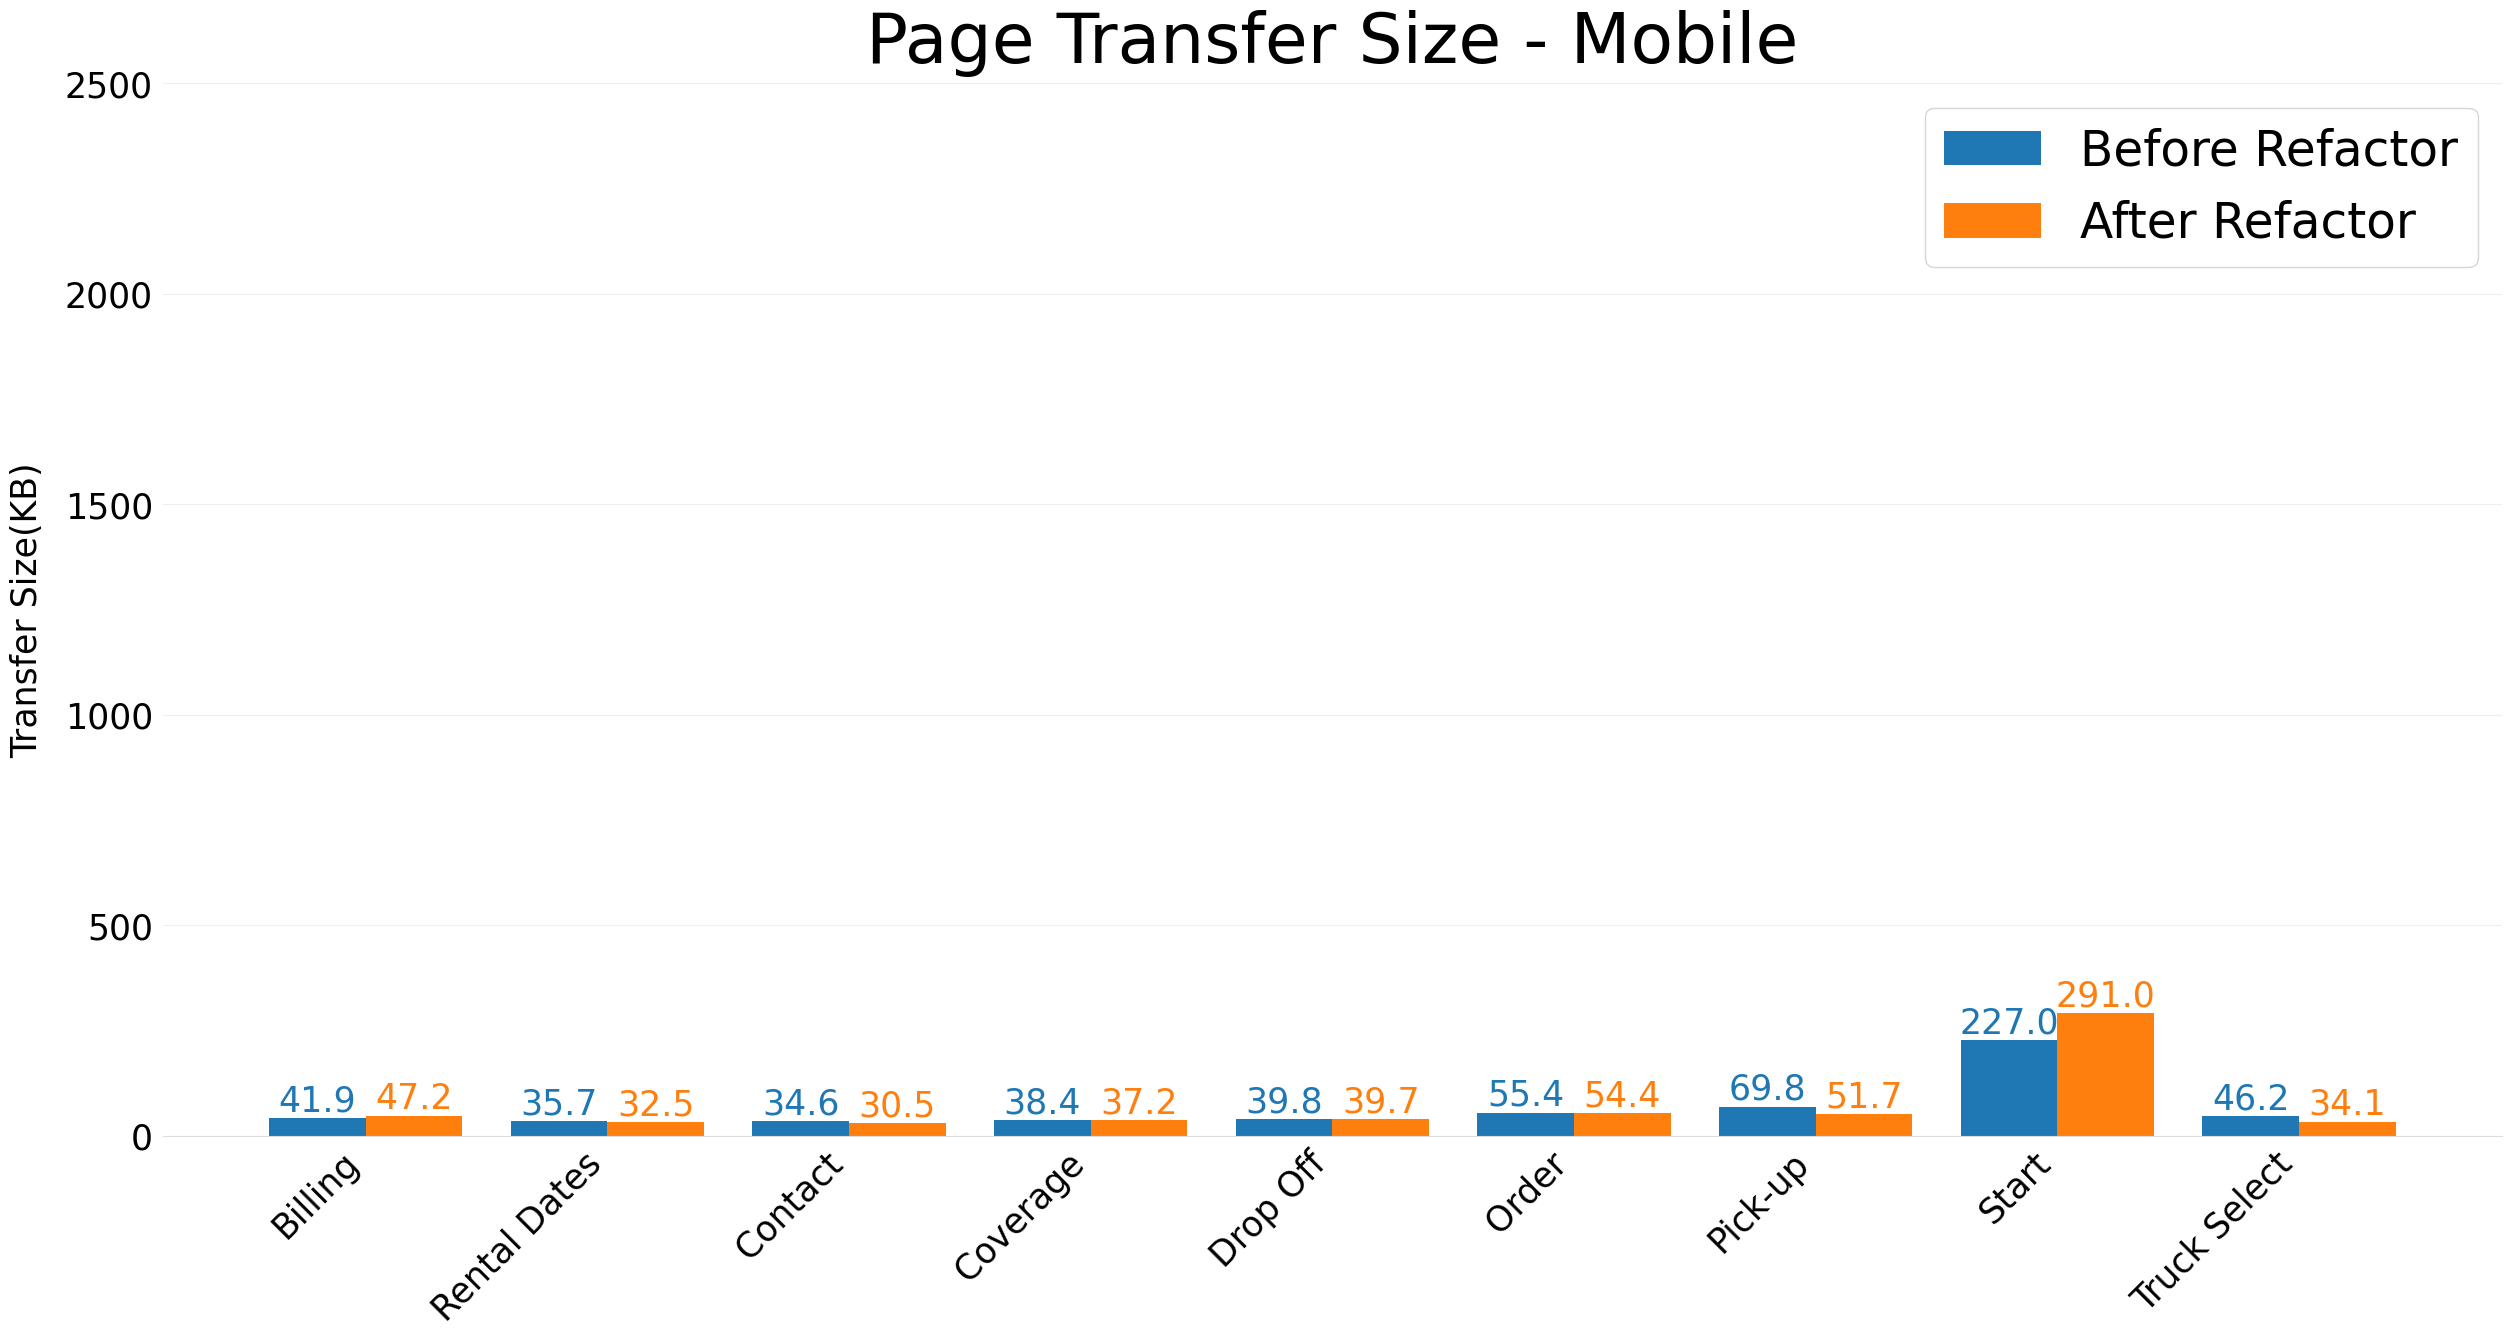

In [142]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results_mobile.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'Before', 'Transfer Size'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'After', 'Transfer Size'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results_mobile.Webpage.unique(), fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False,labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("Transfer Size(KB)", labelpad=15,fontsize=25)
ax.set_title("Page Transfer Size - Mobile", pad=15,fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 2500) 
plt.savefig('page_transfer_size_mobile.png')
plt.show()

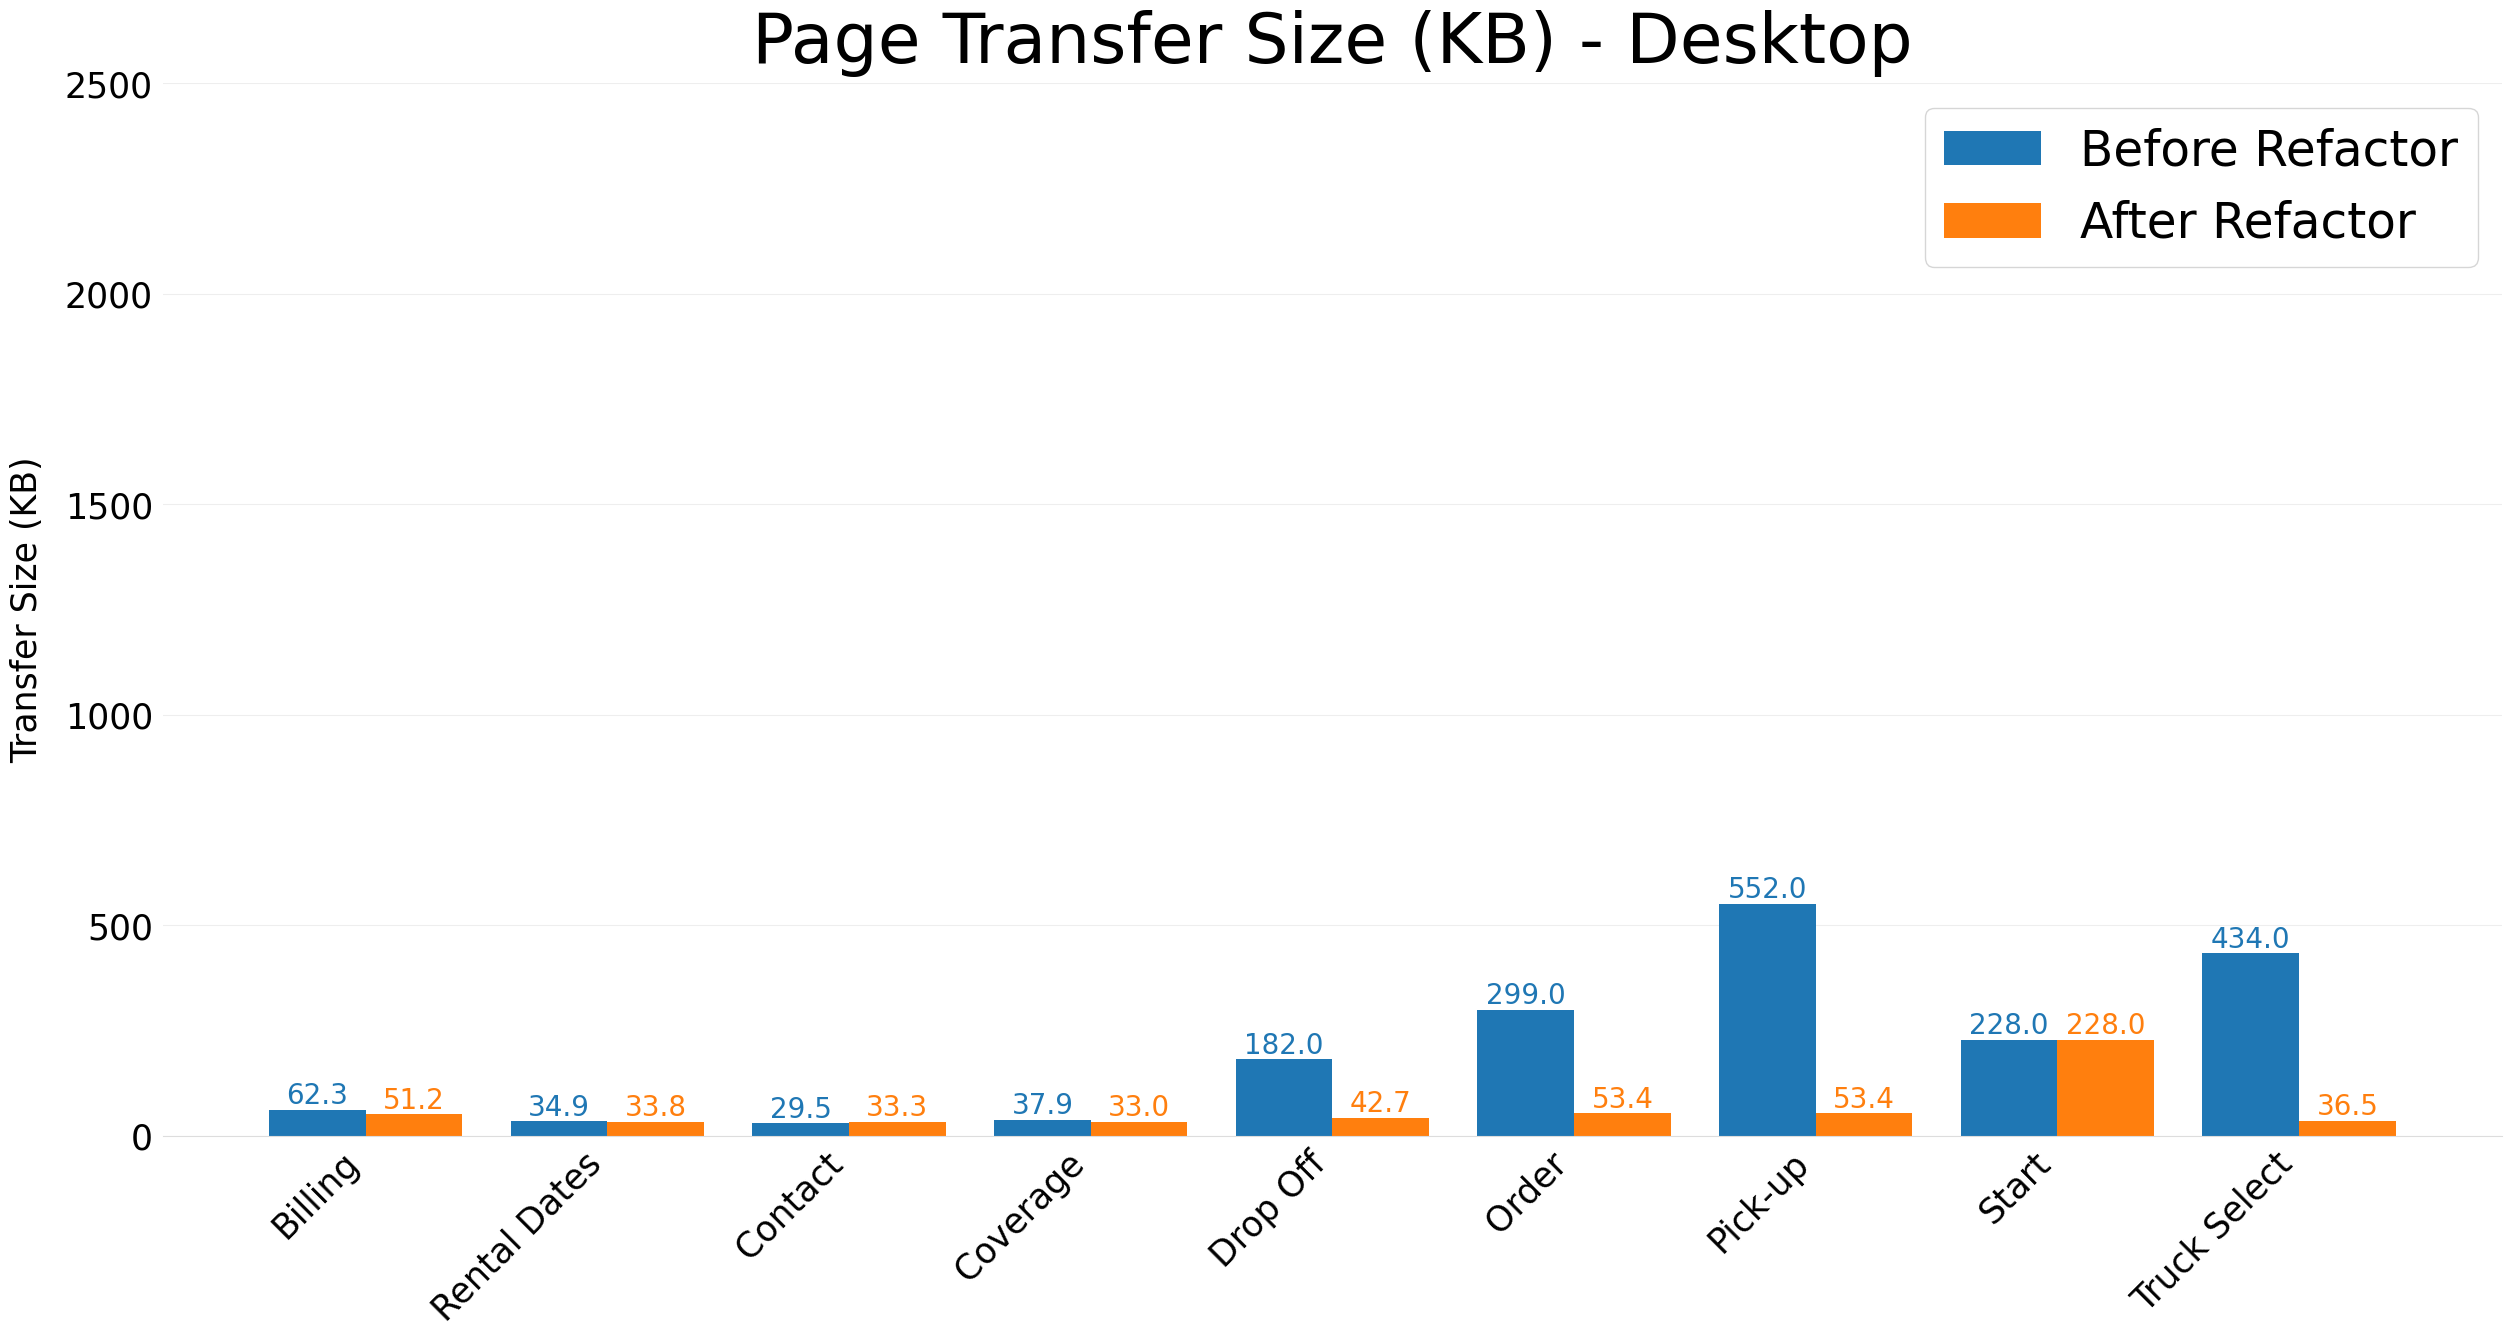

In [143]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results.loc[merged_results['Refactor Type'] == 'Before', 'Transfer Size'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results.loc[merged_results['Refactor Type'] == 'After', 'Transfer Size'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results.Webpage.unique(),fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False,labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("Transfer Size (KB)", labelpad=15,fontsize=25)
ax.set_title("Page Transfer Size (KB) - Desktop", pad=15,fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=20)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 2500) 
plt.savefig('page_transfer_size_desktop.png')
plt.show()

# **Number of Requests**

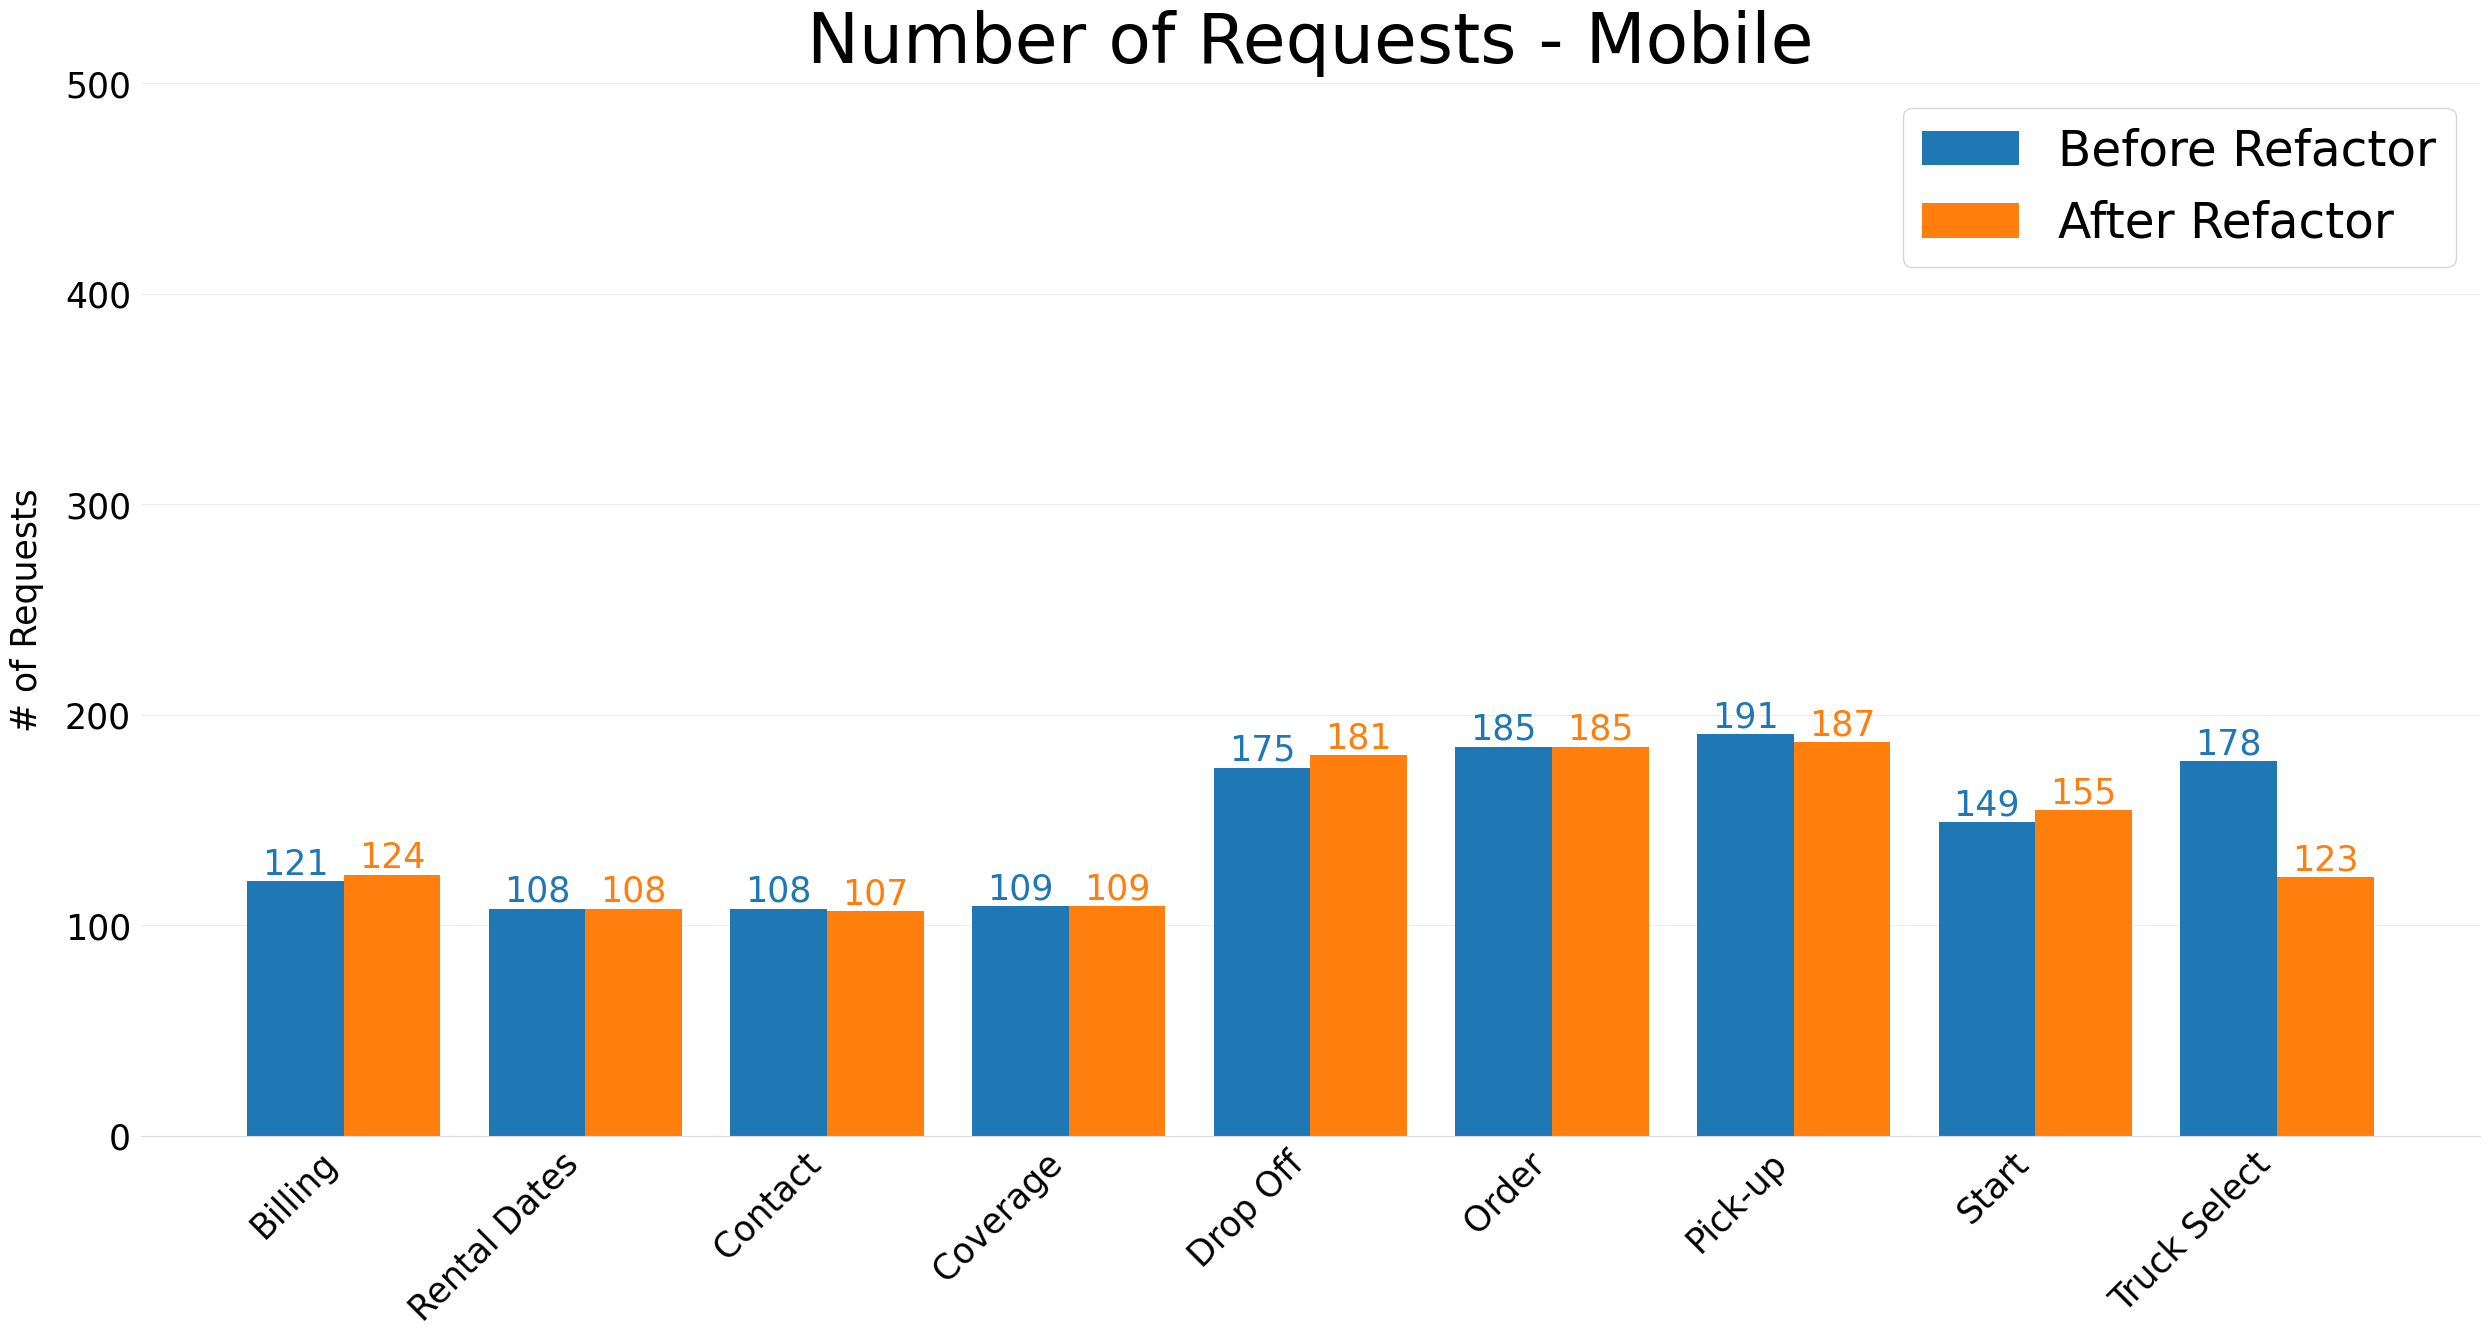

In [144]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results_mobile.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'Before', '# of Requests'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results_mobile.loc[merged_results_mobile['Refactor Type'] == 'After', '# of Requests'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results_mobile.Webpage.unique(),fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False,labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("# of Requests", labelpad=15,fontsize=25)
ax.set_title("Number of Requests - Mobile", pad=15,fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 500)
plt.savefig('num_requests_mobile.png')
plt.show()

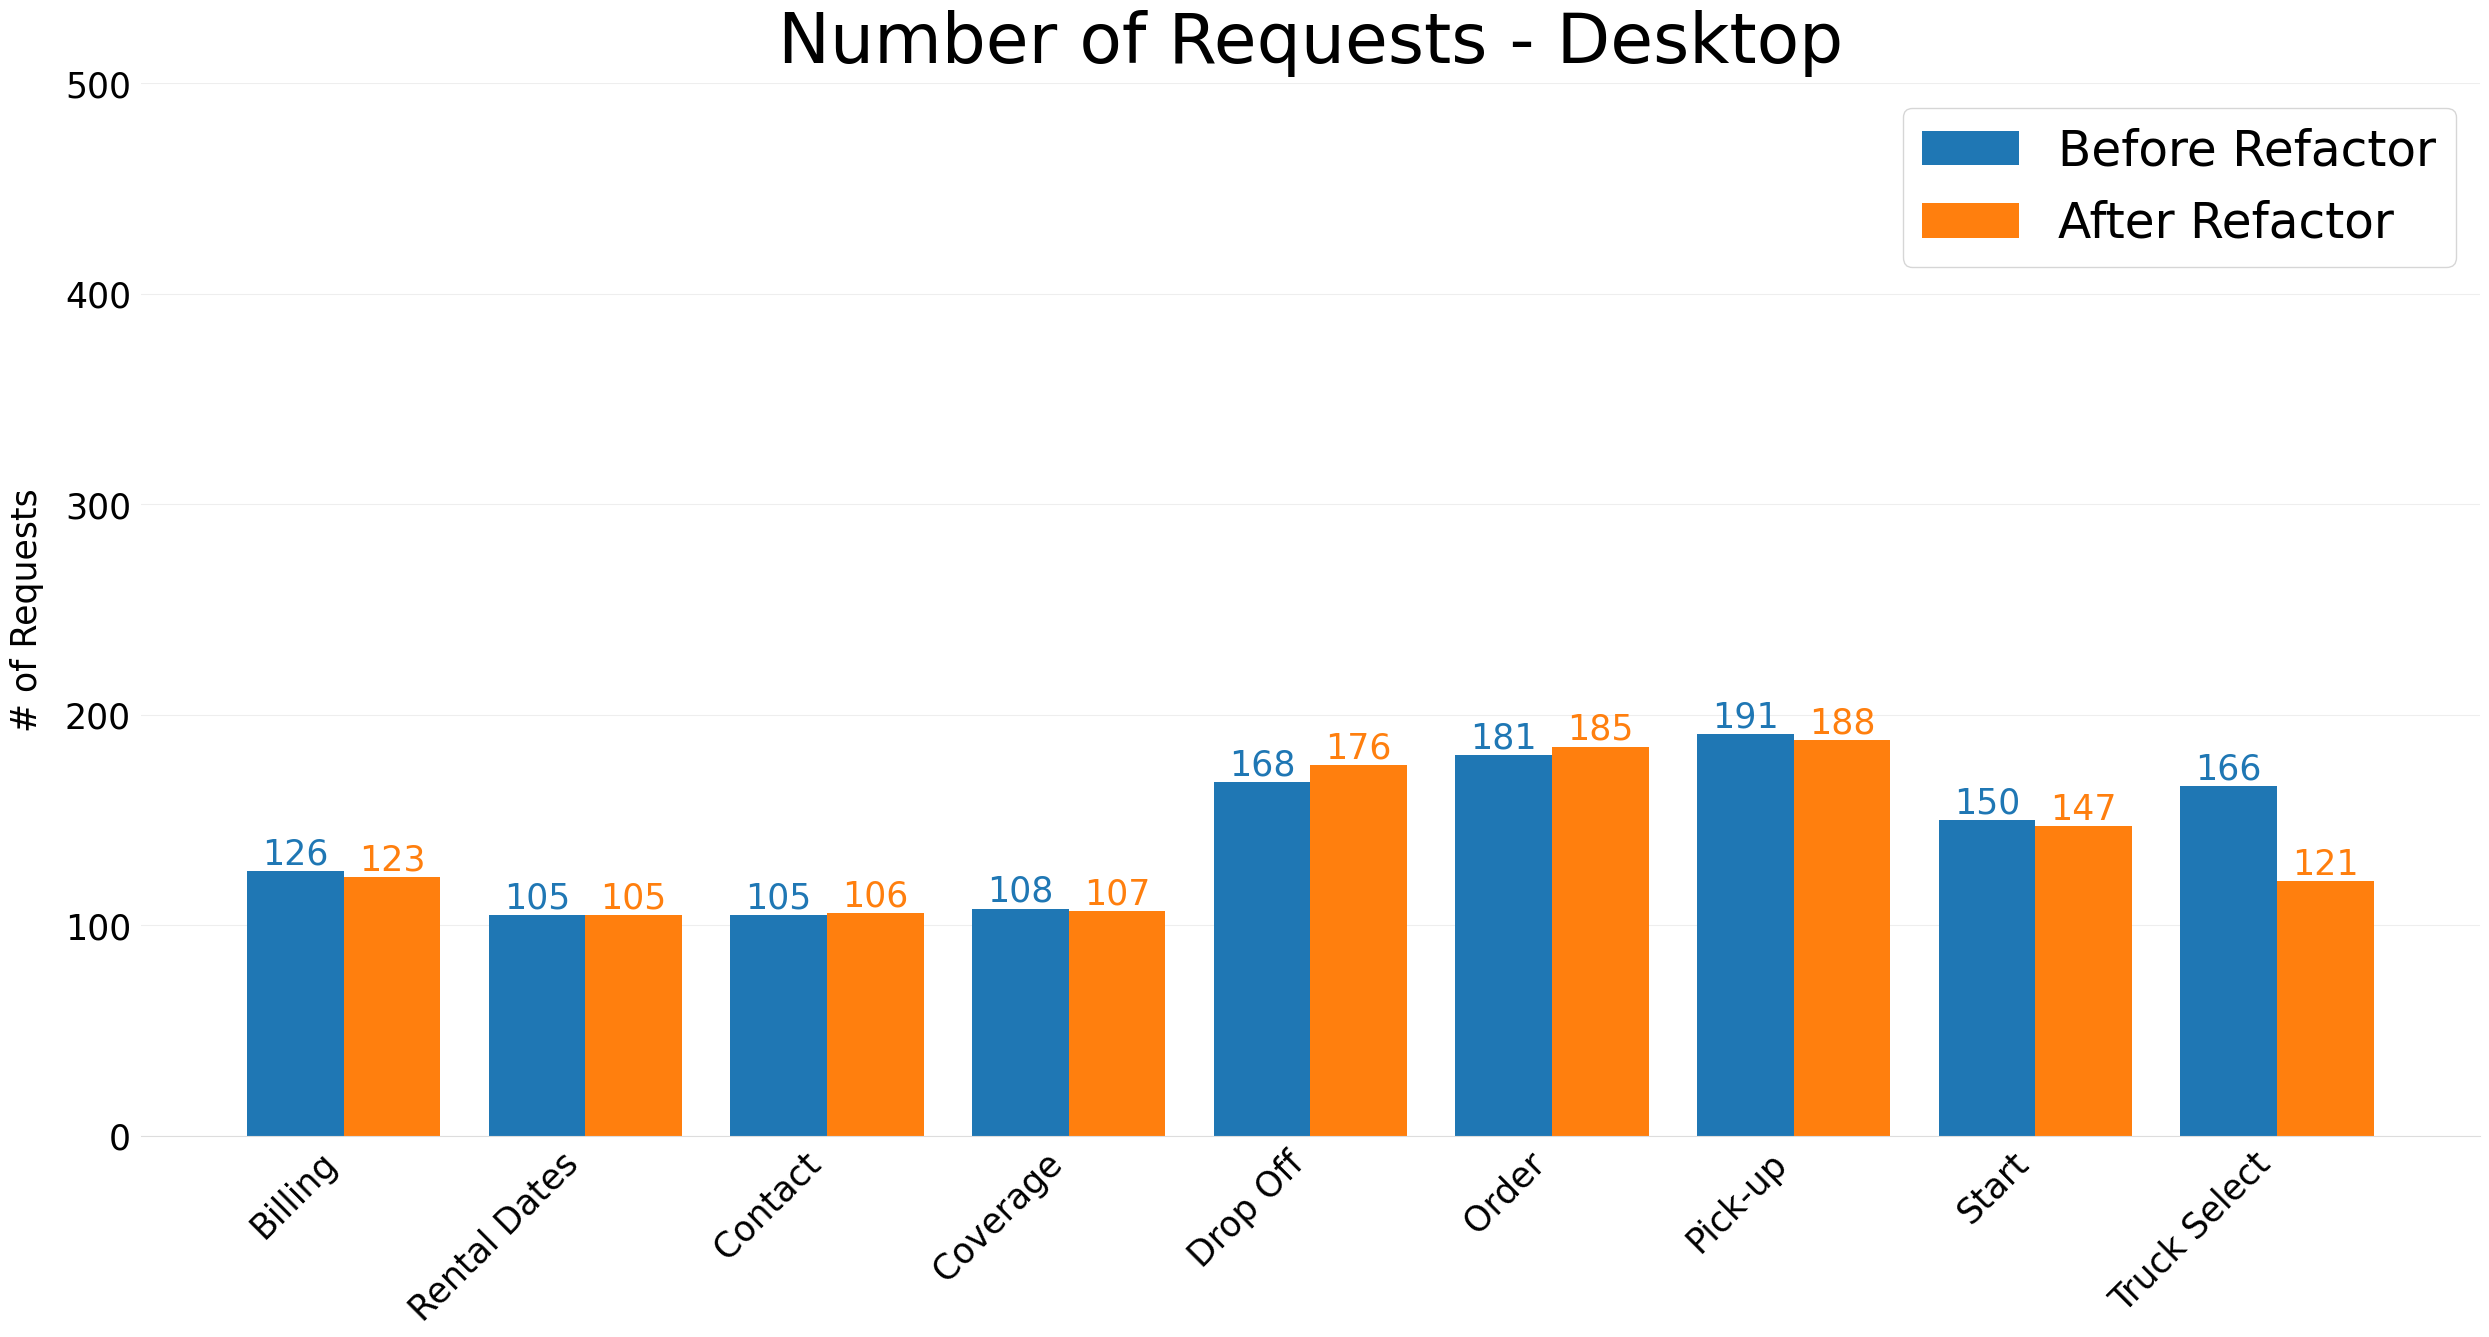

In [145]:
fig, ax = plt.subplots(figsize=(25, 12))
x = np.arange(len(merged_results.Webpage.unique()))
bar_width = 0.4

b1 = ax.bar(x, merged_results.loc[merged_results['Refactor Type'] == 'Before', '# of Requests'],
            width=bar_width, label='Before Refactor')


b2 = ax.bar(x + bar_width, merged_results.loc[merged_results['Refactor Type'] == 'After', '# of Requests'],
            width=bar_width, label='After Refactor')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(merged_results.Webpage.unique(),fontsize=25)
ax.legend(fontsize='35',loc="upper right")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False,labelsize=25)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("", labelpad=15)
ax.set_ylabel("# of Requests", labelpad=15,fontsize=25)
ax.set_title("Number of Requests - Desktop", pad=15,fontsize=50)

fig.tight_layout()

for bar in ax.patches:
      bar_value = bar.get_height()
      text = f'{bar_value:,}'
      text_x = bar.get_x() + bar.get_width() / 2
      text_y = bar.get_y() + bar_value
      bar_color = bar.get_facecolor()
      ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=25)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 500)
plt.savefig('num_requests_desktop.png')
plt.show()